## DOMAIN: Industrial safety. NLP based Chatbot.

**CONTEXT**: The database comes fromone of the biggest industry in Brazil and in the world. It is an urgent need for industries/companies around the globe to understand why employees still suffer some injuries/accidents in plants. Sometimes they also die in such environment.

**DATA DESCRIPTION**: This The database is basically records of accidents from12 different plants in 03 different countrieswhich every line in the data is an occurrence of an accident.

**Columns description:**

- Data: timestamp or time/date information

- Countries: which country the accident occurred (anonymised)

- Local: the city where the manufacturing plant is located (anonymised)

- Industry sector: which sector the plant belongs to

- Accident level: from I to VI, it registers how severe was the accident (I means not severe but VI means very severe)

- Potential Accident Level: Depending on the Accident Level, the database also registers how severe the accident could have been (due to other factors involved in the accident)

- Genre: if the person is male of female‣Employee or Third Party: if the injured person is an employee or a third party

- Critical Risk: some description of the risk involved in the accident

- Description: Detailed description of how the accident happened.


`PROJECT OBJECTIVE`: Design a ML/DL based chatbot utility which can help the professionals to highlight the safety risk as per the incident
description.



#### Step 1: Import the data

In [ ]:
import plotly
import warnings
print(plotly.__version__)
import numpy as np
import pandas as pd
from numpy import mean,std
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from matplotlib import pyplot
from sklearn.impute import SimpleImputer
# Basic packages
import random
import seaborn as sns
from scipy import stats; from scipy.stats import zscore, norm, randint

import holoviews as hv
from holoviews import opts

from sklearn.feature_extraction.text import TfidfVectorizer

import holoviews as hv
from holoviews import opts

import os;
from os import makedirs

# sampling methods
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

# import zscore for scaling the data
from scipy.stats import zscore

from scipy.stats import randint as sp_randint

#!pip install holidays
import holidays

# save models
import pickle

from statsmodels.stats.proportion import proportions_ztest

# pre-processing methods
from sklearn.model_selection import train_test_split

# the classification models 
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# ensemble models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# methods and classes for evaluation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, precision_score, roc_auc_score

# cross-validation methods
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# feature selection methods
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV

#hyperparameter tunings
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.preprocessing.text import Tokenizer

from tensorflow.keras.preprocessing.sequence import pad_sequences
import xgboost as xgb
from xgboost import XGBClassifier

# Text preprocessing and stopwords
#!pip install text-preprocessing
from text_preprocessing import preprocess_text
from text_preprocessing import to_lower, remove_email, remove_url, remove_punctuation, lemmatize_word
from text_preprocessing import *

warnings.filterwarnings('ignore')


5.9.0


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\veerendra\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


from google.colab import drive
drive.mount('/content/drive')

accident_df = pd.read_csv('/content/drive/MyDrive/IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv')

In [ ]:
accident_df = pd.read_csv('IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv')

In [ ]:
accident_df.head()

Unnamed: 0                 Data   Countries     Local Industry Sector  \
0           0  2016-01-01 00:00:00  Country_01  Local_01          Mining   
1           1  2016-01-02 00:00:00  Country_02  Local_02          Mining   
2           2  2016-01-06 00:00:00  Country_01  Local_03          Mining   
3           3  2016-01-08 00:00:00  Country_01  Local_04          Mining   
4           4  2016-01-10 00:00:00  Country_01  Local_04          Mining   

  Accident Level Potential Accident Level Genre Employee or Third Party  \
0              I                       IV  Male             Third Party   
1              I                       IV  Male                Employee   
2              I                      III  Male    Third Party (Remote)   
3              I                        I  Male             Third Party   
4             IV                       IV  Male             Third Party   

         Critical Risk                                        Description  
0              Pressed  While removing the drill rod of the Jumbo 08 f...  
1  Pressurized Systems  During the activation of a sodium sulphide pum...  
2         Manual Tools  In the sub-station MILPO located at level +170...  
3               Others  Being 9:45 am. approximately in the Nv. 1880 C...  
4               Others  Approximately at 11:45 a.m. in circumstances t...

In [ ]:
print("Shape of the dataframe :\n\nNumber of rows are {0} \nNumber of Columns are {1}".format(accident_df.shape[0], accident_df.shape[1]))

Shape of the dataframe :

Number of rows are 425 
Number of Columns are 11


### Data Cleansing

In [ ]:
# Remove 'Unnamed: 0' column from Data frame
accident_df.drop("Unnamed: 0", axis=1, inplace=True)

# Rename 'Data', 'Countries', 'Genre', 'Employee or Third Party' columns in Data frame
accident_df.rename(columns={'Data':'Date', 'Countries':'Country', 'Genre':'Gender', 'Employee or Third Party':'Employee type'}, inplace=True)

# Get the top 5 rows
accident_df.head(5)

Date     Country     Local Industry Sector Accident Level  \
0  2016-01-01 00:00:00  Country_01  Local_01          Mining              I   
1  2016-01-02 00:00:00  Country_02  Local_02          Mining              I   
2  2016-01-06 00:00:00  Country_01  Local_03          Mining              I   
3  2016-01-08 00:00:00  Country_01  Local_04          Mining              I   
4  2016-01-10 00:00:00  Country_01  Local_04          Mining             IV   

  Potential Accident Level Gender         Employee type        Critical Risk  \
0                       IV   Male           Third Party              Pressed   
1                       IV   Male              Employee  Pressurized Systems   
2                      III   Male  Third Party (Remote)         Manual Tools   
3                        I   Male           Third Party               Others   
4                       IV   Male           Third Party               Others   

                                         Description  
0  While removing the drill rod of the Jumbo 08 f...  
1  During the activation of a sodium sulphide pum...  
2  In the sub-station MILPO located at level +170...  
3  Being 9:45 am. approximately in the Nv. 1880 C...  
4  Approximately at 11:45 a.m. in circumstances t...

##### Checking for null values, duplicate records

In [ ]:
#function to generate an overview of data_type,Null count,Duplicate values in each column
def DataFrameSummary(x): 
  df  = pd.DataFrame(index=x.columns) #initializing the dataframe
  listt = []
  null_list = []
  for i in range(0,x.shape[1]):
    listt.append([x[i].dtype for i in x.columns][i]) #taking the datatype of column 
    null_list.append(x.isnull().sum()[i]) #taking the null count of each column
  df['Data_Type'] = listt  
  df['Null_Count'] = null_list
  df['Duplicates'] = x.duplicated().sum()
  return df  

In [ ]:
DataFrameSummary(accident_df)

Data_Type  Null_Count  Duplicates
Date                        object           0           7
Country                     object           0           7
Local                       object           0           7
Industry Sector             object           0           7
Accident Level              object           0           7
Potential Accident Level    object           0           7
Gender                      object           0           7
Employee type               object           0           7
Critical Risk               object           0           7
Description                 object           0           7

- No null values present in Dataset.
- Duplicates records presentin Dataset.

##### Let's check more on duplicates 

In [ ]:
#There are 7 duplicate items and observe the duplicate items below
duplicates = accident_df.duplicated()

accident_df[duplicates]

Date     Country     Local Industry Sector Accident Level  \
77   2016-04-01 00:00:00  Country_01  Local_01          Mining              I   
262  2016-12-01 00:00:00  Country_01  Local_03          Mining              I   
303  2017-01-21 00:00:00  Country_02  Local_02          Mining              I   
345  2017-03-02 00:00:00  Country_03  Local_10          Others              I   
346  2017-03-02 00:00:00  Country_03  Local_10          Others              I   
355  2017-03-15 00:00:00  Country_03  Local_10          Others              I   
397  2017-05-23 00:00:00  Country_01  Local_04          Mining              I   

    Potential Accident Level Gender         Employee type  \
77                         V   Male  Third Party (Remote)   
262                       IV   Male              Employee   
303                        I   Male  Third Party (Remote)   
345                        I   Male           Third Party   
346                        I   Male           Third Party   
355                        I   Male           Third Party   
397                       IV   Male           Third Party   

               Critical Risk  \
77                    Others   
262                   Others   
303                   Others   
345         Venomous Animals   
346         Venomous Animals   
355         Venomous Animals   
397  Projection of fragments   

                                           Description  
77   In circumstances that two workers of the Abrat...  
262  During the activity of chuteo of ore in hopper...  
303  Employees engaged in the removal of material f...  
345  On 02/03/17 during the soil sampling in the re...  
346  On 02/03/17 during the soil sampling in the re...  
355  Team of the VMS Project performed soil collect...  
397  In moments when the 02 collaborators carried o...

##### Removing duplicates

In [ ]:
accident_df.drop_duplicates(inplace=True)
DataFrameSummary(accident_df)

Data_Type  Null_Count  Duplicates
Date                        object           0           0
Country                     object           0           0
Local                       object           0           0
Industry Sector             object           0           0
Accident Level              object           0           0
Potential Accident Level    object           0           0
Gender                      object           0           0
Employee type               object           0           0
Critical Risk               object           0           0
Description                 object           0           0

In [ ]:
print("Shape of the dataframe after removing duplicates :\n\nNumber of rows are {0} \nNumber of Columns are {1}".format(accident_df.shape[0], accident_df.shape[1]))

Shape of the dataframe after removing duplicates :

Number of rows are 418 
Number of Columns are 10


##### Check Uniqueness and frequency of variables as outliers cannot be detected in categorical variables

In [ ]:
# Check unique values of all columns except 'Description' column
for x in accident_df.columns:
    if x != 'Description':
      print('--'*30); print(f'Unique values of "{x}" column'); print('--'*30)
      print(accident_df[x].unique())
      print('\n')

------------------------------------------------------------
Unique values of "Date" column
------------------------------------------------------------
['2016-01-01 00:00:00' '2016-01-02 00:00:00' '2016-01-06 00:00:00'
 '2016-01-08 00:00:00' '2016-01-10 00:00:00' '2016-01-12 00:00:00'
 '2016-01-16 00:00:00' '2016-01-17 00:00:00' '2016-01-19 00:00:00'
 '2016-01-26 00:00:00' '2016-01-28 00:00:00' '2016-01-30 00:00:00'
 '2016-02-01 00:00:00' '2016-02-02 00:00:00' '2016-02-04 00:00:00'
 '2016-02-06 00:00:00' '2016-02-07 00:00:00' '2016-02-08 00:00:00'
 '2016-02-21 00:00:00' '2016-02-25 00:00:00' '2016-02-09 00:00:00'
 '2016-02-10 00:00:00' '2016-02-15 00:00:00' '2016-02-14 00:00:00'
 '2016-02-13 00:00:00' '2016-02-16 00:00:00' '2016-02-17 00:00:00'
 '2016-02-19 00:00:00' '2016-02-20 00:00:00' '2016-02-18 00:00:00'
 '2016-02-22 00:00:00' '2016-02-24 00:00:00' '2016-02-29 00:00:00'
 '2016-02-26 00:00:00' '2016-02-27 00:00:00' '2016-03-02 00:00:00'
 '2016-03-03 00:00:00' '2016-03-04 00:00:00

#### Data Cleansing Summary:

- Dropped 'Unnamed: 0' column and renamed columns for better understanding.
- There were 7 duplicates and these duplicates are removed.
- There are no outliers in the accident_data.
- There are no null values in accident_data.
- We are left with 418 rows and 10 columns after data cleansing.`

### Data Pre-processing

- Creating new features like weekday and week of year. This will help us understand the data better and for this we will extract data from the day, month and year from Date column

In [ ]:
accident_df['Date'] = pd.to_datetime(accident_df['Date'])
accident_df['Year'] = accident_df.Date.apply(lambda x : x.year)
accident_df['Month'] = accident_df.Date.apply(lambda x : x.month)
accident_df['Day'] = accident_df.Date.apply(lambda x : x.day)
accident_df['Weekday'] = accident_df.Date.apply(lambda x : x.day_name())
accident_df['WeekofYear'] = accident_df.Date.apply(lambda x : x.weekofyear)

accident_df.head()

Date     Country     Local Industry Sector Accident Level  \
0 2016-01-01  Country_01  Local_01          Mining              I   
1 2016-01-02  Country_02  Local_02          Mining              I   
2 2016-01-06  Country_01  Local_03          Mining              I   
3 2016-01-08  Country_01  Local_04          Mining              I   
4 2016-01-10  Country_01  Local_04          Mining             IV   

  Potential Accident Level Gender         Employee type        Critical Risk  \
0                       IV   Male           Third Party              Pressed   
1                       IV   Male              Employee  Pressurized Systems   
2                      III   Male  Third Party (Remote)         Manual Tools   
3                        I   Male           Third Party               Others   
4                       IV   Male           Third Party               Others   

                                         Description  Year  Month  Day  \
0  While removing the drill rod of the Jumbo 08 f...  2016      1    1   
1  During the activation of a sodium sulphide pum...  2016      1    2   
2  In the sub-station MILPO located at level +170...  2016      1    6   
3  Being 9:45 am. approximately in the Nv. 1880 C...  2016      1    8   
4  Approximately at 11:45 a.m. in circumstances t...  2016      1   10   

     Weekday  WeekofYear  
0     Friday          53  
1   Saturday          53  
2  Wednesday           1  
3     Friday           1  
4     Sunday           1

As we know, this database comes from one of the biggest industry in Brazil which has four climatological seasons. Soure https://seasonsyear.com/Brazil

**Spring** : September to November |

**Summer** : December to February |

**Autumn** : March to May |

**Winter** : June to August |

We can create seasonal variable based on month variable.

In [ ]:
# function to create month variable into seasons
def month2seasons(x):
    if x in [9, 10, 11]:
        season = 'Spring'
    elif x in [12, 1, 2]:
        season = 'Summer'
    elif x in [3, 4, 5]:
        season = 'Autumn'
    elif x in [6, 7, 8]:
        season = 'Winter'
    return season

In [ ]:
accident_df['Season'] = accident_df['Month'].apply(month2seasons)
accident_df.head(5)

Date     Country     Local Industry Sector Accident Level  \
0 2016-01-01  Country_01  Local_01          Mining              I   
1 2016-01-02  Country_02  Local_02          Mining              I   
2 2016-01-06  Country_01  Local_03          Mining              I   
3 2016-01-08  Country_01  Local_04          Mining              I   
4 2016-01-10  Country_01  Local_04          Mining             IV   

  Potential Accident Level Gender         Employee type        Critical Risk  \
0                       IV   Male           Third Party              Pressed   
1                       IV   Male              Employee  Pressurized Systems   
2                      III   Male  Third Party (Remote)         Manual Tools   
3                        I   Male           Third Party               Others   
4                       IV   Male           Third Party               Others   

                                         Description  Year  Month  Day  \
0  While removing the drill rod of the Jumbo 08 f...  2016      1    1   
1  During the activation of a sodium sulphide pum...  2016      1    2   
2  In the sub-station MILPO located at level +170...  2016      1    6   
3  Being 9:45 am. approximately in the Nv. 1880 C...  2016      1    8   
4  Approximately at 11:45 a.m. in circumstances t...  2016      1   10   

     Weekday  WeekofYear  Season  
0     Friday          53  Summer  
1   Saturday          53  Summer  
2  Wednesday           1  Summer  
3     Friday           1  Summer  
4     Sunday           1  Summer

Consider the official holidays in brazil and create a list of holidays from 2016 and 2017.

In [ ]:
brazil_holidays = []

print('--'*40); print('List of Brazil holidays in 2016'); print('--'*40)
for date in holidays.Brazil(years = 2016).items():
    brazil_holidays.append(str(date[0]))
    print(date)

print('--'*40); print('List of Brazil holidays in 2017'); print('--'*40)
for date in holidays.Brazil(years = 2017).items():
    brazil_holidays.append(str(date[0]))
    print(date)

--------------------------------------------------------------------------------
List of Brazil holidays in 2016
--------------------------------------------------------------------------------
(datetime.date(2016, 1, 1), 'Ano novo')
(datetime.date(2016, 4, 21), 'Tiradentes')
(datetime.date(2016, 5, 1), 'Dia Mundial do Trabalho')
(datetime.date(2016, 9, 7), 'Independência do Brasil')
(datetime.date(2016, 10, 12), 'Nossa Senhora Aparecida')
(datetime.date(2016, 11, 2), 'Finados')
(datetime.date(2016, 11, 15), 'Proclamação da República')
(datetime.date(2016, 12, 25), 'Natal')
(datetime.date(2016, 3, 25), 'Sexta-feira Santa')
(datetime.date(2016, 3, 27), 'Páscoa')
(datetime.date(2016, 5, 26), 'Corpus Christi')
(datetime.date(2016, 2, 10), 'Quarta-feira de cinzas (Início da Quaresma)')
(datetime.date(2016, 2, 9), 'Carnaval')
--------------------------------------------------------------------------------
List of Brazil holidays in 2017
------------------------------------------------------

In [ ]:
accident_df['Is_Holiday'] = [1 if str(val).split()[0] in brazil_holidays else 0 for val in accident_df['Date']]
accident_df.head(5)

Date     Country     Local Industry Sector Accident Level  \
0 2016-01-01  Country_01  Local_01          Mining              I   
1 2016-01-02  Country_02  Local_02          Mining              I   
2 2016-01-06  Country_01  Local_03          Mining              I   
3 2016-01-08  Country_01  Local_04          Mining              I   
4 2016-01-10  Country_01  Local_04          Mining             IV   

  Potential Accident Level Gender         Employee type        Critical Risk  \
0                       IV   Male           Third Party              Pressed   
1                       IV   Male              Employee  Pressurized Systems   
2                      III   Male  Third Party (Remote)         Manual Tools   
3                        I   Male           Third Party               Others   
4                       IV   Male           Third Party               Others   

                                         Description  Year  Month  Day  \
0  While removing the drill rod of the Jumbo 08 f...  2016      1    1   
1  During the activation of a sodium sulphide pum...  2016      1    2   
2  In the sub-station MILPO located at level +170...  2016      1    6   
3  Being 9:45 am. approximately in the Nv. 1880 C...  2016      1    8   
4  Approximately at 11:45 a.m. in circumstances t...  2016      1   10   

     Weekday  WeekofYear  Season  Is_Holiday  
0     Friday          53  Summer           1  
1   Saturday          53  Summer           0  
2  Wednesday           1  Summer           0  
3     Friday           1  Summer           0  
4     Sunday           1  Summer           0

#### Data Visualization

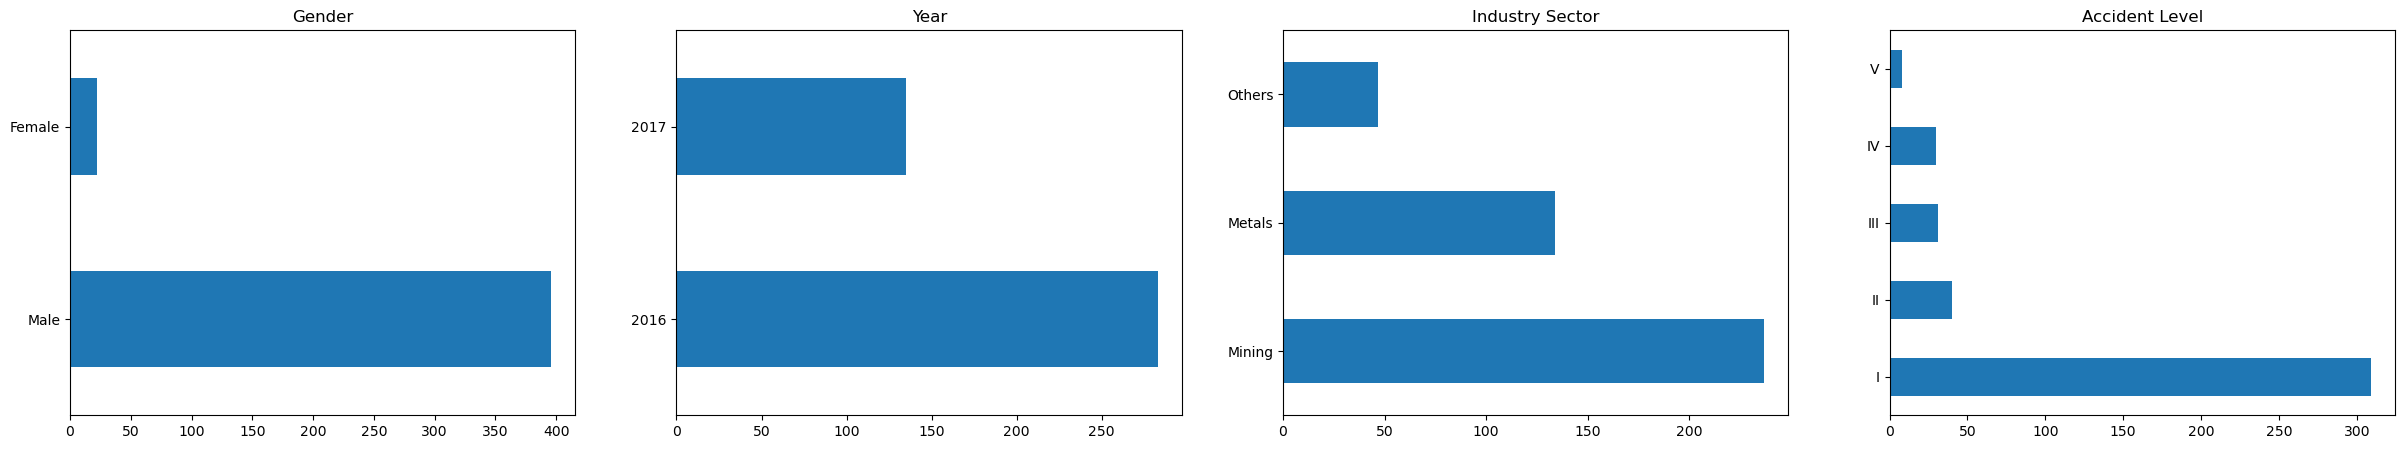

In [ ]:
plt.figure(figsize=(30, 5))
plt.subplot(1,4,1)
accident_df.Gender.value_counts()[:].plot(kind='barh')
plt.title('Gender')

plt.subplot(1,4,2)
accident_df.Year.value_counts()[:].plot(kind='barh')
plt.title('Year')

plt.subplot(1,4,3)
accident_df['Industry Sector'].value_counts()[:].plot(kind='barh')
plt.title('Industry Sector')

plt.subplot(1,4,4)
accident_df['Accident Level'].value_counts()[:].plot(kind='barh')
plt.title('Accident Level')
plt.show()

Majority of the workers who suffered were **Male** Workers  in **2016** year. When compared with the industry sector **Mining** was the dangerous sector after **Metals**. 

Were coming to the **Accident Level** (I means not severe but VI means very severe) **vast amount** of the **accidents** were **Level I** and **least** was **Level V** type of Accidents



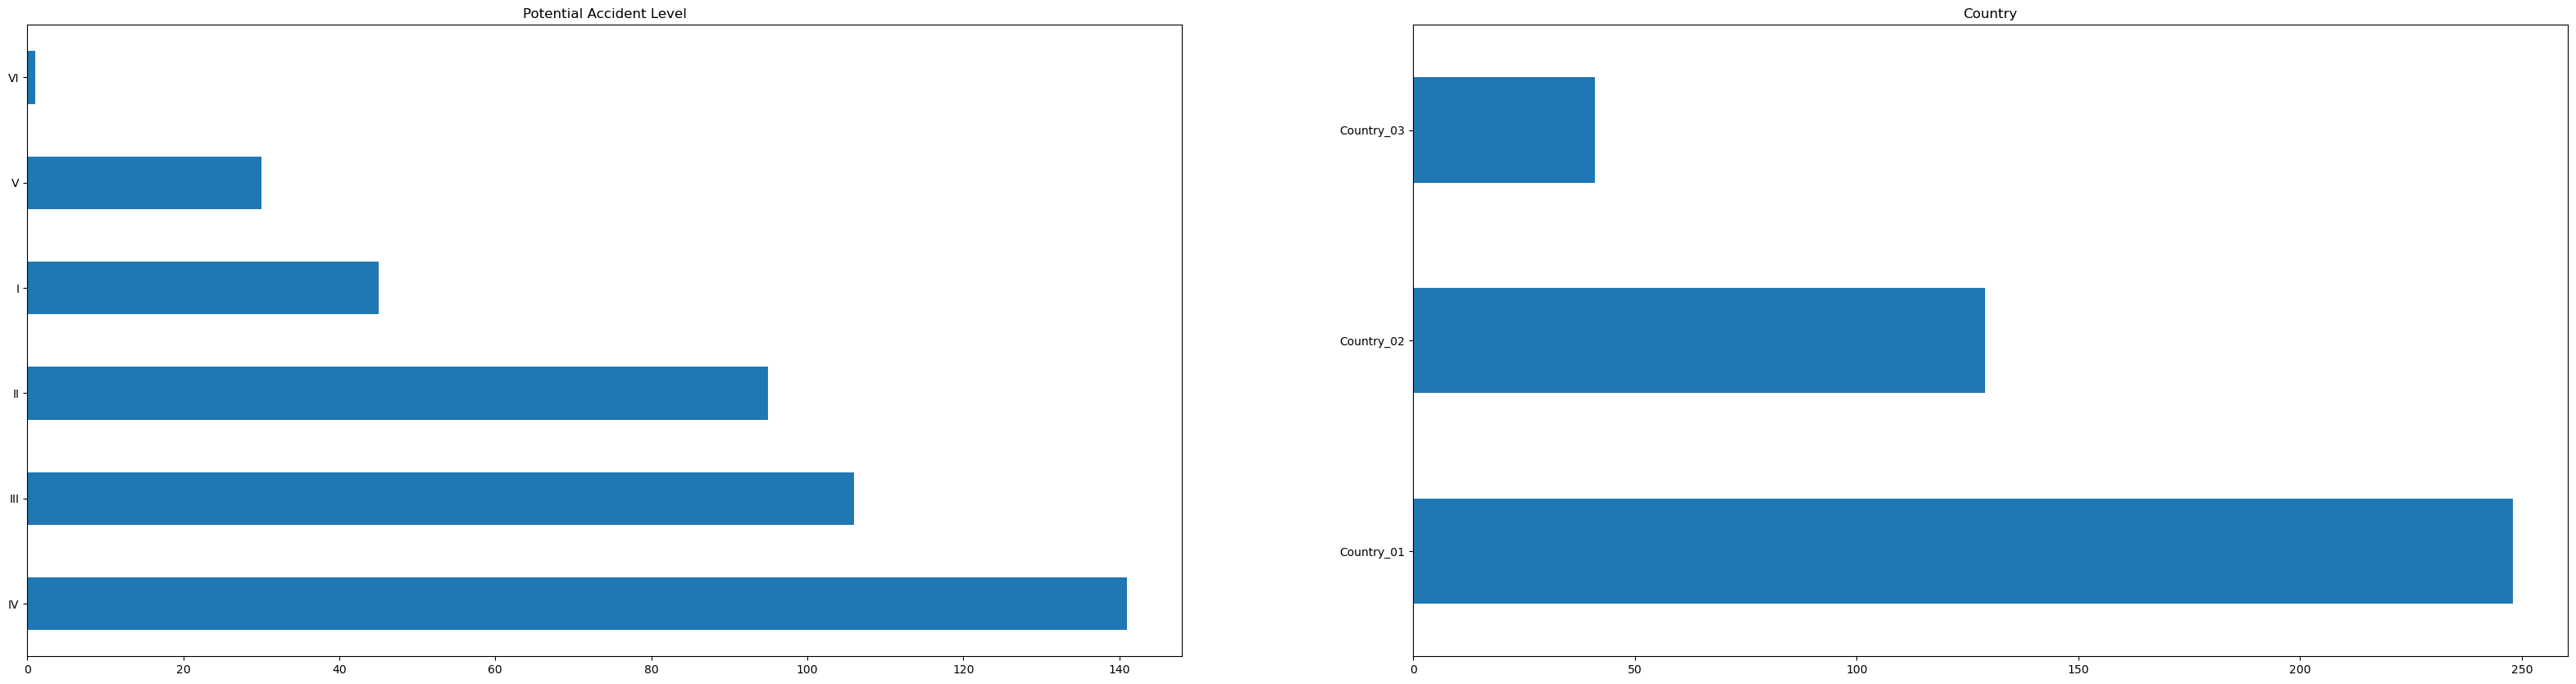

In [ ]:
plt.figure(figsize=(40, 10))
plt.subplot(1,2,1)
accident_df['Potential Accident Level'].value_counts()[:].plot(kind='barh')
plt.title('Potential Accident Level')

plt.subplot(1,2,2)
accident_df['Country'].value_counts()[:].plot(kind='barh')
plt.title('Country')

plt.show()

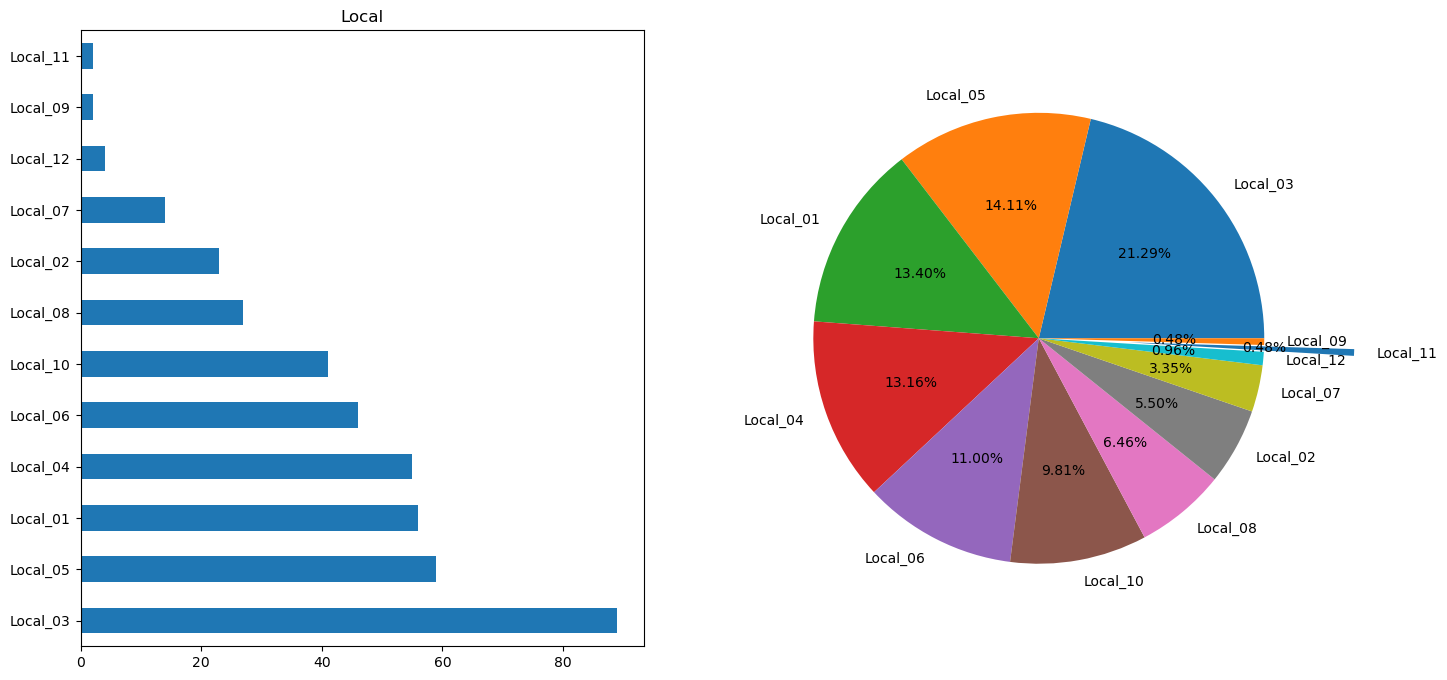

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
accident_df['Local'].value_counts()[:].plot(kind='barh')
plt.title('Local')


plt.subplot(1,2,2)
plt.pie(accident_df['Local'].value_counts(), labels=['Local_03','Local_05','Local_01','Local_04','Local_06','Local_10',
                                                'Local_08','Local_02','Local_07','Local_12','Local_11','Local_09'], 
                                                  explode=(0,0,0,0,0,0,0,0,0,0,0.4,0),autopct = '%1.2f%%')
plt.show()

**Potential Accident Level** (severe the accident could have been (due to other factorsinvolved in the accident) **Level IV** severity was high.**Country 1** was having **sever Accident** damage were least damage was done for **Country 3**. **Mechanical Risk** and **Others** were having **Critical Risk**.

When discussing about local areas **Local_03** was having **major accident** were **Local_11** was having **least accident** prone area.

------------------------------------------------------------
Value Counts for `Employee type` label
------------------------------------------------------------
Third Party count: 185 i.e. 44.0%
Employee count: 178 i.e. 43.0%
Third Party (Remote) count: 55 i.e. 13.0%
------------------------------------------------------------
Distributon of `Employee type` label
------------------------------------------------------------


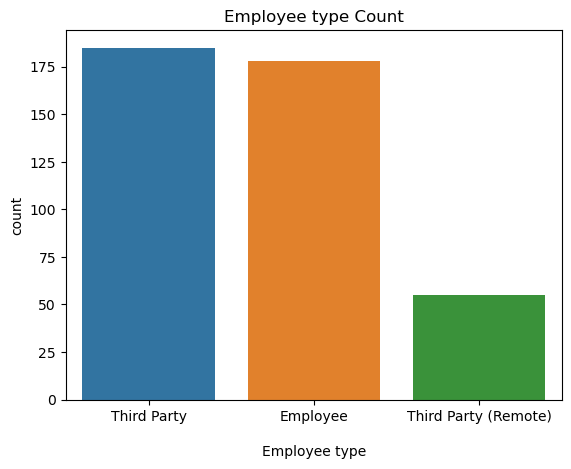

In [ ]:
print('--'*30); print('Value Counts for `Employee type` label'); print('--'*30)

total_row_cnt = accident_df.shape[0]
third_party_cnt = accident_df[accident_df['Employee type'] == 'Third Party'].shape[0]
emp_cnt = accident_df[accident_df['Employee type'] == 'Employee'].shape[0]
third_rem_cnt = accident_df[accident_df['Employee type'] == 'Third Party (Remote)'].shape[0]

print(f'Third Party count: {third_party_cnt} i.e. {round(third_party_cnt/total_row_cnt*100, 0)}%')
print(f'Employee count: {emp_cnt} i.e. {round(emp_cnt/total_row_cnt*100, 0)}%')
print(f'Third Party (Remote) count: {third_rem_cnt} i.e. {round(third_rem_cnt/total_row_cnt*100, 0)}%')

print('--'*30); print('Distributon of `Employee type` label'); print('--'*30)

employ_type = sns.countplot(x=accident_df['Employee type'])
# employ_type.tick_params(axis='x', rotation=90)

plt.title("Employee type Count")
plt.xlabel("\nEmployee type")
plt.show()

- 44% Third party empoyees working in this industry.
- 43% own empoyees working in this industry.
- 13% Third party(Remote) empoyees working in this industry.

In [ ]:
print('--'*30); print('Value Counts for `Accident Level` label'); print('--'*40)

I_acc_cnt = accident_df[accident_df['Accident Level'] == 'I'].shape[0]
II_acc_cnt = accident_df[accident_df['Accident Level'] == 'II'].shape[0]
III_acc_cnt = accident_df[accident_df['Accident Level'] == 'III'].shape[0]
IV_acc_cnt = accident_df[accident_df['Accident Level'] == 'IV'].shape[0]
V_acc_cnt = accident_df[accident_df['Accident Level'] == 'V'].shape[0]
VI_acc_cnt = accident_df[accident_df['Accident Level'] == 'VI'].shape[0]

print(f'Accident Level - I count: {I_acc_cnt} i.e. {round(I_acc_cnt/total_row_cnt*100, 0)}%')
print(f'Accident Level - II count: {II_acc_cnt} i.e. {round(II_acc_cnt/total_row_cnt*100, 0)}%')
print(f'Accident Level - III count: {III_acc_cnt} i.e. {round(III_acc_cnt/total_row_cnt*100, 0)}%')
print(f'Accident Level - IV count: {IV_acc_cnt} i.e. {round(IV_acc_cnt/total_row_cnt*100, 0)}%')
print(f'Accident Level - V count: {V_acc_cnt} i.e. {round(V_acc_cnt/total_row_cnt*100, 0)}%')
print(f'Accident Level - VI count: {VI_acc_cnt} i.e. {round(VI_acc_cnt/total_row_cnt*100, 0)}%')

print('--'*30); print('Value Counts for `Potential Accident Level'); print('--'*40)

I_pot_acc_cnt = accident_df[accident_df['Potential Accident Level'] == 'I'].shape[0]
II_pot_acc_cnt = accident_df[accident_df['Potential Accident Level'] == 'II'].shape[0]
III_pot_acc_cnt = accident_df[accident_df['Potential Accident Level'] == 'III'].shape[0]
IV_pot_acc_cnt = accident_df[accident_df['Potential Accident Level'] == 'IV'].shape[0]
V_pot_acc_cnt = accident_df[accident_df['Potential Accident Level'] == 'V'].shape[0]
VI_pot_acc_cnt = accident_df[accident_df['Potential Accident Level'] == 'VI'].shape[0]

print(f'Potential Accident Level - I count: {I_pot_acc_cnt} i.e. {round(I_pot_acc_cnt/total_row_cnt*100, 0)}%')
print(f'Potential Accident Level - II count: {II_pot_acc_cnt} i.e. {round(II_pot_acc_cnt/total_row_cnt*100, 0)}%')
print(f'Potential Accident Level - III count: {III_pot_acc_cnt} i.e. {round(III_pot_acc_cnt/total_row_cnt*100, 0)}%')
print(f'Potential Accident Level - IV count: {IV_pot_acc_cnt} i.e. {round(IV_pot_acc_cnt/total_row_cnt*100, 0)}%')
print(f'Potential Accident Level - V count: {V_pot_acc_cnt} i.e. {round(V_pot_acc_cnt/total_row_cnt*100, 0)}%')
print(f'Potential Accident Level - VI count: {VI_pot_acc_cnt} i.e. {round(VI_pot_acc_cnt/total_row_cnt*100, 0)}%')


------------------------------------------------------------
Value Counts for `Accident Level` label
--------------------------------------------------------------------------------
Accident Level - I count: 309 i.e. 74.0%
Accident Level - II count: 40 i.e. 10.0%
Accident Level - III count: 31 i.e. 7.0%
Accident Level - IV count: 30 i.e. 7.0%
Accident Level - V count: 8 i.e. 2.0%
Accident Level - VI count: 0 i.e. 0.0%
------------------------------------------------------------
Value Counts for `Potential Accident Level
--------------------------------------------------------------------------------
Potential Accident Level - I count: 45 i.e. 11.0%
Potential Accident Level - II count: 95 i.e. 23.0%
Potential Accident Level - III count: 106 i.e. 25.0%
Potential Accident Level - IV count: 141 i.e. 34.0%
Potential Accident Level - V count: 30 i.e. 7.0%
Potential Accident Level - VI count: 1 i.e. 0.0%


- The number of accidents decreases as the Accident Level increases.
- The number of accidents increases as the Potential Accident Level increases.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Others'),
  Text(1, 0, 'Pressed'),
  Text(2, 0, 'Manual Tools'),
  Text(3, 0, 'Chemical substances'),
  Text(4, 0, 'Cut'),
  Text(5, 0, 'Venomous Animals'),
  Text(6, 0, 'Projection'),
  Text(7, 0, 'Bees'),
  Text(8, 0, 'Fall'),
  Text(9, 0, 'Vehicles and Mobile Equipment'),
  Text(10, 0, 'Fall prevention (same level)'),
  Text(11, 0, 'remains of choco'),
  Text(12, 0, 'Pressurized Systems'),
  Text(13, 0, 'Fall prevention'),
  Text(14, 0, 'Suspended Loads'),
  Text(15, 0, 'Power lock'),
  Text(16, 0, 'Liquid Metal'),
  Text(17, 0, 'Pressurized Systems / Chemical Substances'),
  Text(18, 0, 'Blocking and isolation of energies'),
  Text(19, 0, 'Machine Protection'),
  Text(20, 0, 'Electrical Shock'),
  Text(21, 0, 'Poll'),
  Text(22, 0, 'Individual protection equipment'),
  Text(23, 0, 'Projection/Manual Tools'),
  Text(24, 0

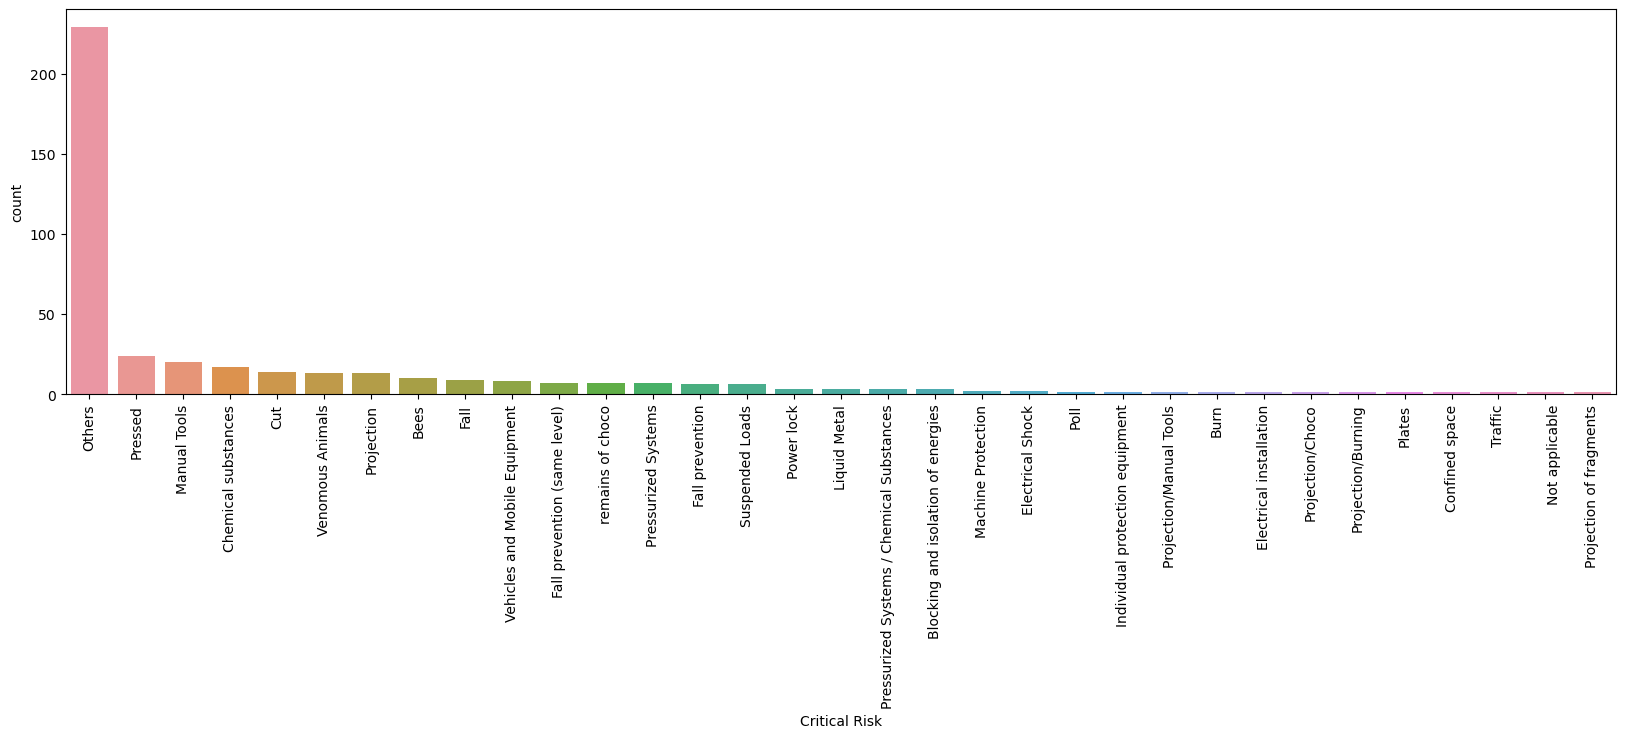

In [ ]:
plt.figure(figsize=(20,5))
descending_order = accident_df['Critical Risk'].value_counts().sort_values(ascending=False).index
sns.countplot(x=accident_df['Critical Risk'],order=descending_order)
plt.xticks(rotation = 'vertical')

- When we count the number of incidents by each type of critical risk, Others tops the list.
- Incidents from burn, electric shocks are very less when compared to others, cut, pressed, manual tools.

#### Observations

- WeekofYear featuer is having very high positive correlation with Month feature.

#### Let us analyse how many accidents happened on year, month and weekday basis

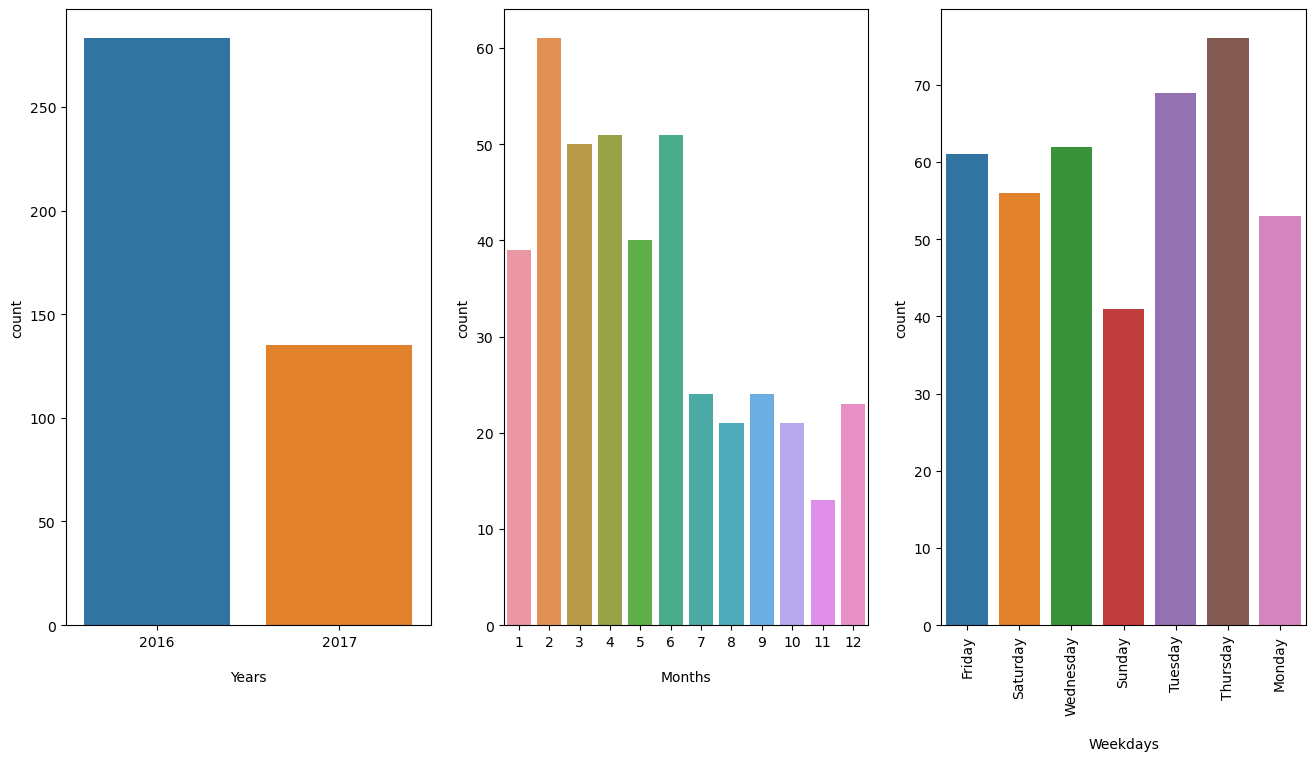

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(1,3,1)
sns.countplot(x=accident_df['Year'])
plt.xlabel("\nYears")

plt.subplot(1,3,2)
# plt.figure(figsize=(10,5))
sns.countplot(x=accident_df['Month'])
plt.xlabel("\nMonths")

plt.subplot(1,3,3)
# plt.figure(figsize=(10,5))
week_plt = sns.countplot(x=accident_df['Weekday'])
week_plt.tick_params(axis='x', rotation=90)
plt.xlabel("\nWeekdays")

plt.show()

#### Analysis

- Most accidents happend in year 2016.Count is 285 ,which is equivalent to **67.06%** .
- Most accidents happend in Feb month.Count is 61 ,which is equivalent to **14.35%**
- Most accidents happend in Thursday .Count is 79 ,which is equivalent to **18.59%**

In [ ]:
def cross(d,Col1,col2,):
  x = pd.crosstab(d[Col1],d[col2])
  x.columns = list(d[col2].unique())
  # print(list(data[col2].unique()))
  return x

In [ ]:
cross(accident_df,'Country','Accident Level')

I  IV  III  II  V
Country                        
Country_01  177  19   21  23  8
Country_02   98  19    7   5  0
Country_03   34   2    3   2  0

It is Clear that **Country_1** was having high number of accidents and the **level of accidents amoung the countries are least** when compared to other level of accidents severity

In [ ]:
cross(accident_df,'Country','Local') 

Local_01  Local_02  Local_03  Local_04  Local_05  Local_06  \
Country                                                                  
Country_01        56         0        89        55         0        46   
Country_02         0        23         0         0        59         0   
Country_03         0         0         0         0         0         0   

            Local_07  Local_08  Local_10  Local_09  Local_11  Local_12  
Country                                                                 
Country_01         0         0         0         0         2         0  
Country_02        14        27         2         0         0         4  
Country_03         0         0         0        41         0         0


**Local_3, Local_5, Local_4** and **Local_1** were have **majorty of accidents** when compared to others, were **Local_12** were having **Least** Number of accidents

In [ ]:
cross(accident_df,'Country','Industry Sector')

Mining  Metals  Others
Country                           
Country_01      46     200       2
Country_02      88      37       4
Country_03       0       0      41

**Mining** industry was having **major** number of accidents when compared to **Others** indstry were in **Country 1** were having **Majority**

#### Analysis of Industry Sector wrt Accident/ Potential Accident Level

(array([0, 1, 2]),
 [Text(0, 0, 'Mining'), Text(1, 0, 'Metals'), Text(2, 0, 'Others')])

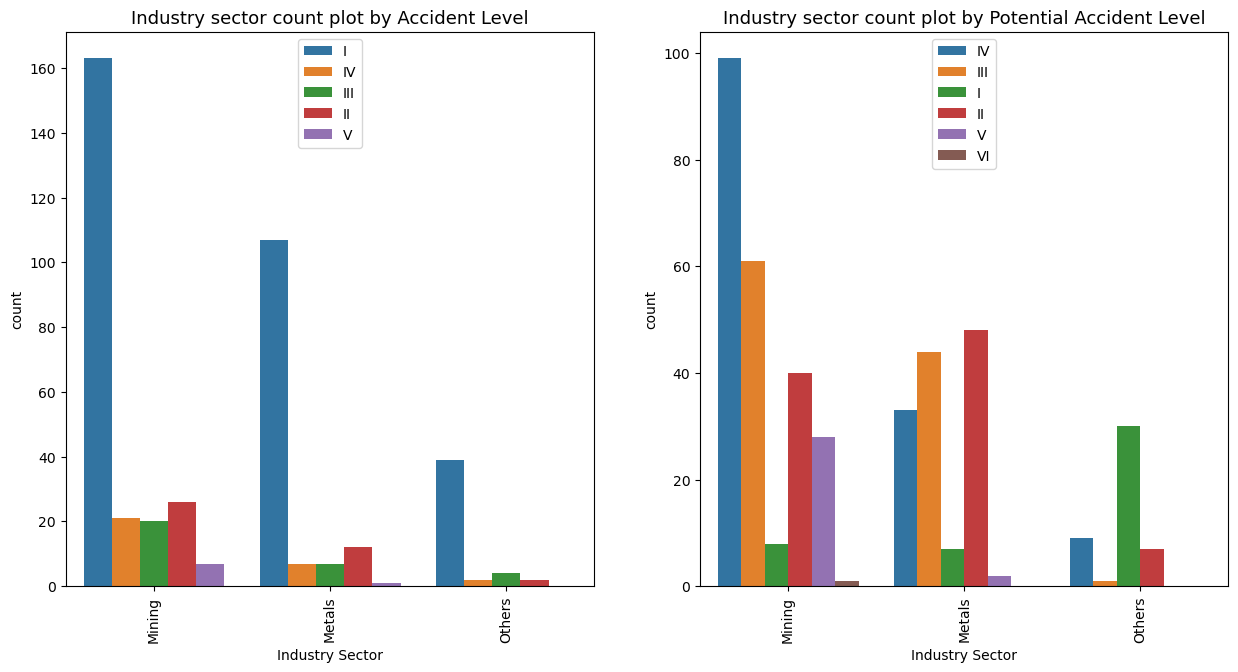

In [ ]:
fig = plt.figure(figsize = (15, 7.2))
ax = fig.add_subplot(121)
sns.countplot(x = 'Industry Sector', data = accident_df, ax = ax, orient = 'v',
                  hue = 'Accident Level').set_title('Industry Sector'.capitalize() +' count plot by Accident Level', 
                                                                      fontsize = 13)
plt.legend(labels = accident_df['Accident Level'].unique())
plt.xticks(rotation = 90)
    
ax = fig.add_subplot(122)
sns.countplot(x ='Industry Sector' , data = accident_df, ax = ax, orient = 'v', 
                  hue = 'Potential Accident Level').set_title('Industry Sector'.capitalize() +' count plot by Potential Accident Level', 
                                                                      fontsize = 13)
plt.legend(labels = accident_df['Potential Accident Level'].unique())
plt.xticks(rotation = 90)

**Industry Sector Vs Accident Level**
- Accident level I is highest in all industry sector (Mining, Metals and Other).
- Most accidents happened in Mining industry sector.
- Others industry sector has less accidents in comparision to other industries.
- There are very few cases for Accident level 5.Others sector didn't reported any case for this level

**Industry Sector Vs Potential Accident Level**
- Potential Accident level 4 is highest in all industry sector (Mining, Metals and Others).
- Most accidents happened in Mining industry sector.
- Others industry sector has less accidents in comparision to other industries.
- These are very few cases for Accident level 6.Metals and Others sector didn;t reported case for this accident level

In [ ]:
pd.pivot_table(accident_df,'Industry Sector',index=['Country','Accident Level'],
                     columns=[ 'Gender'],aggfunc=len )

Gender                     Female   Male
Country    Accident Level               
Country_01 I                  6.0  171.0
           II                 NaN   19.0
           III                1.0   20.0
           IV                 NaN   23.0
           V                  NaN    8.0
Country_02 I                 12.0   86.0
           II                 3.0   16.0
           III                NaN    7.0
           IV                 NaN    5.0
Country_03 I                  NaN   34.0
           II                 NaN    2.0
           III                NaN    3.0
           IV                 NaN    2.0

In Most of the **Countries** major of accidents were **Level 1** and **Level 2** when compared to other levels.

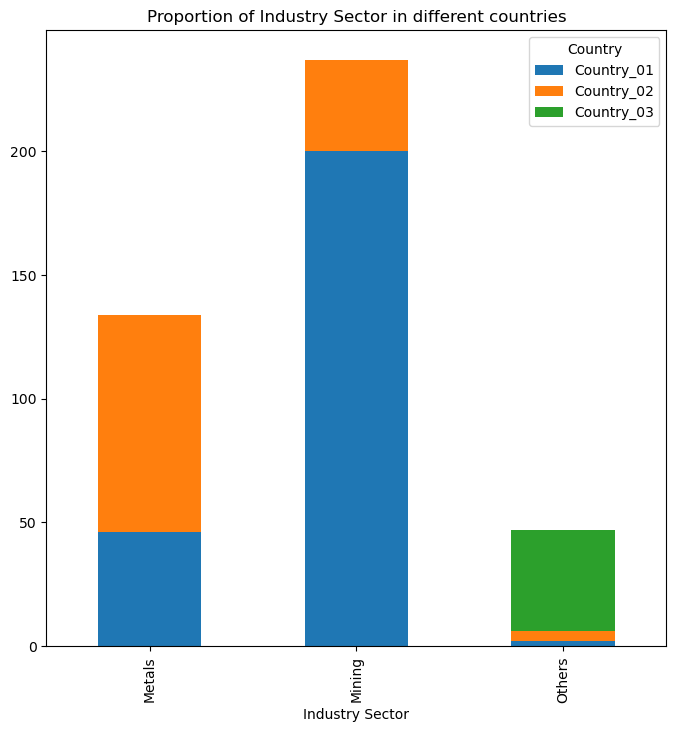

In [ ]:
# Check the proportion of Industry sector in different countries
indsec_cntry_table = pd.crosstab(index = accident_df['Industry Sector'], columns = accident_df['Country'])
indsec_cntry_table.plot(kind = 'bar', figsize=(8,8), stacked = True)
plt.title("Proportion of Industry Sector in different countries")
plt.show()

#### Observations

- Metals and Mining industry sector plants are not available in Country_03.
- Distribution of industry sector differ significantly in each country. But let's check the proportion of metals, mining and others sector in Country_01 and is that difference is statistically significant?

#### Hypothesis testing

#### 1. State the H0 and Ha
- Ho = The proportions of industry sector is not differ in different countries
- Ha = The proportions of industry sector is differ in different countries

#### 2. Decide the significance level: alpha = 0.05
#### 3. Identify the test-statistic: Z-test of proportions
#### 4. Calculate the p_value using test-statistic

In [ ]:
mining_country1 = accident_df[accident_df['Industry Sector'] == 'Mining']['Country'].value_counts()[0]
mining_country2 = accident_df[accident_df['Industry Sector'] == 'Mining']['Country'].value_counts()[1]

metals_country1 = accident_df[accident_df['Industry Sector'] == 'Metals']['Country'].value_counts()[1]
metals_country2 = accident_df[accident_df['Industry Sector'] == 'Metals']['Country'].value_counts()[0]

others_country1 = accident_df[accident_df['Industry Sector'] == 'Others']['Country'].value_counts()[2]
others_country2 = accident_df[accident_df['Industry Sector'] == 'Others']['Country'].value_counts()[1]
others_country3 = accident_df[accident_df['Industry Sector'] == 'Others']['Country'].value_counts()[0]

country_01_cnt = accident_df[accident_df.Country == 'Country_01'].shape[0]
print([mining_country1, metals_country1, others_country1], [country_01_cnt])
print(f'Proportions of mining, metals, others in country_01 = {round(200/248,2)}%, {round(46/248,2)}%, {round(2/248,2)}% respectively')

[200, 46, 2] [248]
Proportions of mining, metals, others in country_01 = 0.81%, 0.19%, 0.01% respectively


In [ ]:
# Z-test proportions: More than 2 samples not implemented yet, hence I am passing two elements
t_statistic, p_value = proportions_ztest([mining_country1, metals_country1], [country_01_cnt])

print("Mining and Metals t_statistic", t_statistic)
print("Mining and Metals p_value", p_value)

t_statistic, p_value = proportions_ztest([mining_country1, others_country1], [country_01_cnt])

print("Mining and Others t_statistic", t_statistic)
print("Mining and Others p_value", p_value)

Mining and Metals t_statistic 13.830057992106923
Mining and Metals p_value 1.6788511371823555e-43
Mining and Others t_statistic 18.094920466702863
Mining and Others p_value 3.494480338628687e-73


In [ ]:
reject_null = False
if p_value < 0.05:
    reject_null = True 
else: 
    reject_null = False
    
print("reject null? : " + str(reject_null))

reject null? : True


- Hence we fail to reject Null Hypothesis, we have enough (95%) evidence to prove that, the proportion of own employees in each gender is equal.

####  Industry Sector by Gender - Is the distribution of industry sector differ significantly in different genders?

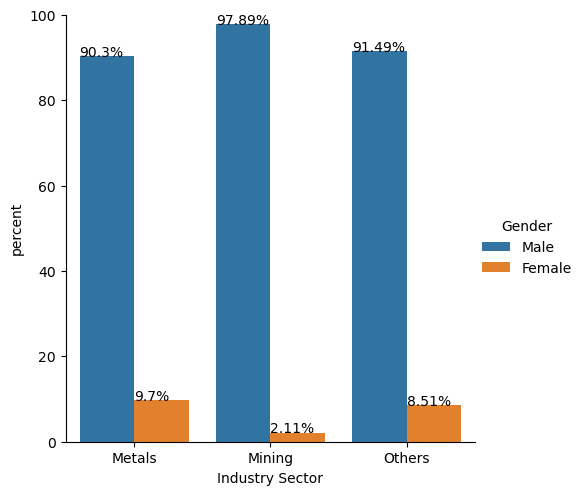

In [ ]:
x,y =  'Industry Sector','Gender'

df1 = accident_df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

#### Observations

- Proportion of Metals sector employees in each gender is not equal.
- Proportion of Mining sector employees in each gender is not equal.
- Proportion of Others sector employees in each gender is not equal.

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


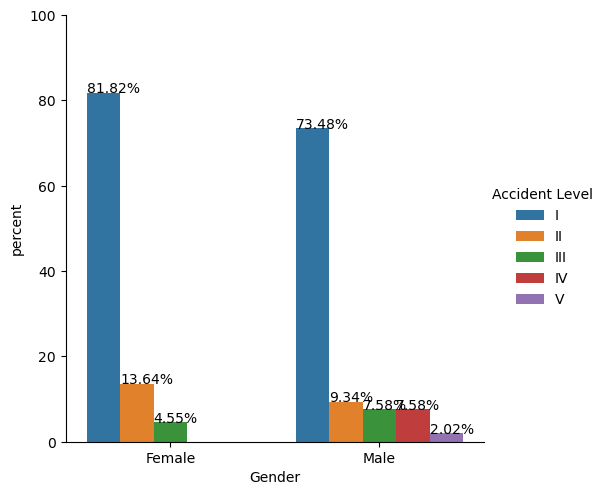

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


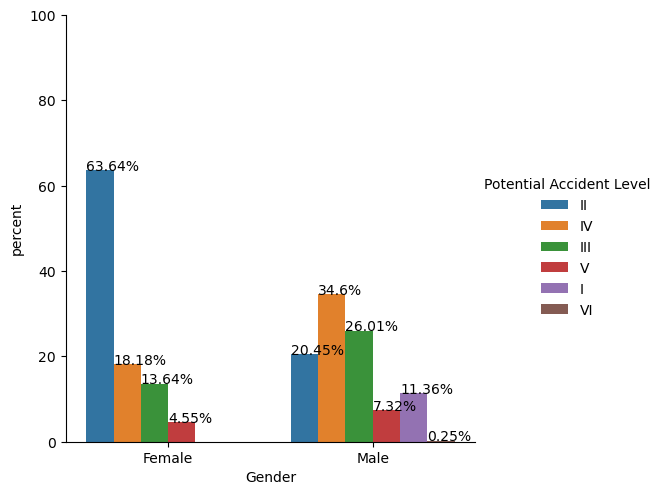

In [ ]:
def disp_plt(y):
    x =  'Gender'

    df1 = accident_df.groupby(x)[y].value_counts(normalize=True)
    df1 = df1.mul(100)
    df1 = df1.rename('percent').reset_index()

    g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
    g.ax.set_ylim(0,100)

    for p in g.ax.patches:
        txt = str(p.get_height().round(2)) + '%'
        txt_x = p.get_x() 
        txt_y = p.get_height()
        g.ax.text(txt_x,txt_y,txt)
        

disp_plt('Accident Level')
disp_plt('Potential Accident Level')

#### Observations

- For both accident levels, the incidence of Employee is higher at low accident levels, but the incidence of Third parties seems to be slightly higher at high accident levels.

#### Study Summary Statistics

In [ ]:
# Summary statistics
accident_df.drop(columns='Description').describe(exclude=[np.number]).T

count unique                  top freq      first  \
Date                       418    287  2017-02-08 00:00:00    6 2016-01-01   
Country                    418      3           Country_01  248        NaT   
Local                      418     12             Local_03   89        NaT   
Industry Sector            418      3               Mining  237        NaT   
Accident Level             418      5                    I  309        NaT   
Potential Accident Level   418      6                   IV  141        NaT   
Gender                     418      2                 Male  396        NaT   
Employee type              418      3          Third Party  185        NaT   
Critical Risk              418     33               Others  229        NaT   
Weekday                    418      7             Thursday   76        NaT   
Season                     418      4               Autumn  141        NaT   

                               last  
Date                     2017-07-09  
Country                         NaT  
Local                           NaT  
Industry Sector                 NaT  
Accident Level                  NaT  
Potential Accident Level        NaT  
Gender                          NaT  
Employee type                   NaT  
Critical Risk                   NaT  
Weekday                         NaT  
Season                          NaT

#### Study Correlation

In [ ]:
# Check the Correlation
accident_df.corr()

Year     Month       Day  WeekofYear  Is_Holiday
Year        1.000000 -0.416621 -0.001982   -0.418798   -0.041169
Month      -0.416621  1.000000  0.002133    0.964295   -0.082047
Day        -0.001982  0.002133  1.000000    0.060982   -0.028673
WeekofYear -0.418798  0.964295  0.060982    1.000000   -0.028368
Is_Holiday -0.041169 -0.082047 -0.028673   -0.028368    1.000000

In [ ]:
!pip install gensim --upgrade

### EDA Summary:

### Local

- Highest manufacturing plants are located in Local_03 city and lowest in Local_09 city.

###  Country

- Percentage(%) of accidents occurred in respective countries: 59% in Country_01, 31% in Country_02 and 10% in Country_03.

### Industry Sector

- Percentage(%) of manufacturing plants belongs to respective sectors: 57% to Mining sector, 32% to Metals sector and 11% to Others sector.

### Country + Industry Sector

- Metals and Mining industry sector plants are not available in Country_03.
- Distribution of industry sector differ significantly in each country.

### Accident Levels

- The number of accidents decreases as the Accident Level increases and increases as the Potential Accident Level increases.

### Gender

- There are more men working in this industry as compared to women.

### Employee type

- 44% Third party empoyees, 43% own empoyees and 13% Third party(Remote) empoyees working in this industry.

### Gender + Employee type

- Proportion of third party employees in each gender is equal, third party(remote) employees in each gender is not equal and own employees in each gender is not equal.

### Gender + Industry Sector

- Proportion of Metals, Mining and Others sector employees in each gender is not equal

### Gender + Accident Levels

- Males have a higher accident levels than females.
- There are many low risks at general accident level, but many high risks at potential accident level.

### Accident Levels + Employee type

- For both accident levels, the incidence of Employee is higher at low accident levels, but the incidence of Third parties seems to be slightly higher at high accident levels.

### Accident Levels + Calendar

- Accidents are recorded from 1st Jan 2016 to 9th July 2017 in every month, there are high number of accidents in 2016 and less in 2017.
- Number of accidents are high in beginning of the year and it keeps decreasing later.
- Number of accidents are very high in particular days like 4, 8 and 16 in every month.
- Number of accidents increased during the middle of the week and declined since the middle of th week.

- Both of the two accident level have the tendency that non-severe levels decreased throughout the year, but severe levels did not changed much, and some of these levels increased slightly in the second half of the year.

- Both of the two accident level is thought that non-severe levels decreased in the first and the last of the week, but severe levels did not changed much.

### Critical Risk

- Most of the critical risks are classified as Others.


## NLP Analysis

--------------------------------------------------------------------------------------------------------------
Checking 5 random Descriptions and accident_levels from the data where the length of Description is > 100
--------------------------------------------------------------------------------------------------------------
Description: During the maintenance of the peristaltic pump 02BP0166 to change the internal hose, the rupture tubing of the reserve pump 02BP0167 ruptured after it started to operate, designing solution heated towards the employee, reaching his left forearm causing irritation in the skin.
accident_level: I

Description: During the maintenance work of the vertical pump (8 ") of zinc concentrate, the three mechanics were performing lifting maneuvers to be able to position the pump to the drawer, instants in which the pump becomes clogged by the reduced space of the work area and in order to release the pump they place a young lady in the lower part, at which time sh

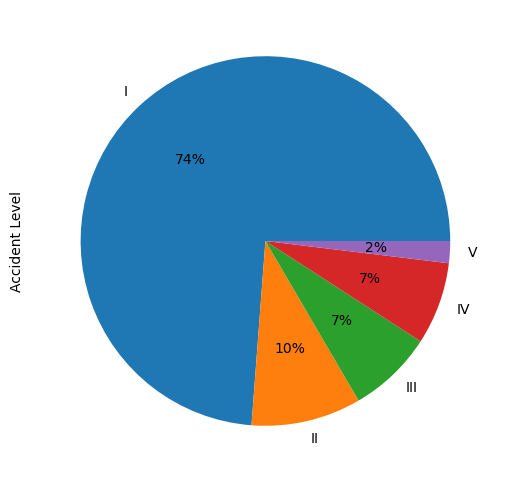

In [ ]:
# Checking 5 random Descriptions and accident_levels from the data where the length of headline is > 100
print('--'*55); print('Checking 5 random Descriptions and accident_levels from the data where the length of Description is > 100'); print('--'*55)
indexes = list(accident_df.loc[accident_df['Description'].str.len() > 100, 'Description'].index)
rands = random.sample(indexes, 5)
descriptions, accident_levels = list(accident_df.loc[rands, 'Description']), list(accident_df.loc[rands, 'Accident Level'])

_ = [print(f'Description: {description}\naccident_level: {acclevel}\n') for description, acclevel in zip(descriptions, accident_levels)]

print('--'*40); print('Distributon of accident_level where the length of Description is > 100'); print('--'*40)
_ = accident_df.loc[indexes, 'Accident Level'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', labels = ['I', 'II', 'III', 'IV', 'V'], figsize = (10, 6))

#### Observations

- 34% of data where accident description > 100 is captured in high medium potential accident level.
- 25% of data where accident description > 100 is captured in medium potential accident level.
- 23% of data where accident description > 100 is captured in low potential accident level.
- Based on some random headlines seen above, it appears that the data is mostly lower-cased. Pre-processing such as removing punctuations and lemmatization can be used.
- There are few alphanumeric characters like AFO-755 captured in description where removing these characters might help.
- There are digits in the description for e.g. ditch 3570, 0.50 cm deep, 30 kg where removing the digits wouldn't help.

In [ ]:
#!pip install text_preprocessing

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.tokenize import word_tokenize
from tqdm import tqdm
from nltk.corpus import stopwords
stop = stopwords.words('english')
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\veerendra\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\veerendra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from nltk.stem import WordNetLemmatizer,PorterStemmer
from wordcloud import WordCloud, STOPWORDS

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\veerendra\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import string
def preprocess_text(text):
      corpus=[]
      #stem=PorterStemmer()
      lem=WordNetLemmatizer()
      for news in text:
          words=[w for w in word_tokenize(news) if (w not in stop)]
          
          words=[lem.lemmatize(w) for w in words if len(w)>2]
          words = [''.join(c for c in s if c not in string.punctuation) for s in words if s]
          words = [word.lower() for word in words]
          words = [word for word in words if word.isalpha()]
          corpus.append(words) 
         
      return corpus     
      
accident_df['processed_text']= preprocess_text(accident_df['Description'])

In [ ]:
accident_df.head()

Date     Country     Local Industry Sector Accident Level  \
0 2016-01-01  Country_01  Local_01          Mining              I   
1 2016-01-02  Country_02  Local_02          Mining              I   
2 2016-01-06  Country_01  Local_03          Mining              I   
3 2016-01-08  Country_01  Local_04          Mining              I   
4 2016-01-10  Country_01  Local_04          Mining             IV   

  Potential Accident Level Gender         Employee type        Critical Risk  \
0                       IV   Male           Third Party              Pressed   
1                       IV   Male              Employee  Pressurized Systems   
2                      III   Male  Third Party (Remote)         Manual Tools   
3                        I   Male           Third Party               Others   
4                       IV   Male           Third Party               Others   

                                         Description  Year  Month  Day  \
0  While removing the drill rod of the Jumbo 08 f...  2016      1    1   
1  During the activation of a sodium sulphide pum...  2016      1    2   
2  In the sub-station MILPO located at level +170...  2016      1    6   
3  Being 9:45 am. approximately in the Nv. 1880 C...  2016      1    8   
4  Approximately at 11:45 a.m. in circumstances t...  2016      1   10   

     Weekday  WeekofYear  Season  Is_Holiday  \
0     Friday          53  Summer           1   
1   Saturday          53  Summer           0   
2  Wednesday           1  Summer           0   
3     Friday           1  Summer           0   
4     Sunday           1  Summer           0   

                                      processed_text  
0  [while, removing, drill, rod, jumbo, maintenan...  
1  [during, activation, sodium, sulphide, pump, p...  
2  [substation, milpo, located, level, collaborat...  
3  [being, approximately, personnel, begin, task,...  
4  [approximately, am, circumstance, mechanic, an...

In [ ]:
accident_df['processed_text']

0      [while, removing, drill, rod, jumbo, maintenan...
1      [during, activation, sodium, sulphide, pump, p...
2      [substation, milpo, located, level, collaborat...
3      [being, approximately, personnel, begin, task,...
4      [approximately, am, circumstance, mechanic, an...
                             ...                        
420    [being, approximately, am, approximately, lift...
421    [the, collaborator, moved, infrastructure, off...
422    [during, environmental, monitoring, activity, ...
423    [the, employee, performed, activity, stripping...
424    [am, assistant, cleaned, floor, module, centra...
Name: processed_text, Length: 418, dtype: object

In [ ]:
lgt = []
for i in accident_df['processed_text']:
  lgt.append(len(i))
print('Maximum length of the sentence in processed text (in list) :',max(lgt))

Maximum length of the sentence in processed text (in list) : 95


In [ ]:
accident_df

Date     Country     Local Industry Sector Accident Level  \
0   2016-01-01  Country_01  Local_01          Mining              I   
1   2016-01-02  Country_02  Local_02          Mining              I   
2   2016-01-06  Country_01  Local_03          Mining              I   
3   2016-01-08  Country_01  Local_04          Mining              I   
4   2016-01-10  Country_01  Local_04          Mining             IV   
..         ...         ...       ...             ...            ...   
420 2017-07-04  Country_01  Local_04          Mining              I   
421 2017-07-04  Country_01  Local_03          Mining              I   
422 2017-07-05  Country_02  Local_09          Metals              I   
423 2017-07-06  Country_02  Local_05          Metals              I   
424 2017-07-09  Country_01  Local_04          Mining              I   

    Potential Accident Level  Gender         Employee type  \
0                         IV    Male           Third Party   
1                         IV    Male              Employee   
2                        III    Male  Third Party (Remote)   
3                          I    Male           Third Party   
4                         IV    Male           Third Party   
..                       ...     ...                   ...   
420                      III    Male           Third Party   
421                       II  Female              Employee   
422                       II    Male              Employee   
423                       II    Male              Employee   
424                       II  Female           Third Party   

                    Critical Risk  \
0                         Pressed   
1             Pressurized Systems   
2                    Manual Tools   
3                          Others   
4                          Others   
..                            ...   
420                        Others   
421                        Others   
422              Venomous Animals   
423                           Cut   
424  Fall prevention (same level)   

                                           Description  Year  Month  Day  \
0    While removing the drill rod of the Jumbo 08 f...  2016      1    1   
1    During the activation of a sodium sulphide pum...  2016      1    2   
2    In the sub-station MILPO located at level +170...  2016      1    6   
3    Being 9:45 am. approximately in the Nv. 1880 C...  2016      1    8   
4    Approximately at 11:45 a.m. in circumstances t...  2016      1   10   
..                                                 ...   ...    ...  ...   
420  Being approximately 5:00 a.m. approximately, w...  2017      7    4   
421  The collaborator moved from the infrastructure...  2017      7    4   
422  During the environmental monitoring activity i...  2017      7    5   
423  The Employee performed the activity of strippi...  2017      7    6   
424  At 10:00 a.m., when the assistant cleaned the ...  2017      7    9   

       Weekday  WeekofYear  Season  Is_Holiday  \
0       Friday          53  Summer           1   
1     Saturday          53  Summer           0   
2    Wednesday           1  Summer           0   
3       Friday           1  Summer           0   
4       Sunday           1  Summer           0   
..         ...         ...     ...         ...   
420    Tuesday          27  Winter           0   
421    Tuesday          27  Winter           0   
422  Wednesday          27  Winter           0   
423   Thursday          27  Winter           0   
424     Sunday          27  Winter           0   

                                        processed_text  
0    [while, removing, drill, rod, jumbo, maintenan...  
1    [during, activation, sodium, sulphide, pump, p...  
2    [substation, milpo, located, level, collaborat...  
3    [being, approximately, personnel, begin, task,...  
4    [approximately, am, circumstance, mechanic, an...  
..                                                 ...  
420  [being, approximately, am, approximately, lift...

In [ ]:
from nltk import tokenize,stem
from nltk.stem import WordNetLemmatizer

In [ ]:
def nlp_preprocesser(row):
    sentence = row.Description
    #convert all characters to lowercase
    lowered = sentence.lower()
    tok = tokenize.word_tokenize(lowered)

    #lemmatizing & stemming
    lemmatizer = stem.WordNetLemmatizer()
    lem = [lemmatizer.lemmatize(i) for i in tok if i not in STOPWORDS]
#     stemmer = stem.PorterStemmer()
#     stems = [stemmer.stem(i) for i in lem if i not in STOPWORDS]

    #remove non-alphabetical characters like '(', '.' or '!'
    alphas = [i for i in lem if i.isalpha() and (i not in STOPWORDS)]
    return " ".join(alphas)

In [ ]:
accident_df['Description_processed'] = accident_df.apply(nlp_preprocesser, axis=1)
accident_df.head(3)

Date     Country     Local Industry Sector Accident Level  \
0 2016-01-01  Country_01  Local_01          Mining              I   
1 2016-01-02  Country_02  Local_02          Mining              I   
2 2016-01-06  Country_01  Local_03          Mining              I   

  Potential Accident Level Gender         Employee type        Critical Risk  \
0                       IV   Male           Third Party              Pressed   
1                       IV   Male              Employee  Pressurized Systems   
2                      III   Male  Third Party (Remote)         Manual Tools   

                                         Description  Year  Month  Day  \
0  While removing the drill rod of the Jumbo 08 f...  2016      1    1   
1  During the activation of a sodium sulphide pum...  2016      1    2   
2  In the sub-station MILPO located at level +170...  2016      1    6   

     Weekday  WeekofYear  Season  Is_Holiday  \
0     Friday          53  Summer           1   
1   Saturday          53  Summer           0   
2  Wednesday           1  Summer           0   

                                      processed_text  \
0  [while, removing, drill, rod, jumbo, maintenan...   
1  [during, activation, sodium, sulphide, pump, p...   
2  [substation, milpo, located, level, collaborat...   

                               Description_processed  
0  removing drill rod jumbo maintenance superviso...  
1  activation sodium sulphide pump piping uncoupl...  
2  milpo located level collaborator excavation wo...

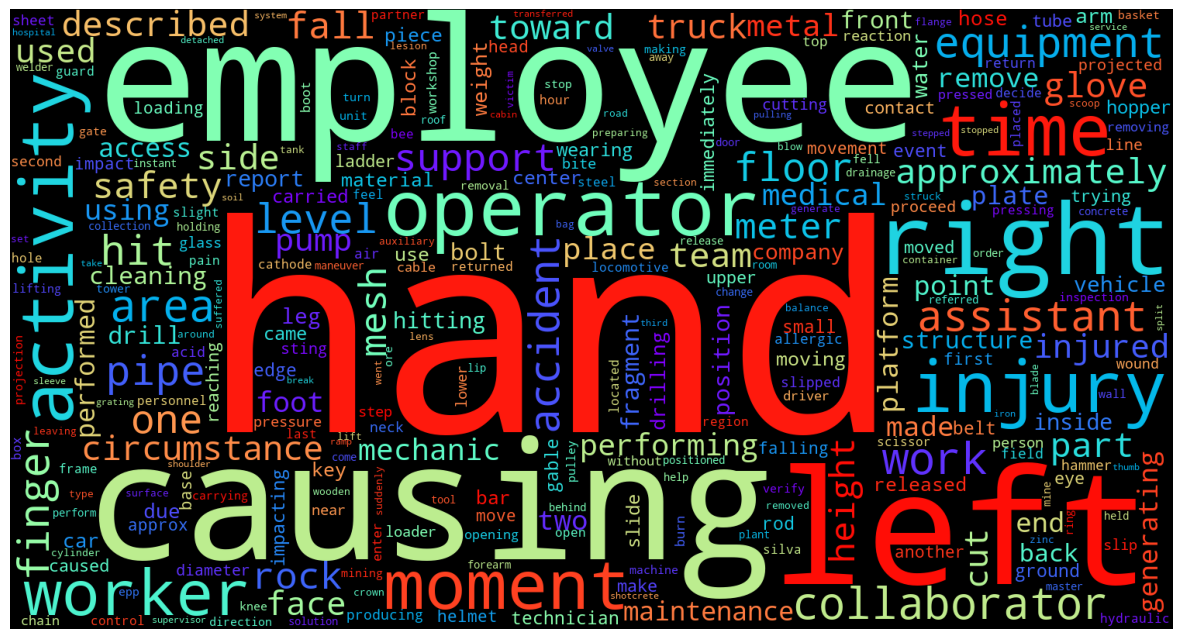

In [ ]:
wordcloud_all_accident_level = WordCloud(width = 1500, height = 800, random_state=0, background_color='black', colormap='rainbow', \
                      min_font_size=5, max_words=300, collocations=False, min_word_length=3, stopwords = STOPWORDS).generate(" ".join(accident_df['Description_processed'].values))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud_all_accident_level)
plt.axis('off')
plt.show()

In [ ]:
def word_could_accident_level(data):
    wordcloud = WordCloud(width = 1500, height = 800, random_state=0, background_color='black', colormap='rainbow', \
                          min_font_size=5, max_words=300, collocations=False, min_word_length=3, stopwords = STOPWORDS).generate(" ".join(data))
    plt.figure(figsize=(15,10))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

In [ ]:
accident_df['Accident Level'].value_counts()

I      309
II      40
III     31
IV      30
V        8
Name: Accident Level, dtype: int64

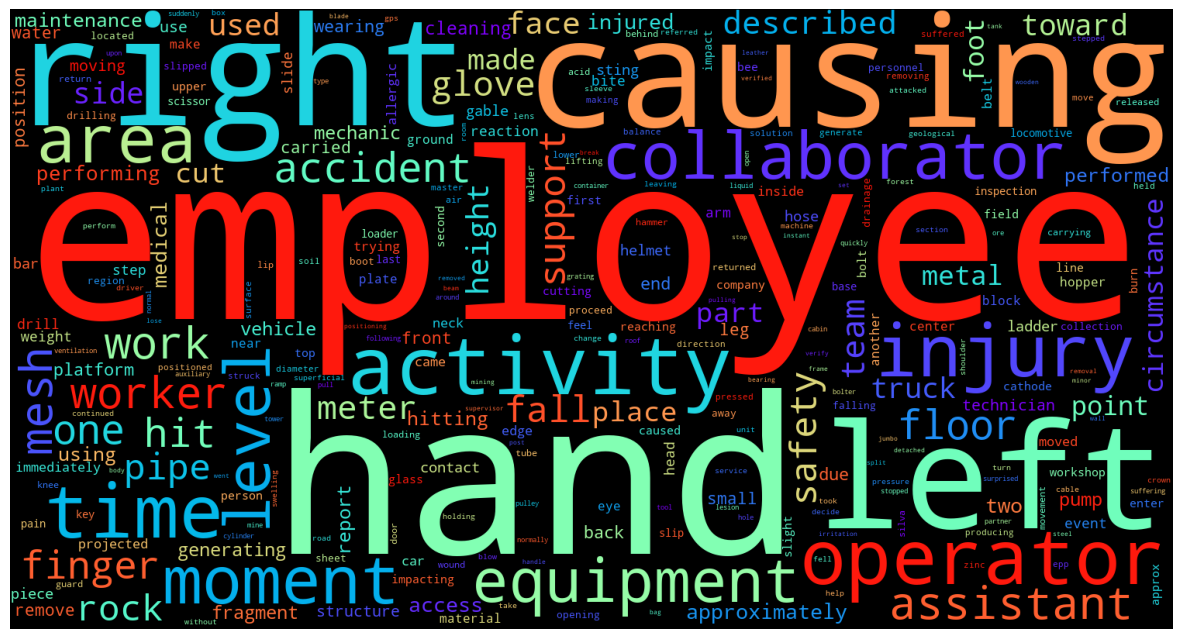

In [ ]:
word_could_accident_level(accident_df[accident_df['Accident Level'] == 'I']['Description_processed'])

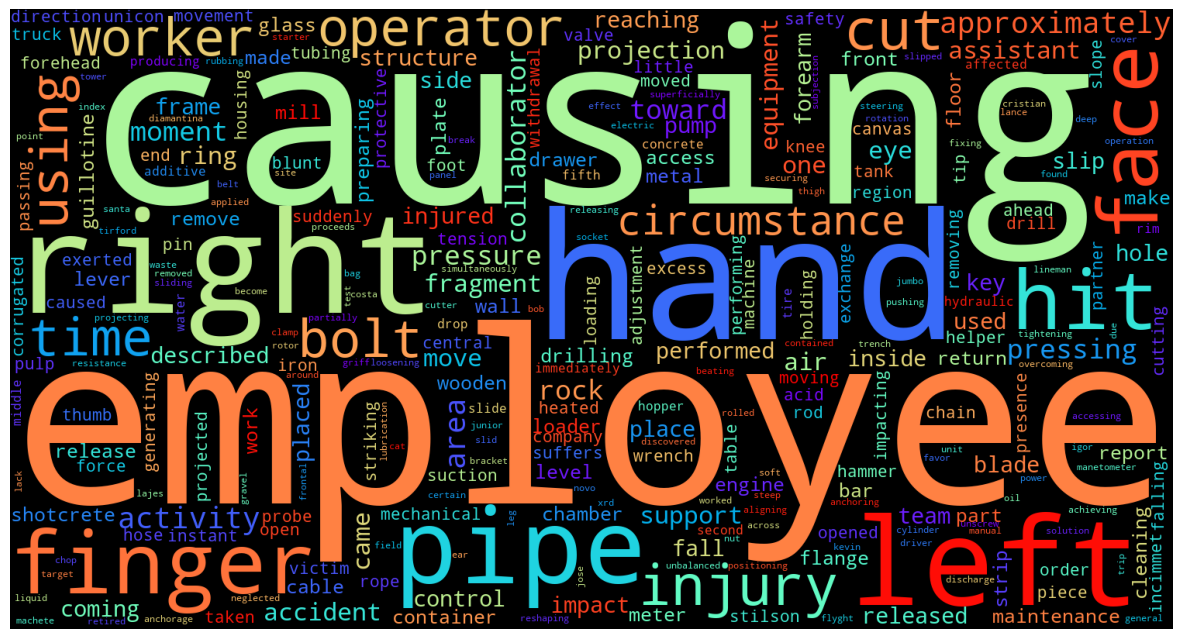

In [ ]:
word_could_accident_level(accident_df[accident_df['Accident Level'] == 'II']['Description_processed'])

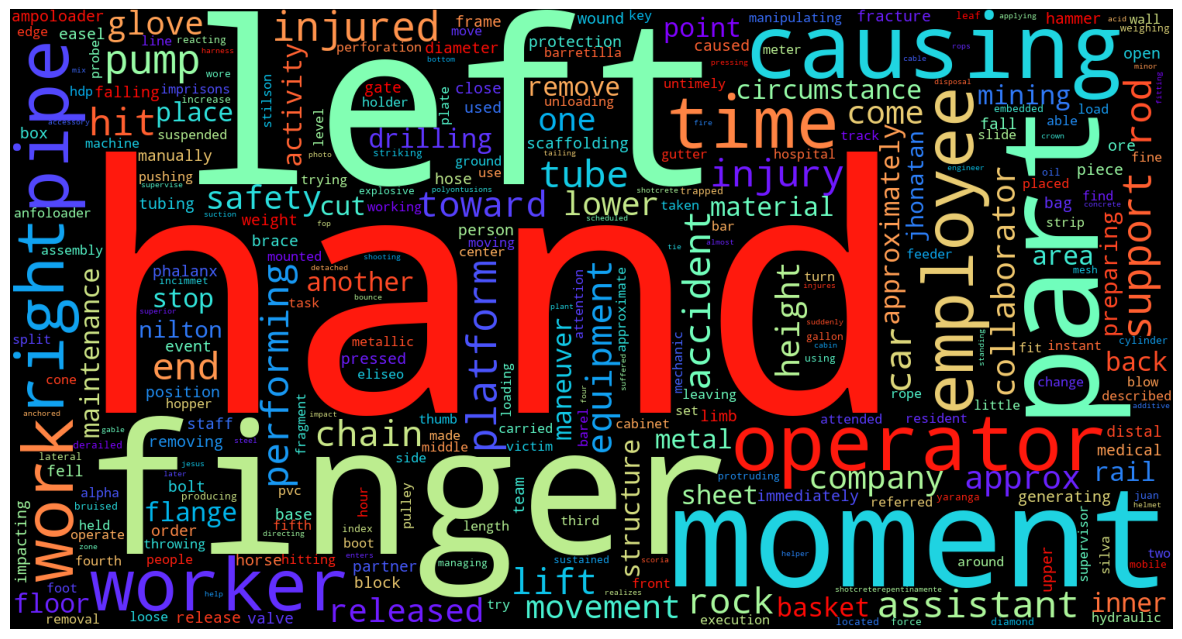

In [ ]:
word_could_accident_level(accident_df[accident_df['Accident Level'] == 'III']['Description_processed'])

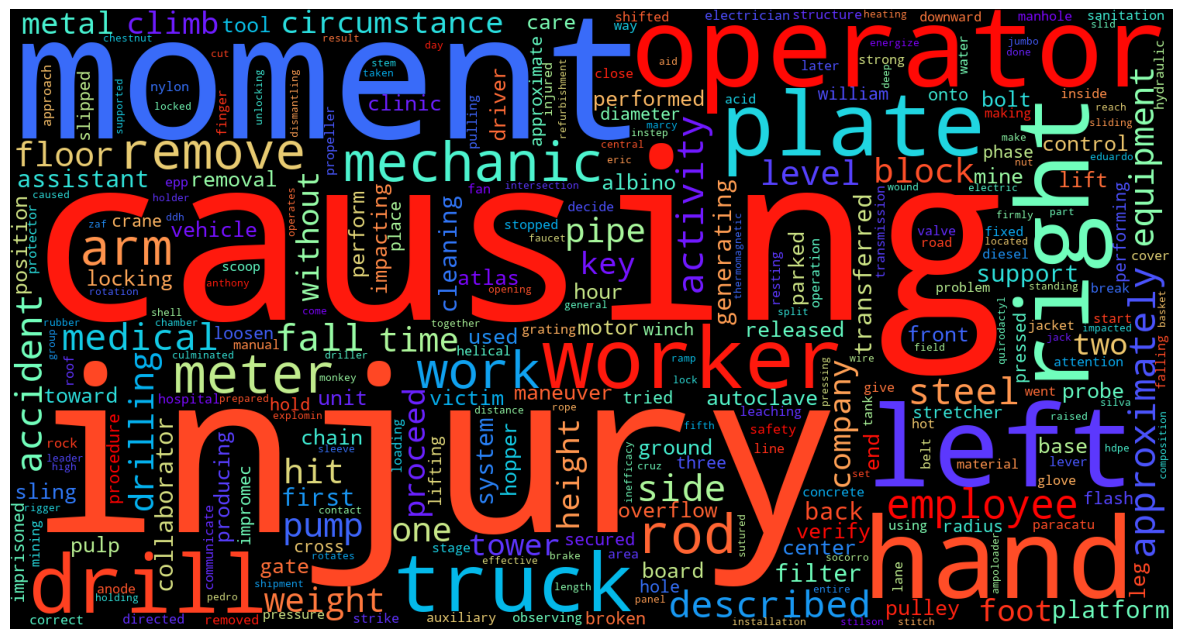

In [ ]:
word_could_accident_level(accident_df[accident_df['Accident Level'] == 'IV']['Description_processed'])

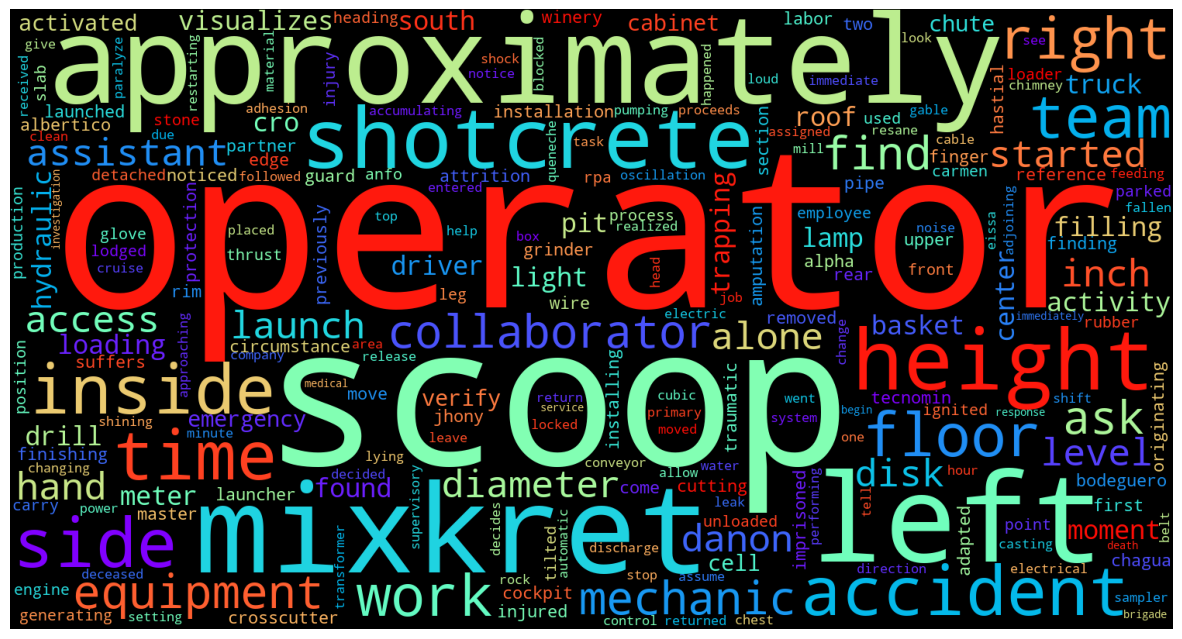

In [ ]:
word_could_accident_level(accident_df[accident_df['Accident Level'] == 'V']['Description_processed'])

Observations

There are many body-related, employee related, movement-related, equipment-related and accident-related words.

- Body-related: left, right, hand, finger, face, foot and glove
- Employee-related: employee, operator, collaborator, assistant, worker and mechanic
- Movement-related: fall, hit, lift and slip
- Equipment-related: equipment, pump, meter, drill, truck and tube
- Accident-related: accident, activity, safety, injury, causing

### Feature Engineering

In [ ]:
dataframe = pd.DataFrame()

dataframe['labels'] = accident_df.apply(lambda x:[x['Country'], x['Local'], x['Industry Sector'],
       x['Accident Level'],x['Gender'],x['Year']],axis=1)
dataframe['Description'] = accident_df['Description']

In [ ]:
#label count
label_count = {}
for labels in dataframe.labels:
  for label in labels:
    if label in label_count:
      label_count[label] += 1
    else:
      label_count[label] = 1 

In [ ]:
x1 = dataframe['Description'].values
y1 = dataframe['labels'].values

In [ ]:
#spliting the data
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=0.20,random_state=42)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
#convert to vectors and arrays
vectorizer = CountVectorizer(binary=True,ngram_range=(1,2))
x_train_vect1 = vectorizer.fit_transform(x1_train)
x_test_vect1 = vectorizer.transform(x1_test)

In [ ]:
x_train_vect1.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
#multilabels
multi = MultiLabelBinarizer(classes=list(label_count.keys()))
y1_train = multi.fit_transform(y1_train)
y1_test = multi.transform(y1_test)

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
clf = LogisticRegression(solver='lbfgs')
clf = OneVsRestClassifier(clf)

In [ ]:
clf.fit(x_train_vect1,y1_train)

OneVsRestClassifier(estimator=LogisticRegression())

In [ ]:
predicted_labels = clf.predict(x_test_vect1)
predicted_scores = clf.decision_function(x_test_vect1)

In [ ]:
pred_inversed = multi.inverse_transform(predicted_labels)
y_test_inversed = multi.inverse_transform(y1_test)

In [ ]:
for i in range(5):
  print(f'Title:\t {x1_test[i]}\n\n', f'True Label:\t {(y_test_inversed[i])}\n\n', f'Predicted Label:\t {(pred_inversed[i])}\n')
  print("---------------*-------------------------")

Title:	 Performing carpentry work, the collaborator hit the second finger of the left hand with the hammer, which he held with his right hand, causing a bruise at the height of the nail. The evaluation was carried out at the medical center of the unit, the final diagnosis being contusion on the finger.

 True Label:	 ('Country_01', 'I', 'Male', 'Metals', 'Local_06', 2017)

 Predicted Label:	 ('Country_01', 'I', 'Male', 2016, 'Metals')

---------------*-------------------------
Title:	 During the maintenance of the peristaltic pump 02BP0166 to change the internal hose, the rupture tubing of the reserve pump 02BP0167 was disrupted, after it started to operate, designing solution heated towards the employee, reaching his left forearm, causing a burn .

 True Label:	 ('Male', 'Country_02', 'Local_05', 'Metals', 'III', 2017)

 Predicted Label:	 ('I', 'Male', 'Country_02', 'Local_05', 'Metals', 2017)

---------------*-------------------------
Title:	 Being 10:20 hours on 05/18/2017; At the e

In [ ]:
from sklearn.metrics import accuracy_score,f1_score,average_precision_score,recall_score,roc_auc_score
data = {'Accuracy score': [accuracy_score(y1_test, predicted_labels)],'F1 score ' : [f1_score(y1_test, predicted_labels, average='micro')],
              'Average precision score' : [average_precision_score(y1_test, predicted_labels, average='micro')],
              'Average recall score' : [recall_score(y1_test, predicted_labels, average='micro')]}
final_result = pd.DataFrame(data)

In [ ]:
final_result

Accuracy score  F1 score   Average precision score  Average recall score
0        0.119048   0.759957                  0.64832              0.700397

#### Variable Creation - Word2Vec Embeddings

In [ ]:
import gensim
print(gensim.__version__)

4.2.0


In [ ]:
from gensim.models import Word2Vec
# define training data
sentences = accident_df['Description_processed']

# train model
model = Word2Vec(sentences, min_count=1)

# summarize the loaded model
print(model)

# summarize vocabulary
words = list(model.wv.index_to_key)
print(words)

# save model
model.save('model.bin')

# load model
new_model = Word2Vec.load('model.bin')
print(new_model)


Word2Vec<vocab=35, vector_size=100, alpha=0.025>
[' ', 'e', 'i', 'r', 't', 'a', 'n', 'o', 'l', 'c', 's', 'd', 'p', 'm', 'g', 'u', 'h', 'f', 'y', 'b', 'v', 'k', 'w', 'j', 'x', 'q', 'z', 'á', 'é', 'ã', 'ó', 'â', 'í', 'ô', 'ú']
Word2Vec<vocab=35, vector_size=100, alpha=0.025>


#### Variable Creation - Glove Word Embeddings

In [ ]:
embeddings_index = {}
# EMBEDDING_FILE = '/content/drive/MyDrive/glove.6B.300d.txt'
EMBEDDING_FILE = 'glove.6B.300d.txt'
f = open(EMBEDDING_FILE,encoding="utf8")
for line in tqdm(f):
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

400000it [00:26, 15184.74it/s]

Found 400000 word vectors.


In [ ]:
# this function creates a normalized vector for the whole sentence
def sent2vec(s):
    words = str(s).lower()
    words = word_tokenize(words)
    words = [w for w in words if not w in STOPWORDS]
    words = [w for w in words if w.isalpha()]
    M = []
    for w in words:
        try:
            M.append(embeddings_index[w])
        except:
            continue
    M = np.array(M)
    v = M.sum(axis=0)
    if type(v) != np.ndarray:
        return np.zeros(300)
    return v / np.sqrt((v ** 2).sum())

In [ ]:
# create sentence GLOVE embeddings vectors using the above function for training and validation set
ind_glove_df = [sent2vec(x) for x in tqdm(accident_df['Description_processed'])]

100%|██████████| 418/418 [00:00<00:00, 5009.64it/s]


In [ ]:
ind_glove_df[0]

array([ 2.38405149e-02,  2.70318054e-02, -8.06759764e-03, -1.09458193e-01,
       -5.82381412e-02, -2.49864943e-02,  4.60234620e-02, -1.49204880e-02,
        6.55298773e-03, -3.74757499e-01, -5.66808023e-02,  4.65764739e-02,
        7.79053867e-02, -2.99258251e-02, -1.09743038e-02,  7.29095638e-02,
        7.68552953e-03, -5.05987853e-02, -3.89833003e-02,  3.59689887e-03,
        1.83535032e-02,  3.30628268e-02,  3.12667489e-02,  6.31839037e-03,
       -4.63274866e-02,  1.31993266e-02, -1.34015158e-02,  7.20757572e-03,
       -1.35609983e-02,  2.45877188e-02,  3.28098685e-02,  4.76174913e-02,
        3.97038758e-02,  2.29109917e-02, -1.74969807e-01,  1.07181787e-01,
        6.85066124e-03, -1.02387452e-02, -2.94499728e-03,  5.40567227e-02,
       -8.34603757e-02,  7.54245296e-02, -1.51561713e-02, -7.05425367e-02,
        5.25999581e-03, -1.91769265e-02,  3.68377417e-02,  1.38776517e-02,
        3.78131797e-03,  2.61196052e-03,  2.31859293e-02,  3.94606590e-03,
        3.27375834e-03,  

#### Variable Creation - TFIDF Features

In [ ]:
ind_tfidf_df = pd.DataFrame()
for i in [1,2,3]:
    vec_tfidf = TfidfVectorizer(max_features=10, norm='l2', stop_words='english', lowercase=True, use_idf=True, ngram_range=(i,i))
    X = vec_tfidf.fit_transform(accident_df['Description_processed']).toarray()
    tfs = pd.DataFrame(X, columns=["TFIDF_" + n for n in vec_tfidf.get_feature_names()])
    ind_tfidf_df = pd.concat([ind_tfidf_df.reset_index(drop=True), tfs.reset_index(drop=True)], axis=1)

ind_tfidf_df.head(3)

TFIDF_activity  TFIDF_causing  TFIDF_employee  TFIDF_hand  TFIDF_injury  \
0             0.0       0.000000             0.0    0.644279      0.000000   
1             0.0       0.000000             0.0    0.000000      0.000000   
2             0.0       0.466839             0.0    0.488842      0.548519   

   TFIDF_left  TFIDF_moment  TFIDF_operator  TFIDF_right  TFIDF_time  ...  \
0     0.00000      0.764791             0.0          0.0         0.0  ...   
1     0.00000      0.000000             0.0          0.0         0.0  ...   
2     0.49216      0.000000             0.0          0.0         0.0  ...   

   TFIDF_causing injury described  TFIDF_described time accident  \
0                             0.0                            0.0   
1                             0.0                            0.0   
2                             0.0                            0.0   

   TFIDF_finger left hand  TFIDF_finger right hand  \
0                     0.0                      0.0   
1                     0.0                      0.0   
2                     0.0                      0.0   

   TFIDF_generating described injury  TFIDF_hand causing injury  \
0                                0.0                        0.0   
1                                0.0                        0.0   
2                                0.0                        0.0   

   TFIDF_injury time accident  TFIDF_right hand causing  \
0                         0.0                       0.0   
1                         0.0                       0.0   
2                         0.0                       0.0   

   TFIDF_time accident employee  TFIDF_time accident worker  
0                           0.0                         0.0  
1                           0.0                         0.0  
2                           0.0                         0.0  

[3 rows x 30 columns]

#### Variable Creation - Label Encoding

In [ ]:
# To replace white space everywhere in Employee type
accident_df['Employee type'] = accident_df['Employee type'].str.replace(' ', '_')
accident_df['Employee type'].value_counts()

Third_Party             185
Employee                178
Third_Party_(Remote)     55
Name: Employee type, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Create Industry DataFrame
ind_featenc_df = pd.DataFrame()

# Label encoding
accident_df['Season'] = accident_df['Season'].replace('Summer', 'aSummer').replace('Autumn', 'bAutumn').replace('Winter', 'cWinter').replace('Spring', 'dSpring')
ind_featenc_df['Season'] = LabelEncoder().fit_transform(accident_df['Season']).astype(np.int8)

accident_df['Weekday'] = accident_df['Weekday'].replace('Monday', 'aMonday').replace('Tuesday', 'bTuesday').replace('Wednesday', 'cWednesday').replace('Thursday', 'dThursday').replace('Friday', 'eFriday').replace('Saturday', 'fSaturday').replace('Sunday', 'gSunday')
ind_featenc_df['Weekday'] = LabelEncoder().fit_transform(accident_df['Weekday']).astype(np.int8)

ind_featenc_df['Accident Level'] = LabelEncoder().fit_transform(accident_df['Accident Level']).astype(np.int8)
ind_featenc_df['Potential Accident Level'] = LabelEncoder().fit_transform(accident_df['Potential Accident Level']).astype(np.int8)

In [ ]:
from keras.utils import np_utils
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(ind_featenc_df['Accident Level'])
dummy_y

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
# Dummy variables encoding
Country_dummies = pd.get_dummies(accident_df['Country'], columns=["Country"], drop_first=True)
Local_dummies = pd.get_dummies(accident_df['Local'], columns=["Local"], drop_first=True)
Gender_dummies = pd.get_dummies(accident_df['Gender'], columns=["Gender"], drop_first=True)
IS_dummies = pd.get_dummies(accident_df['Industry Sector'], columns=['Industry Sector'], prefix='IS', drop_first=True)
EmpType_dummies = pd.get_dummies(accident_df['Employee type'], columns=['Employee type'], prefix='EmpType', drop_first=True)
CR_dummies = pd.get_dummies(accident_df['Critical Risk'], columns=['Critical Risk'], prefix='CR', drop_first=True)

# Merge the above dataframe with the original dataframe ind_feat_df
ind_featenc_df = ind_featenc_df.join(Country_dummies.reset_index(drop=True)).join(Local_dummies.reset_index(drop=True)).join(Gender_dummies.reset_index(drop=True)).join(IS_dummies.reset_index(drop=True)).join(EmpType_dummies.reset_index(drop=True)).join(CR_dummies.reset_index(drop=True))

ind_featenc_df = accident_df[['Year','Month','Day','WeekofYear']].reset_index(drop=True).join(ind_featenc_df.reset_index(drop=True))

ind_featenc_df.head(3)

Year  Month  Day  WeekofYear  Season  Weekday  Accident Level  \
0  2016      1    1          53       0        4               0   
1  2016      1    2          53       0        5               0   
2  2016      1    6           1       0        2               0   

   Potential Accident Level  Country_02  Country_03  ...  CR_Projection  \
0                         3           0           0  ...              0   
1                         3           1           0  ...              0   
2                         2           0           0  ...              0   

   CR_Projection of fragments  CR_Projection/Burning  CR_Projection/Choco  \
0                           0                      0                    0   
1                           0                      0                    0   
2                           0                      0                    0   

   CR_Projection/Manual Tools  CR_Suspended Loads  CR_Traffic  \
0                           0                   0           0   
1                           0                   0           0   
2                           0                   0           0   

   CR_Vehicles and Mobile Equipment  CR_Venomous Animals  CR_remains of choco  
0                                 0                    0                    0  
1                                 0                    0                    0  
2                                 0                    0                    0  

[3 rows x 58 columns]

In [ ]:
# Check NaN values
np.any(np.isnan(ind_featenc_df))

False

#### Combine Glove and Encoded Features

In [ ]:
# Consider only top 30 GLOVE features
ind_feat_df = ind_featenc_df.join(pd.DataFrame(ind_glove_df).iloc[:,0:30].reset_index(drop=True))

In [ ]:
ind_feat_df.head(3)

Year  Month  Day  WeekofYear  Season  Weekday  Accident Level  \
0  2016      1    1          53       0        4               0   
1  2016      1    2          53       0        5               0   
2  2016      1    6           1       0        2               0   

   Potential Accident Level  Country_02  Country_03  ...        20        21  \
0                         3           0           0  ...  0.018354  0.033063   
1                         3           1           0  ... -0.051012 -0.077696   
2                         2           0           0  ... -0.016709  0.018799   

         22        23        24        25        26        27        28  \
0  0.031267  0.006318 -0.046327  0.013199 -0.013402  0.007208 -0.013561   
1 -0.018080  0.082402 -0.059146  0.028803  0.013410  0.036418 -0.059872   
2  0.011485 -0.011451 -0.059859  0.013748 -0.024364 -0.053737  0.028529   

         29  
0  0.024588  
1 -0.033589  
2  0.055350  

[3 rows x 88 columns]

#### Combine TFIDF and Encoded Features

In [ ]:
# Consider only top 30 GLOVE features
ind_feat_df = ind_featenc_df.join(ind_tfidf_df.reset_index(drop=True))

In [ ]:
ind_feat_df.head(3)

Year  Month  Day  WeekofYear  Season  Weekday  Accident Level  \
0  2016      1    1          53       0        4               0   
1  2016      1    2          53       0        5               0   
2  2016      1    6           1       0        2               0   

   Potential Accident Level  Country_02  Country_03  ...  \
0                         3           0           0  ...   
1                         3           1           0  ...   
2                         2           0           0  ...   

   TFIDF_causing injury described  TFIDF_described time accident  \
0                             0.0                            0.0   
1                             0.0                            0.0   
2                             0.0                            0.0   

   TFIDF_finger left hand  TFIDF_finger right hand  \
0                     0.0                      0.0   
1                     0.0                      0.0   
2                     0.0                      0.0   

   TFIDF_generating described injury  TFIDF_hand causing injury  \
0                                0.0                        0.0   
1                                0.0                        0.0   
2                                0.0                        0.0   

   TFIDF_injury time accident  TFIDF_right hand causing  \
0                         0.0                       0.0   
1                         0.0                       0.0   
2                         0.0                       0.0   

   TFIDF_time accident employee  TFIDF_time accident worker  
0                           0.0                         0.0  
1                           0.0                         0.0  
2                           0.0                         0.0  

[3 rows x 88 columns]

In [ ]:
ind_feat_df.columns

Index(['Year', 'Month', 'Day', 'WeekofYear', 'Season', 'Weekday',
       'Accident Level', 'Potential Accident Level', 'Country_02',
       'Country_03', 'Local_02', 'Local_03', 'Local_04', 'Local_05',
       'Local_06', 'Local_07', 'Local_08', 'Local_09', 'Local_10', 'Local_11',
       'Local_12', 'Male', 'IS_Mining', 'IS_Others', 'EmpType_Third_Party',
       'EmpType_Third_Party_(Remote)', 'CR_Bees',
       'CR_Blocking and isolation of energies', 'CR_Burn',
       'CR_Chemical substances', 'CR_Confined space', 'CR_Cut',
       'CR_Electrical Shock', 'CR_Electrical installation', 'CR_Fall',
       'CR_Fall prevention', 'CR_Fall prevention (same level)',
       'CR_Individual protection equipment', 'CR_Liquid Metal',
       'CR_Machine Protection', 'CR_Manual Tools', 'CR_Others', 'CR_Plates',
       'CR_Poll', 'CR_Power lock', 'CR_Pressed', 'CR_Pressurized Systems',
       'CR_Pressurized Systems / Chemical Substances', 'CR_Projection',
       'CR_Projection of fragments', 'CR_Projec

#### Sampling Techniques - Create Training and Test Set

In [ ]:
# ind_feat_df.to_csv("/content/drive/MyDrive/CSV/New.csv")

In [ ]:
X = ind_feat_df.drop(['Accident Level','Potential Accident Level'], axis = 1) # Considering all Predictors
y = ind_feat_df['Accident Level']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1, stratify = y)

In [ ]:
X_train, X_test, y_train_dummy, y_test_dummy = train_test_split(X, dummy_y, test_size = 0.20, random_state = 1, stratify = y)

In [ ]:
print('X_train shape : ({0},{1})'.format(X_train.shape[0], X_train.shape[1]))
print('y_train shape : ({0},)'.format(y_train.shape[0]))
print('X_test shape : ({0},{1})'.format(X_test.shape[0], X_test.shape[1]))
print('y_test shape : ({0},)'.format(y_test.shape[0]))

X_train shape : (334,86)
y_train shape : (334,)
X_test shape : (84,86)
y_test shape : (84,)


#### Resampling Techniques — Oversample minority class

In [ ]:
# Display old accident level counts
ind_feat_df['Accident Level'].value_counts()

0    309
1     40
2     31
3     30
4      8
Name: Accident Level, dtype: int64

In [ ]:
# Concatenate our training data back together
X_up = pd.concat([X_train, y_train], axis=1)

# Get the majority and minority class
acclevel_0_majority = X_up[X_up['Accident Level'] == 0]
acclevel_1_minority = X_up[X_up['Accident Level'] == 1]
acclevel_2_minority = X_up[X_up['Accident Level'] == 2]
acclevel_3_minority = X_up[X_up['Accident Level'] == 3]
acclevel_4_minority = X_up[X_up['Accident Level'] == 4]

# Upsample Level1 minority class
acclevel_1_minority_upsampled = resample(acclevel_1_minority,
                                replace = True, # sample with replacement
                                n_samples = len(acclevel_0_majority), # to match majority class
                                random_state = 1)

# Upsample Level2 minority class
acclevel_2_minority_upsampled = resample(acclevel_2_minority,
                                replace = True, # sample with replacement
                                n_samples = len(acclevel_0_majority), # to match majority class
                                random_state = 1)

# Upsample Level3 minority class
acclevel_3_minority_upsampled = resample(acclevel_3_minority,
                                replace = True, # sample with replacement
                                n_samples = len(acclevel_0_majority), # to match majority class
                                random_state = 1)

# Upsample Level4 minority class
acclevel_4_minority_upsampled = resample(acclevel_4_minority,
                                replace = True, # sample with replacement
                                n_samples = len(acclevel_0_majority), # to match majority class
                                random_state = 1)

In [ ]:
# Combine majority class with upsampled minority classes
df_upsampled = pd.concat([acclevel_0_majority, acclevel_1_minority_upsampled, acclevel_2_minority_upsampled, acclevel_3_minority_upsampled, 
                          acclevel_4_minority_upsampled])

In [ ]:
# Display new accident level counts
df_upsampled['Accident Level'].value_counts()

0    247
1    247
2    247
3    247
4    247
Name: Accident Level, dtype: int64

In [ ]:
# Separate input features and target
X_train_up = df_upsampled.drop(['Accident Level'], axis = 1) # Considering all Predictors
y_train_up = df_upsampled['Accident Level']

#### SMOTE - Generate synthetic samples - upsample smaller class

In [ ]:
sm = SMOTE(random_state=1)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
df_smote = pd.concat([pd.DataFrame(X_train_smote), pd.DataFrame(y_train_smote)], axis=1)
df_smote.columns = ['Year', 'Month', 'Day',
        'WeekofYear', 'Season', 'Weekday',
       'Country_02', 'Country_03', 'Local_02', 'Local_03', 'Local_04',
       'Local_05', 'Local_06', 'Local_07', 'Local_08', 'Local_09', 'Local_10',
       'Local_11', 'Local_12', 'Male', 'IS_Mining', 'IS_Others',
       'EmpType_Third_Party', 'EmpType_Third_Party_(Remote)',
       'CR_Blocking_and_isolation_of_energies', 'CR_Burn',
       'CR_Chemical_substances', 'CR_Confined_space', 'CR_Cut',
       'CR_Electrical_Shock', 'CR_Electrical_installation', 'CR_Fall',
       'CR_Fall_prevention', 'CR_Fall_prevention_(same_level)',
       'CR_Individual_protection_equipment', 'CR_Liquid_Metal',
       'CR_Machine_Protection', 'CR_Manual_Tools', 'CR_Not_applicable',
       'CR_Others', 'CR_Plates', 'CR_Poll', 'CR_Power_lock', 'CR_Pressed',
       'CR_Pressurized_Systems',
       'CR_Pressurized_Systems_/_Chemical_Substances', 'CR_Projection',
       'CR_Projection/Burning', 'CR_Projection/Choco',
       'CR_Projection/Manual_Tools', 'CR_Projection_of_fragments',
       'CR_Suspended_Loads', 'CR_Traffic', 'CR_Vehicles_and_Mobile_Equipment',
       'CR_Venomous_Animals', 'CR_remains_of_choco', 'TFIDF_activity', 'TFIDF_area',
       'TFIDF_causing', 'TFIDF_employee', 'TFIDF_hand', 'TFIDF_injury',
       'TFIDF_left', 'TFIDF_operator', 'TFIDF_right', 'TFIDF_time',
       'TFIDF_causing injury', 'TFIDF_described injury',
       'TFIDF_employee reports', 'TFIDF_finger left', 'TFIDF_injury described',
       'TFIDF_left foot', 'TFIDF_left hand', 'TFIDF_medical center',
       'TFIDF_right hand', 'TFIDF_time accident',
       'TFIDF_causing injury described', 'TFIDF_described time accident',
       'TFIDF_finger left hand', 'TFIDF_finger right hand',
       'TFIDF_generating described injury', 'TFIDF_hand causing injury',
       'TFIDF_injury time accident', 'TFIDF_left hand causing',
       'TFIDF_right hand causing', 'TFIDF_time accident employee', 'Accident Level']

In [ ]:
# Separate input features and target
X_train_smote = df_smote.iloc[:,:-1] # Considering all Predictors
y_train_smote = df_smote.iloc[:,-1:]

In [ ]:
X_train_smote.head(1)

Year  Month  Day  WeekofYear  Season  Weekday  Country_02  Country_03  \
0  2016      9    1          35       3        3           1           0   

   Local_02  Local_03  ...  TFIDF_causing injury described  \
0         0         0  ...                             0.0   

   TFIDF_described time accident  TFIDF_finger left hand  \
0                            0.0                     0.0   

   TFIDF_finger right hand  TFIDF_generating described injury  \
0                      0.0                                0.0   

   TFIDF_hand causing injury  TFIDF_injury time accident  \
0                        0.0                         0.0   

   TFIDF_left hand causing  TFIDF_right hand causing  \
0                      0.0                       0.0   

   TFIDF_time accident employee  
0                           0.0  

[1 rows x 86 columns]

In [ ]:
# Display new accident level counts
y_train_smote['Accident Level'].value_counts()

1    247
0    247
3    247
2    247
4    247
Name: Accident Level, dtype: int64

In [ ]:
# convert integers to dummy variables (i.e. one hot encoded)
y_train_smote_dummy = np_utils.to_categorical(y_train_smote['Accident Level'])
y_train_smote_dummy

array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

#### Varible Tansformation (Normalization and Scaling)

In [ ]:
from sklearn.preprocessing import StandardScaler
# Transform independent features
scaler_X = StandardScaler()#StandardScaler()
pipeline = Pipeline(steps=[('s', scaler_X)])
X_train.iloc[:,:6] = pipeline.fit_transform(X_train.iloc[:,:6]) # Scaling only first 6 feautres

X_test.iloc[:,:6] = pipeline.fit_transform(X_test.iloc[:,:6]) # Scaling only first 6 feautres

In [ ]:
X_train.head(3)

Year     Month       Day  WeekofYear    Season   Weekday  Country_02  \
202 -0.700765  1.168926 -1.673853    0.996914  1.728348  0.075496           1   
258 -0.700765  1.802213  1.559083    1.934247  1.728348 -0.997510           1   
6   -0.700765 -1.364221  0.058077   -1.382469 -1.221916  1.148501           1   

     Country_03  Local_02  Local_03  ...  TFIDF_causing injury described  \
202           0         0         0  ...                             0.0   
258           0         0         0  ...                             0.0   
6             0         0         0  ...                             0.0   

     TFIDF_described time accident  TFIDF_finger left hand  \
202                            0.0                     0.0   
258                            0.0                     0.0   
6                              0.0                     0.0   

     TFIDF_finger right hand  TFIDF_generating described injury  \
202                      0.0                                0.0   
258                      0.0                                0.0   
6                        0.0                                0.0   

     TFIDF_hand causing injury  TFIDF_injury time accident  \
202                        0.0                         0.0   
258                        0.0                         0.0   
6                          0.0                         0.0   

     TFIDF_right hand causing  TFIDF_time accident employee  \
202                       0.0                           0.0   
258                       0.0                           0.0   
6                         0.0                           0.0   

     TFIDF_time accident worker  
202                         0.0  
258                         0.0  
6                           0.0  

[3 rows x 86 columns]

#### Use PCA - Extract Principal Components that capture about 95% of the variance in the data

In [ ]:
# generating the covariance matrix and the eigen values for the PCA analysis
cov_matrix = np.cov(X_train.T) # the relevanat covariance matrix
print('Covariance Matrix \n%s', cov_matrix)

#generating the eigen values and the eigen vectors
e_vals, e_vecs = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)

Covariance Matrix 
%s [[ 1.00300300e+00 -4.24727770e-01  2.53271550e-02 ... -4.92231700e-03
  -6.77441561e-03 -1.10058098e-02]
 [-4.24727770e-01  1.00300300e+00  2.68776694e-02 ...  4.65263089e-03
   7.75024088e-03 -7.80376289e-03]
 [ 2.53271550e-02  2.68776694e-02  1.00300300e+00 ... -5.10013545e-03
  -1.70859863e-03 -9.24939263e-04]
 ...
 [-4.92231700e-03  4.65263089e-03 -5.10013545e-03 ...  5.66445285e-03
  -1.31557331e-04 -1.09987842e-04]
 [-6.77441561e-03  7.75024088e-03 -1.70859863e-03 ... -1.31557331e-04
   1.70961693e-02 -2.94149068e-04]
 [-1.10058098e-02 -7.80376289e-03 -9.24939263e-04 ... -1.09987842e-04
  -2.94149068e-04  1.37437972e-02]]
Eigenvectors 
[[-3.52873866e-01 -9.50329415e-03 -2.45620839e-01 ...  9.70900963e-17
  -2.77462651e-16  0.00000000e+00]
 [ 5.64472396e-01  1.95794154e-02 -1.71080036e-02 ...  2.24283978e-17
   1.55017525e-15  0.00000000e+00]
 [ 2.63748460e-02  6.16337871e-01 -7.47487499e-01 ...  1.56691718e-16
   3.55226649e-17  0.00000000e+00]
 ...
 [ 3.421

In [ ]:
# the "cumulative variance explained" analysis 
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 28.95075293  40.24095462  50.20175168  58.17008386  63.97292788
  68.92720265  73.04919524  75.44349783  77.32376644  79.14749991
  80.66302171  82.04489372  83.28595697  84.46306715  85.4709604
  86.39925652  87.26737942  88.06266131  88.79056142  89.46567588
  90.05772722  90.64295278  91.21139764  91.7379819   92.2286249
  92.6608568   93.05197879  93.41461223  93.77272187  94.12424765
  94.45480701  94.76130804  95.05514096  95.32962184  95.59823206
  95.84772827  96.08580675  96.31196049  96.52057794  96.71972068
  96.91623915  97.10268136  97.27727863  97.44318023  97.60359261
  97.76127902  97.91349526  98.05852911  98.19475495  98.32563633
  98.45316477  98.57795628  98.69500822  98.79994002  98.89249141
  98.97939319  99.06342419  99.1428459   99.21460218  99.28401402
  99.35005725  99.41110823  99.46513936  99.51775213  99.5692974
  99.61739032  99.65987478  99.69437627  99.72841126  99.75829655
  99.78783444  99.81655819  99.84449908  99.87029

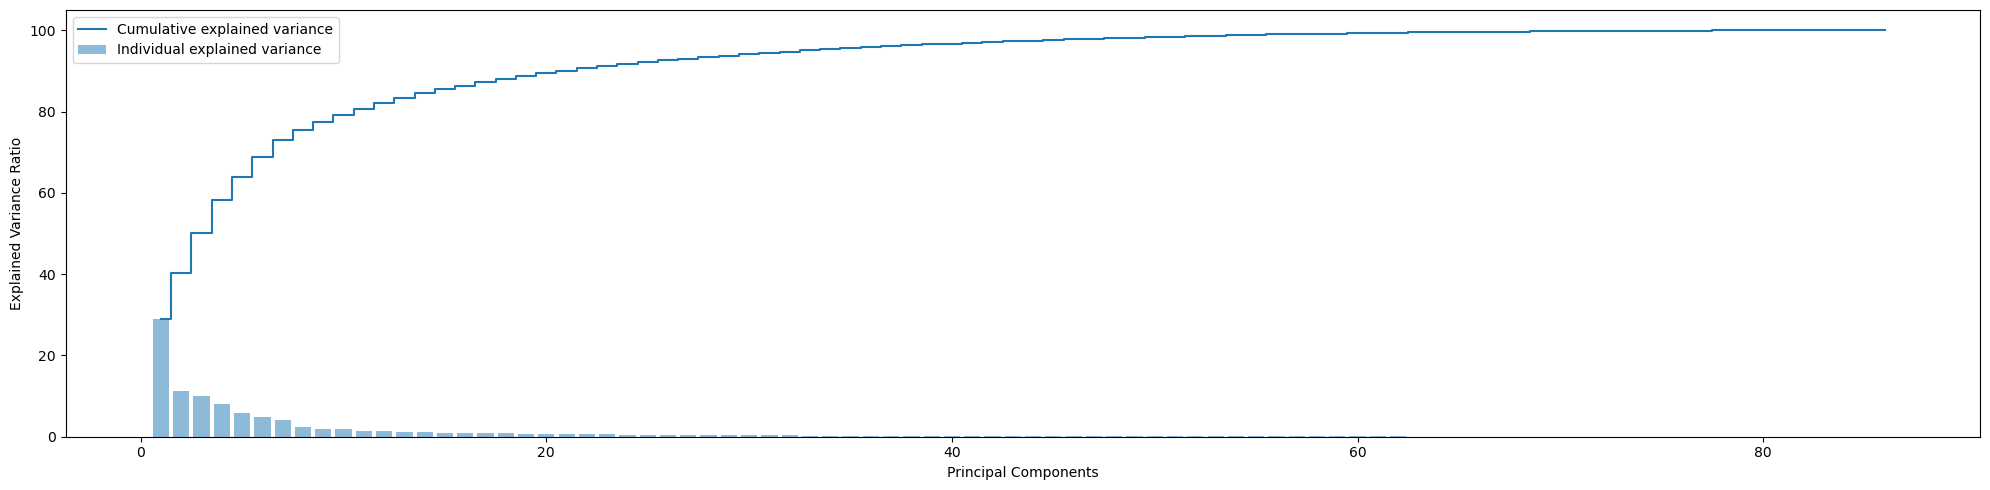

In [ ]:
# Plotting the variance expalained by the principal components and the cumulative variance explained.
plt.figure(figsize=(20 , 5))
plt.bar(range(1, e_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [ ]:
# Capturing 90% variance of the data
pca = PCA(n_components = 0.90)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

In [ ]:
print(X_train_reduced.shape)
print(X_test_reduced.shape)

(334, 21)
(84, 21)


#### Design, train and test basic machine learning classifiers

Inorder to show how misleading accuracy can be, we are using a Dummy Classifier to predict all accident levels.

In [ ]:
# DummyClassifier to predict all Accident levels
dummy = DummyClassifier(strategy='stratified').fit(X_train, y_train)
dummy_pred = dummy.predict(X_test)

# checking unique labels
print('Unique predicted labels: ', (np.unique(dummy_pred)))

# checking accuracy
print('Test score: ', accuracy_score(y_test, dummy_pred))

Unique predicted labels:  [0 1 2 3 4]
Test score:  0.5


In [ ]:
# Checking unique values
predictions = pd.DataFrame(dummy_pred)
predictions[0].value_counts()

0    55
1    11
2     9
3     7
4     2
Name: 0, dtype: int64

#### Define MultiClass-Logloss

In [ ]:
def multiclass_logloss(actual, predicted, eps=1e-15):
    """Multi class version of Logarithmic Loss metric.
    :param actual: Array containing the actual target classes
    :param predicted: Matrix with class predictions, one probability per class
    """
    # Convert 'actual' to a binary array if it's not already:
    if len(actual.shape) == 1:
        actual2 = np.zeros((actual.shape[0], predicted.shape[1]))
        for i, val in enumerate(actual):
            actual2[i, val] = 1
        actual = actual2

    clip = np.clip(predicted, eps, 1 - eps)
    rows = actual.shape[0]
    vsota = np.sum(actual * np.log(clip))
    return -1.0 / rows * vsota

#### Train and test model

In [ ]:
def train_test_model(model, method, X_train, X_test, y_train, y_test, of_type, index, scale, report, save_model,suff=None):
    
    if report == "yes":
        print (model)
        print ("***************************************************************************")

    if method == 'CatBoostClassifier' or method == 'LGBMClassifier':

      model.fit(X_train, y_train) # Fit the model on Training set
    else:
      model.fit(X_train, y_train) # Fit the model on Training set

    from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, precision_score
    
    if of_type == "coef":
        # Intercept and Coefficients
        print("The intercept for our model is {}".format(model.intercept_), "\n")
        
        for idx, col_name in enumerate(X_train.columns):
            print("The coefficient for {} is {}".format(col_name, model.coef_.ravel()[idx]))

    y_pred = model.predict(X_test) # Predict on Test set

    # Initialise mc_logloss
    mc_logloss = 1.00
    if method != 'RidgeClassifier':
      y_predictions = model.predict_proba(X_test)

    train_accuracy_score = model.score(X_train, y_train)
    test_accuracy_score = model.score(X_test, y_test)

    precision_score = precision_score(y_test, y_pred, average='weighted')
    recall_score = recall_score(y_test, y_pred, average='weighted')
    f1_score = f1_score(y_test, y_pred, average='weighted')

    if method != 'RidgeClassifier':
      mc_logloss = multiclass_logloss(y_test, y_predictions, eps=1e-15)

    if report == "yes":
      # Model - Confusion matrix
      model_cm = confusion_matrix(y_test, y_pred)

      sns.heatmap(model_cm, annot=True,  fmt='.2f', xticklabels = ["I", "II", "III", "IV", "V"] , yticklabels = ["I", "II", "III", "IV", "V"] )
      plt.ylabel('Actual')
      plt.xlabel('Predicted')
      plt.show()

      # Model - Classification report
      model_cr = classification_report(y_test, y_pred)
      print(model_cr,str(method)+str(suff))
    if suff == None:
        suff = ' '
    else:
        suff = "_"+suff
    # Store the accuracy results for each model in a dataframe for final comparison
    resultsDf = pd.DataFrame({'Method': method+suff, 'Train Accuracy': train_accuracy_score, 'Test Accuracy': test_accuracy_score, 
                              'Precision': precision_score, 'Recall': recall_score, 'F1-Score': f1_score, 
                              'Multi-Class Logloss': mc_logloss}, index=[index])
    

    # Save the model
    if save_model == "yes":
      filename = 'finalised_model.sav'
      pickle.dump(model, open(filename, 'wb'))
      
    return resultsDf  # return all the metrics along with predictions

#### Train and test all models

In [ ]:
resultsDf= pd.DataFrame()

In [ ]:
import lightgbm as lgb


def train_test_allmodels(X_train_common, X_test_common, y_train, y_test, scale,suff=None):
    print(suff)
    # define classification models
    models=[['LogisticRegression',LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state = 1)],
        ['RidgeClassifier',RidgeClassifier(random_state = 1)],
        #['Lasso',Lasso(random_state = 1)],
        ['KNeighborsClassifier',KNeighborsClassifier(n_neighbors = 3)],
        ['SVC',SVC(kernel = 'rbf', probability=True)],
        ['DecisionTreeClassifier',DecisionTreeClassifier(criterion = 'gini', random_state=1)],
        ['RandomForestClassifier',RandomForestClassifier(n_estimators=10, random_state=1)],
        ['BaggingClassifier',BaggingClassifier(n_estimators=30, max_samples=0.75, random_state=1, oob_score=True)],
        ['ExtraTreesClassifier',ExtraTreesClassifier(n_estimators = 50, criterion='entropy', max_features='auto', min_samples_split=2, 
                                 bootstrap=True, oob_score=True)],
        ['AdaBoostClassifier',AdaBoostClassifier(n_estimators=100, learning_rate=0.25, random_state=1)],
        ['GradientBoostingClassifier',GradientBoostingClassifier(loss='deviance', n_estimators=50, learning_rate=0.1, validation_fraction=0.2, 
                                       random_state=1)],
#         ['CatBoostClassifier',CatBoostClassifier(task_type= 'GPU', loss_function="MultiClass", random_state=1, verbose=0)],
#                                                 #early_stopping_rounds = 30)],
        ['LGBMClassifier',LGBMClassifier(random_state=1, metric = "multi_logloss", objective="multiclass")],
                                         #early_stopping_rounds = 30)],
        ['XGBClassifier',XGBClassifier(min_child_weight = 7, max_depth = 6, objective="multi:softmax", learning_rate = 0.1, gamma = 0.4, 
                                       colsample_bytree = 0.5)]
    ]

    resultsDf_common = pd.DataFrame()
    i = 1
    for name, classifier in models:
        # Train and Test the model
        reg_resultsDf = train_test_model(classifier, name, X_train_common, X_test_common, y_train, y_test, 'none', i, scale, 'no', 'no',suff)

        # Store the accuracy results for each model in a dataframe for final comparison
        resultsDf_common = pd.concat([resultsDf_common, reg_resultsDf])
        i = i + 1
    return resultsDf_common

#### 1. Modelling - Logistic Regression

LogisticRegression(multi_class='multinomial', random_state=1)
***************************************************************************


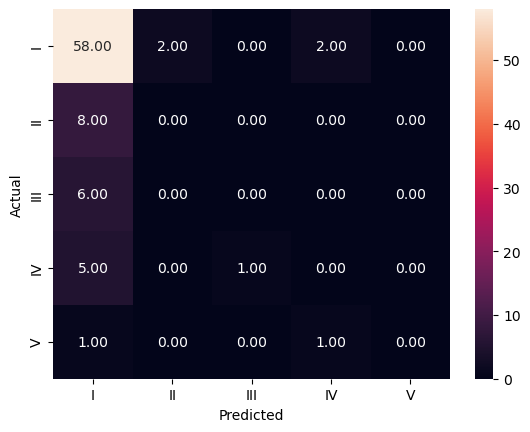

              precision    recall  f1-score   support

           0       0.74      0.94      0.83        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.69        84
   macro avg       0.15      0.19      0.17        84
weighted avg       0.55      0.69      0.61        84
 Logistic Regression without SamplingNone


Method  Train Accuracy  Test Accuracy  \
1  Logistic Regression without Sampling         0.754491       0.690476   

   Precision    Recall  F1-Score  Multi-Class Logloss  
1    0.54884  0.690476  0.611565             0.910722

In [ ]:
# For multiclass problems, only 'newton-cg', 'sag', 'saga' and 'lbfgs' handle multinomial loss; 'liblinear' is limited to one-versus-rest schemes.

resultsDf = pd.DataFrame()

# Building a Linear Regression model
lr = LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state = 1)
                                                     
# Train and Test the model
resultsDf = train_test_model(lr, 'Logistic Regression without Sampling', X_train, X_test, y_train, y_test, 'none', 1, 'no', 'yes', 'no')

# Store the accuracy results for each model in a dataframe for final comparison
resultsDf

#### 2. Decision Tree - Random Forest Classifier

- Decision trees frequently perform well on imbalanced data. They work by learning a hierarchy of if/else questions and this can force both classes to be addressed.

RandomForestClassifier(n_estimators=10, random_state=1)
***************************************************************************


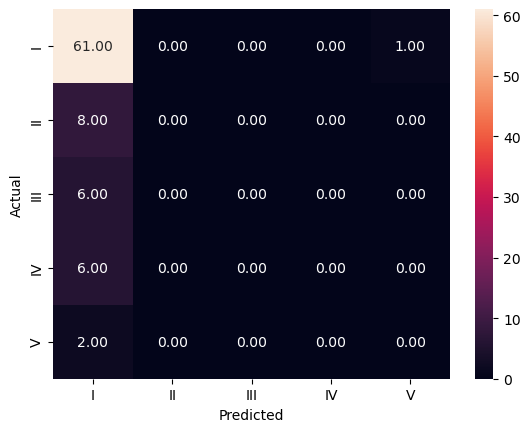

              precision    recall  f1-score   support

           0       0.73      0.98      0.84        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.73        84
   macro avg       0.15      0.20      0.17        84
weighted avg       0.54      0.73      0.62        84
 Random Forest with original dataNone


Method  Train Accuracy  Test Accuracy  \
1  Logistic Regression without Sampling         0.754491       0.690476   
2      Random Forest with original data         0.952096       0.726190   

   Precision    Recall  F1-Score  Multi-Class Logloss  
1   0.548840  0.690476  0.611565             0.910722  
2   0.542456  0.726190  0.621018             3.445314

In [ ]:
# Building a Random Forest Classifier on Training set
rfc_model = RandomForestClassifier(n_estimators=10, random_state=1)

# Train and Test the model
rf_df = train_test_model(rfc_model, 'Random Forest with original data', X_train, X_test, y_train, y_test, 'none', 2, 'no', 'yes', 'no')

#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.concat([resultsDf,rf_df])
resultsDf

#### 3. Modelling - Logistic Regression - Oversampling

LogisticRegression(multi_class='multinomial', random_state=1)
***************************************************************************


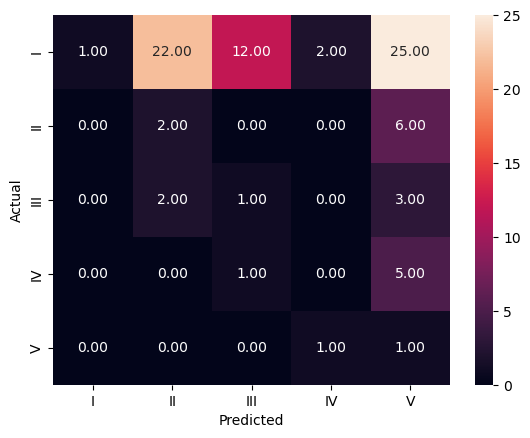

              precision    recall  f1-score   support

           0       1.00      0.02      0.03        62
           1       0.08      0.25      0.12         8
           2       0.07      0.17      0.10         6
           3       0.00      0.00      0.00         6
           4       0.03      0.50      0.05         2

    accuracy                           0.06        84
   macro avg       0.23      0.19      0.06        84
weighted avg       0.75      0.06      0.04        84
 Logistic Regression with SamplingNone


Method  Train Accuracy  Test Accuracy  \
1  Logistic Regression without Sampling         0.754491       0.690476   
2      Random Forest with original data         0.952096       0.726190   
3     Logistic Regression with Sampling         0.361134       0.059524   

   Precision    Recall  F1-Score  Multi-Class Logloss  
1   0.548840  0.690476  0.611565             0.910722  
2   0.542456  0.726190  0.621018             3.445314  
3   0.751119  0.059524  0.042913             1.733659

In [ ]:
# Building a Linear Regression model
lr = LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state = 1)
                                                     
# Train and Test the model
lr_df = train_test_model(lr, 'Logistic Regression with Sampling', X_train_up, X_test, y_train_up, y_test, 'none', 3, 'no', 'yes', 'no')

#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.concat([resultsDf,lr_df])
resultsDf

#### 4. Modelling - Logistic Regression - SMOTE

LogisticRegression(multi_class='multinomial', random_state=1)
***************************************************************************


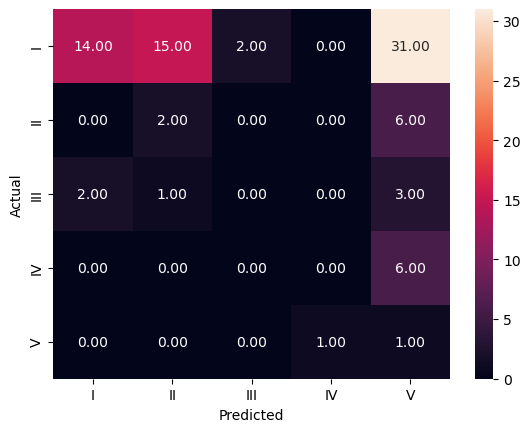

              precision    recall  f1-score   support

           0       0.88      0.23      0.36        62
           1       0.11      0.25      0.15         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.02      0.50      0.04         2

    accuracy                           0.20        84
   macro avg       0.20      0.20      0.11        84
weighted avg       0.66      0.20      0.28        84
 Logistic Regression with SMOTENone


Method  Train Accuracy  Test Accuracy  \
1  Logistic Regression without Sampling         0.754491       0.690476   
2      Random Forest with original data         0.952096       0.726190   
3     Logistic Regression with Sampling         0.361134       0.059524   
4        Logistic Regression with SMOTE         0.439676       0.202381   

   Precision    Recall  F1-Score  Multi-Class Logloss  
1   0.548840  0.690476  0.611565             0.910722  
2   0.542456  0.726190  0.621018             3.445314  
3   0.751119  0.059524  0.042913             1.733659  
4   0.656922  0.202381  0.280581             1.657868

In [ ]:
# Building a Linear Regression model
lr = LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state = 1)
                                                     
# Train and Test the model
lr_smote_df = train_test_model(lr, 'Logistic Regression with SMOTE', X_train_smote, X_test, y_train_smote, y_test, 'none', 4, 'no', 'yes', 'no')

#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.concat([resultsDf,lr_smote_df])
resultsDf

#### All models - Original data

In [ ]:
# Train and Test all models with Lasso interaction terms
resultsDf_final=train_test_allmodels(X_train, X_test, y_train, y_test, 'no')
resultsDf_final

None


Method  Train Accuracy  Test Accuracy  Precision  \
1           LogisticRegression         0.754491       0.690476   0.548840   
2              RidgeClassifier         0.757485       0.726190   0.549071   
3         KNeighborsClassifier         0.745509       0.714286   0.598855   
4                          SVC         0.739521       0.738095   0.544785   
5       DecisionTreeClassifier         0.994012       0.571429   0.601980   
6       RandomForestClassifier         0.952096       0.726190   0.542456   
7            BaggingClassifier         0.964072       0.738095   0.586607   
8         ExtraTreesClassifier         0.994012       0.726190   0.549071   
9           AdaBoostClassifier         0.715569       0.738095   0.563786   
10  GradientBoostingClassifier         0.943114       0.714286   0.628098   
11              LGBMClassifier         0.991018       0.714286   0.621364   
12               XGBClassifier         0.841317       0.726190   0.608198   

      Recall  F1-Score  Multi-Class Logloss  
1   0.690476  0.611565             0.910722  
2   0.726190  0.625331             1.000000  
3   0.714286  0.636744             6.472817  
4   0.738095  0.626875             0.903826  
5   0.571429  0.585422            14.802333  
6   0.726190  0.621018             3.445314  
7   0.738095  0.650011             2.361056  
8   0.726190  0.625331             2.038617  
9   0.738095  0.639227             1.393020  
10  0.714286  0.660009             0.867077  
11  0.714286  0.660077             1.410340  
12  0.726190  0.647214             0.912673

- By comparing the results from all above methods, we can select the best method as LGBMClassifier and GradientBoostingClassifier with f1-score 66%
- And with the accuracy score we can tell around four models have performed good with accuracy upto 73.8%

#### All models - Oversampling data

In [ ]:
# Train and Test all models with Lasso interaction terms
resultsDf_final_os = train_test_allmodels(X_train_up, X_test, y_train_up, y_test, 'no','OverSample')
resultsDf_final = pd.concat([resultsDf_final,resultsDf_final_os])
resultsDf_final

OverSample


Method  Train Accuracy  Test Accuracy  \
1                     LogisticRegression         0.754491       0.690476   
2                        RidgeClassifier         0.757485       0.726190   
3                   KNeighborsClassifier         0.745509       0.714286   
4                                    SVC         0.739521       0.738095   
5                 DecisionTreeClassifier         0.994012       0.571429   
6                 RandomForestClassifier         0.952096       0.726190   
7                      BaggingClassifier         0.964072       0.738095   
8                   ExtraTreesClassifier         0.994012       0.726190   
9                     AdaBoostClassifier         0.715569       0.738095   
10            GradientBoostingClassifier         0.943114       0.714286   
11                        LGBMClassifier         0.991018       0.714286   
12                         XGBClassifier         0.841317       0.726190   
1           LogisticRegression_OverSample        0.361134       0.059524   
2              RidgeClassifier_OverSample        0.788664       0.071429   
3         KNeighborsClassifier_OverSample        0.950607       0.261905   
4                          SVC_OverSample        0.289069       0.071429   
5       DecisionTreeClassifier_OverSample        0.998381       0.392857   
6       RandomForestClassifier_OverSample        0.998381       0.738095   
7            BaggingClassifier_OverSample        0.997571       0.607143   
8         ExtraTreesClassifier_OverSample        0.998381       0.702381   
9           AdaBoostClassifier_OverSample        0.373279       0.738095   
10  GradientBoostingClassifier_OverSample        0.967611       0.511905   
11              LGBMClassifier_OverSample        0.998381       0.726190   
12               XGBClassifier_OverSample        0.996761       0.666667   

    Precision    Recall  F1-Score  Multi-Class Logloss  
1    0.548840  0.690476  0.611565             0.910722  
2    0.549071  0.726190  0.625331             1.000000  
3    0.598855  0.714286  0.636744             6.472817  
4    0.544785  0.738095  0.626875             0.903826  
5    0.601980  0.571429  0.585422            14.802333  
6    0.542456  0.726190  0.621018             3.445314  
7    0.586607  0.738095  0.650011             2.361056  
8    0.549071  0.726190  0.625331             2.038617  
9    0.563786  0.738095  0.639227             1.393020  
10   0.628098  0.714286  0.660009             0.867077  
11   0.621364  0.714286  0.660077             1.410340  
12   0.608198  0.726190  0.647214             0.912673  
1    0.751119  0.059524  0.042913             1.733659  
2    0.005102  0.071429  0.009524             1.000000  
3    0.576107  0.261905  0.309257             8.874191  
4    0.005102  0.071429  0.009524             1.609438  
5    0.530726  0.392857  0.446478            20.969971  
6    0.587596  0.738095  0.647020             3.842468  
7    0.589646  0.607143  0.590898             2.171834  
8    0.571841  0.702381  0.629570             1.669947  
9    0.551348  0.738095  0.631199             1.220405  
10   0.621873  0.511905  0.552946             1.230184  
11   0.542456  0.726190  0.621018             1.695345  
12   0.597082  0.666667  0.627927             1.018194

- By comparing the results from all above methods, we can select best method as RandomForestClassifier with f1-score 64.7% 
- All other methods are over fitting the training data.

#### Summary

1. Class imbalance issue is handled using below methods and found out that, for this particular dataset, with original data we have achieved the better results.
    - **Resampling techniques**: Oversampling minority class

    - **SMOTE**: Generate synthetic samples
    
    
2. By comparing the results from all ML methods with original data, we can select the best method as AdaBoost classifier with f1-score 66.5% with Synthetic Minority Oversampling Technique.


3. Target variable – ‘Accident Level’ distribution is not equal (I: 309, II: 40, III: 31, IV: 30, V: 8).

##Hyperparameter Tuning (For Origial Data)

In [ ]:
# define the model
model = AdaBoostClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.612 (0.114)


In [ ]:
# get a list of models to evaluate
def get_models():
	models = dict()
	# define number of trees to consider
	n_trees = [10, 50, 100, 500, 1000]
	for n in n_trees:
		models[str(n)] = AdaBoostClassifier(n_estimators=n)
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))


>10 0.698 (0.057)
>50 0.612 (0.114)
>100 0.589 (0.116)
>500 0.553 (0.113)
>1000 0.538 (0.117)


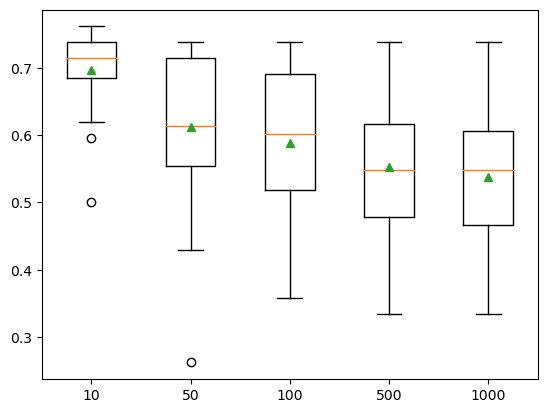

In [ ]:
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

Tuning the depth parameter

In [ ]:
# get a list of models to evaluate
def get_models():
	models = dict()
	# explore depths from 1 to 15
	for i in range(1,16):
		# define base model
		base = DecisionTreeClassifier(max_depth=i)
		# define ensemble model
		models[str(i)] = AdaBoostClassifier(base_estimator=base)
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>1 0.612 (0.114)
>2 0.587 (0.093)
>3 0.679 (0.032)
>4 0.707 (0.035)
>5 0.711 (0.032)
>6 0.727 (0.023)
>7 0.717 (0.022)
>8 0.724 (0.027)
>9 0.725 (0.021)
>10 0.723 (0.028)
>11 0.723 (0.022)
>12 0.720 (0.026)
>13 0.724 (0.025)
>14 0.720 (0.024)
>15 0.724 (0.021)


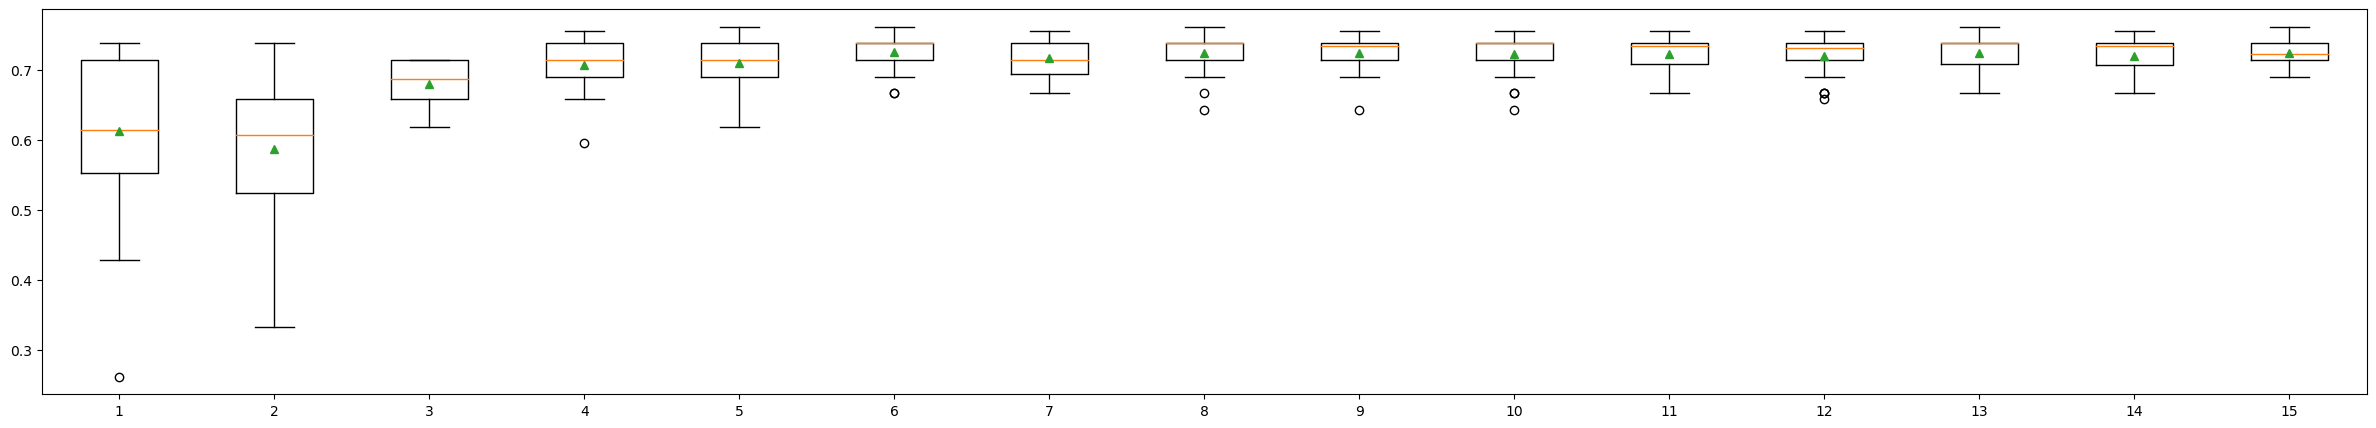

In [ ]:
# plot model performance for comparison
plt.figure(figsize=(30,5))
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

We see here, with the increase in depths, the accuracy is increasing with the highest accuracy of 72.5 percent with a deviation of +/- 0.05. You can explore for some higher depths. But we should be careful, not to overfit the decision tree.

In [ ]:
from numpy import arange

In [ ]:
def get_models():
	models = dict()
	# explore learning rates from 0.1 to 2 in 0.1 increments
	for i in arange(0.01, 2.1, 0.1):
		key = '%.3f' % i
		models[key] = AdaBoostClassifier(learning_rate=i)
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison

>0.010 0.739 (0.006)
>0.110 0.740 (0.007)
>0.210 0.738 (0.011)
>0.310 0.734 (0.018)
>0.410 0.721 (0.028)
>0.510 0.695 (0.062)
>0.610 0.684 (0.081)
>0.710 0.677 (0.095)
>0.810 0.650 (0.088)
>0.910 0.635 (0.097)
>1.010 0.612 (0.106)
>1.110 0.561 (0.126)
>1.210 0.513 (0.097)
>1.310 0.469 (0.107)
>1.410 0.443 (0.099)
>1.510 0.405 (0.113)
>1.610 0.404 (0.104)
>1.710 0.409 (0.096)
>1.810 0.422 (0.100)
>1.910 0.427 (0.111)
>2.010 0.282 (0.143)


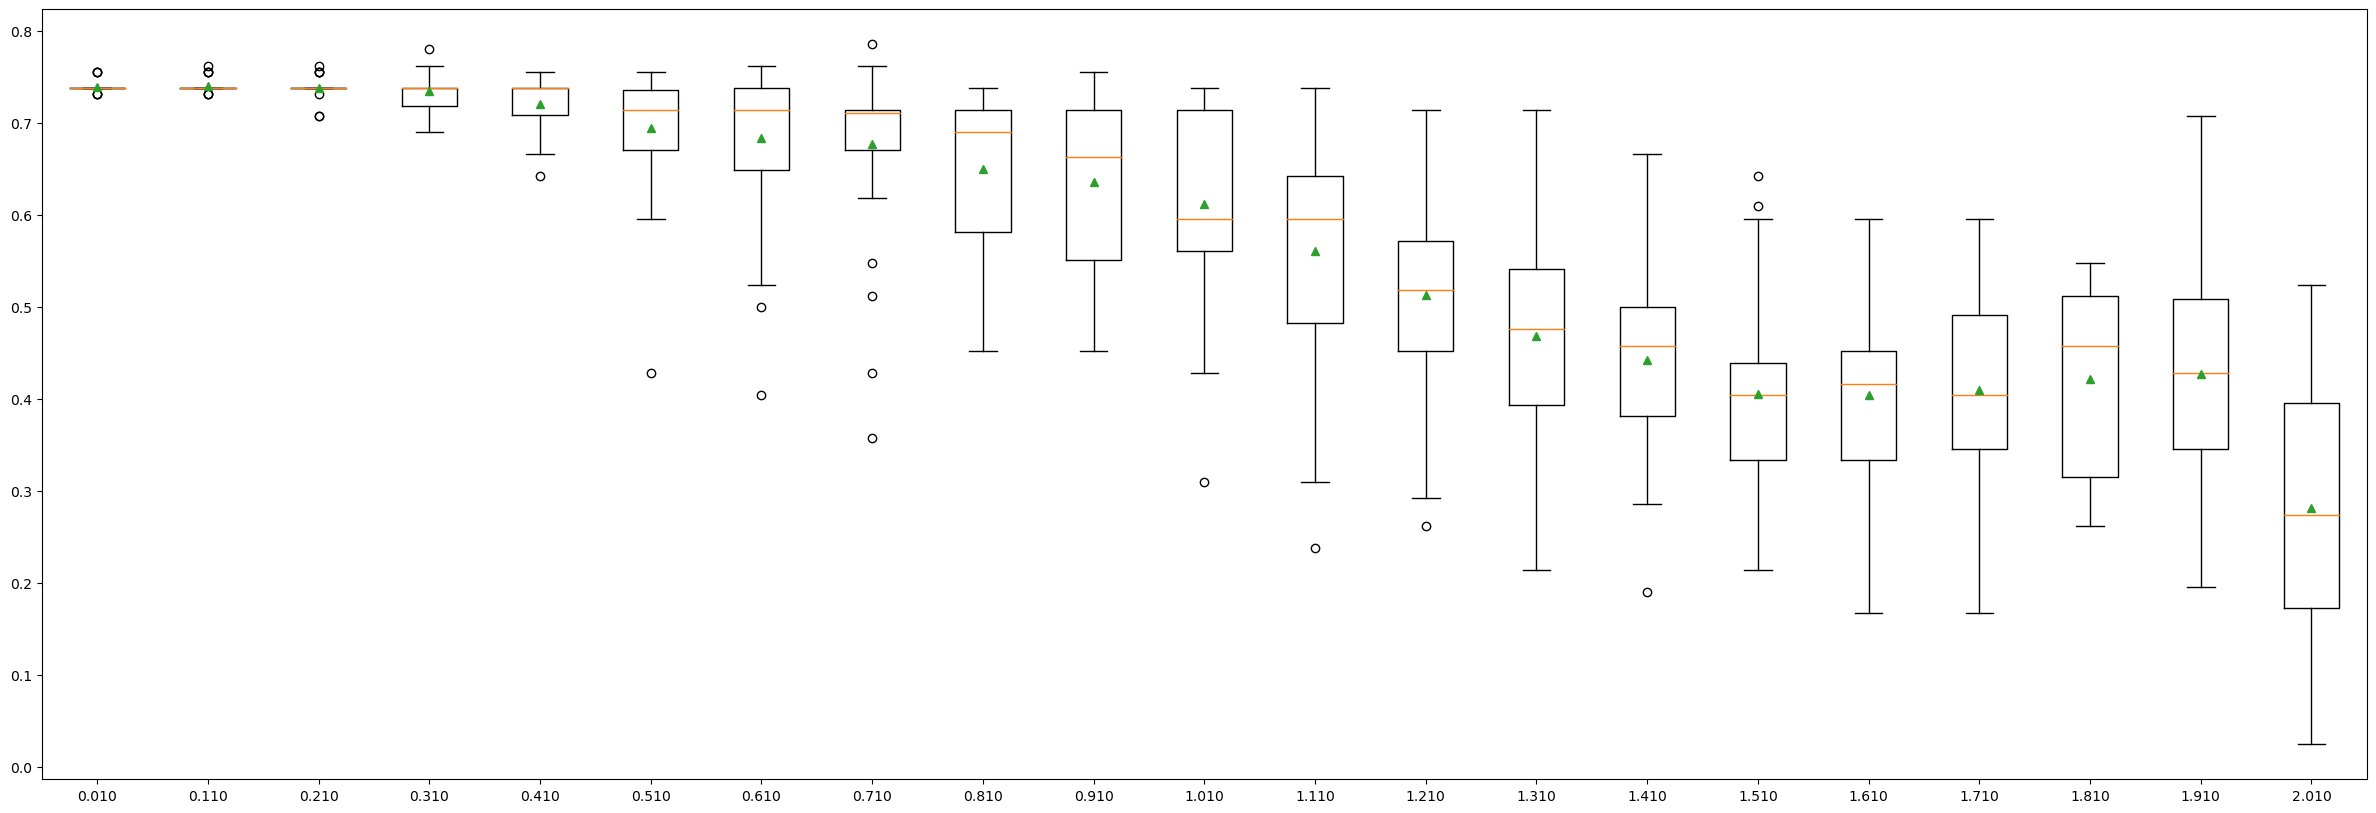

In [ ]:
# plot model performance for comparison
plt.figure(figsize=(30,10))
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

As we can see the best accuracy is for learning rate 1.00. Greater than this the accuracy seems to be decreasing thus giving the indication of overfitting.

In [ ]:
from sklearn.svm import SVC

In [ ]:
results = []
names = []
# define dataset
svc=SVC(probability=True, kernel='linear',gamma='auto',class_weight='balanced')
lr=LogisticRegression()
models=[svc,lr]
# define the model
for i in models:
  model = AdaBoostClassifier(base_estimator=i)
  # evaluate the model
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
  # report performance
  results.append(n_scores)
  names.append(i)
  print('Accuracy for {} : %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy for {} : 0.739 (0.006)
Accuracy for {} : 0.646 (0.038)


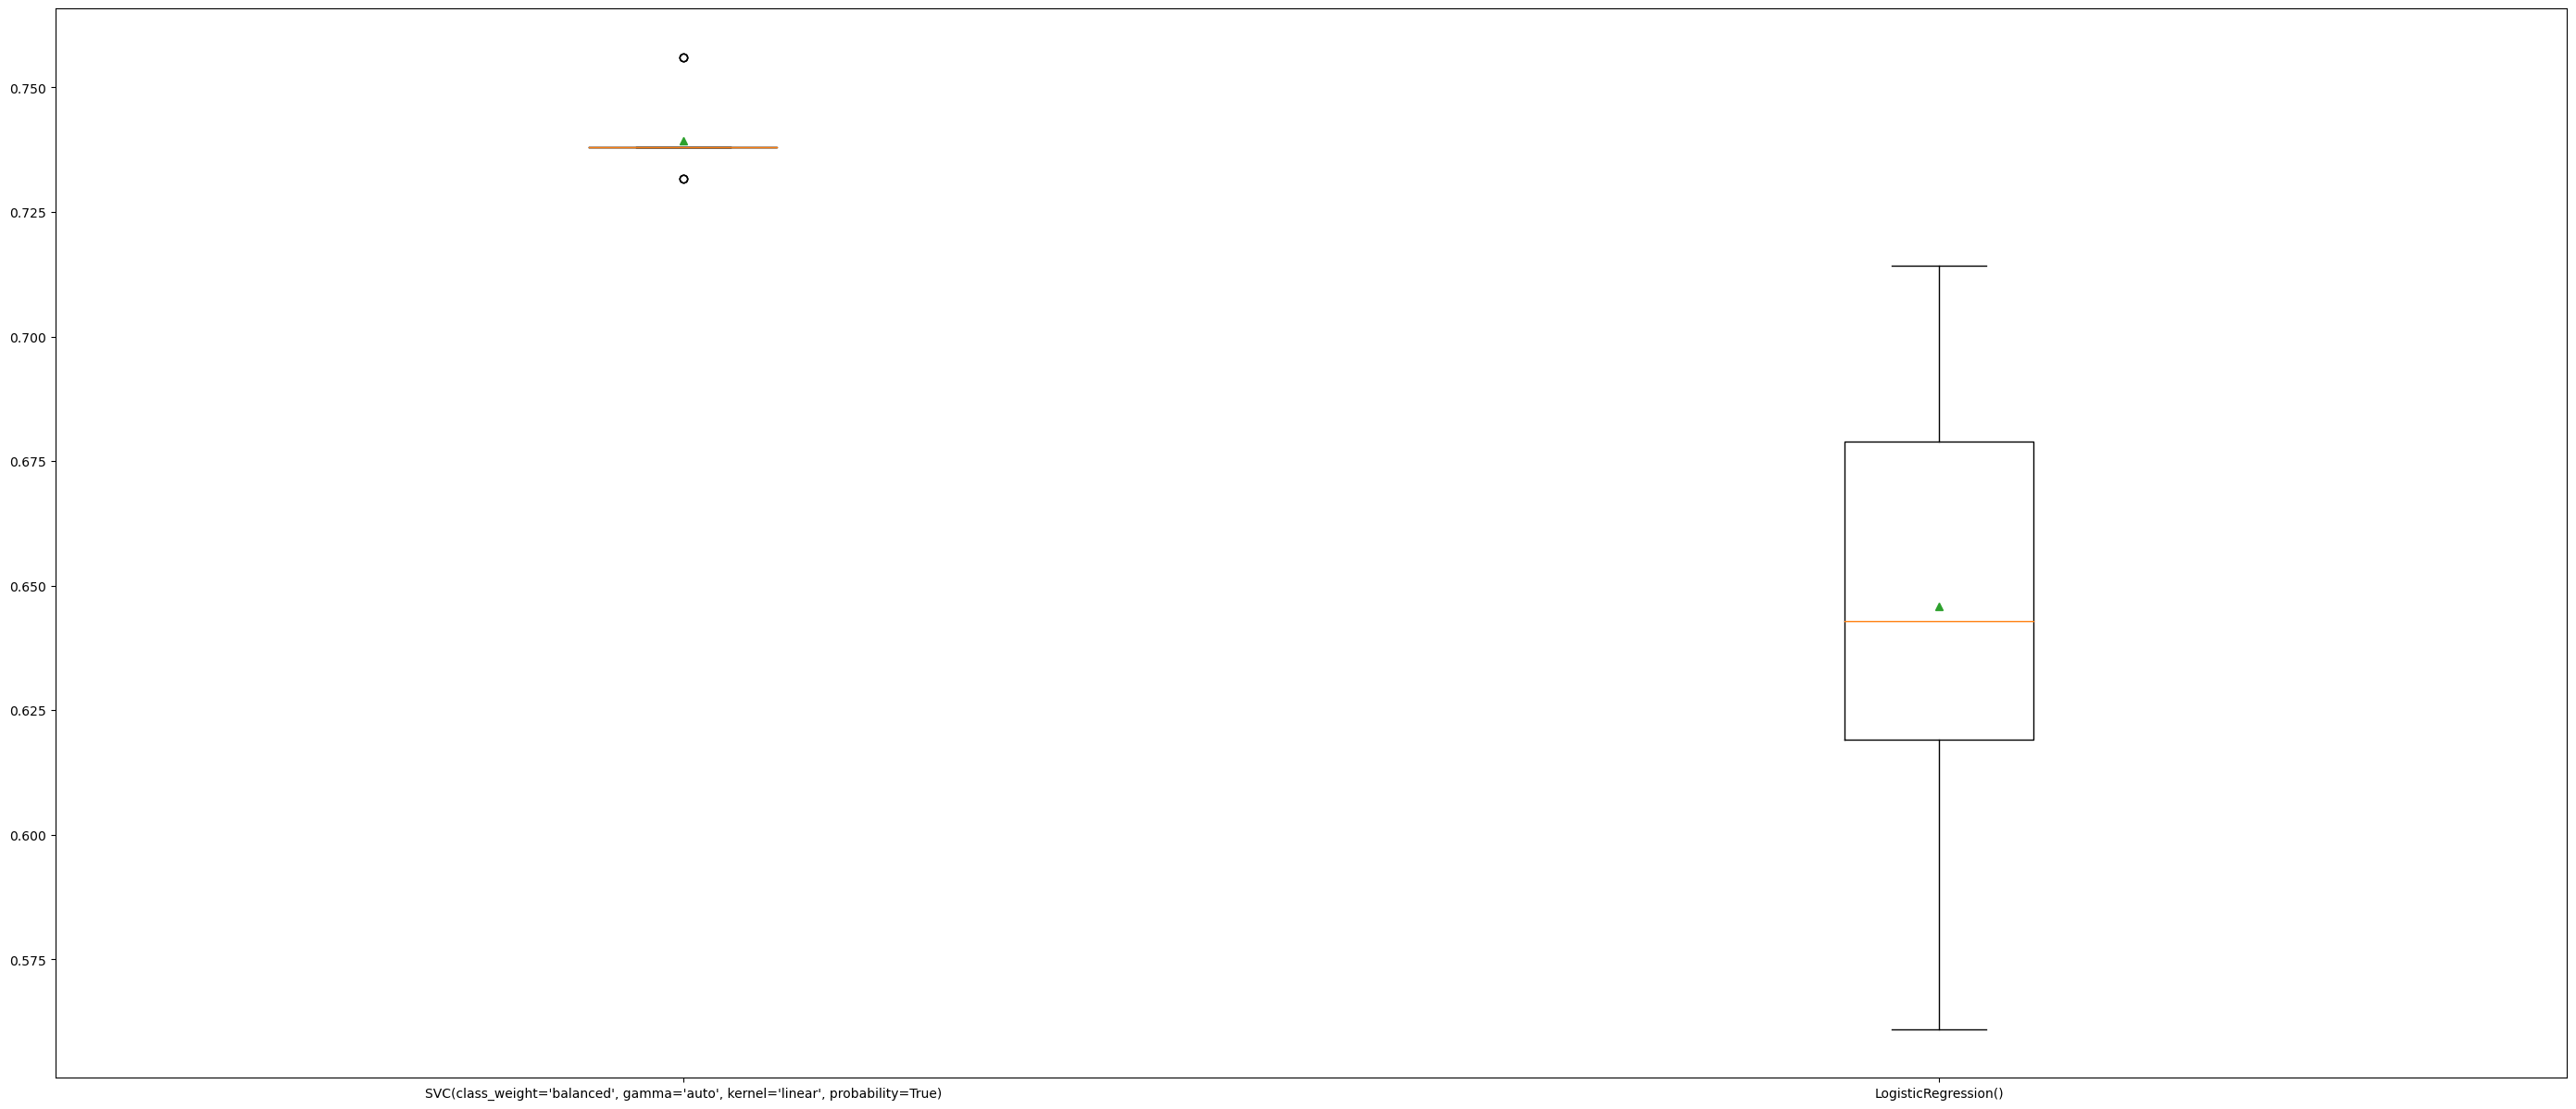

In [ ]:
# plot model performance for comparison
plt.figure(figsize=(35,15))
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [ ]:
model = XGBClassifier()
# define the grid of values to search
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
# execute the grid search
grid_result = grid_search.fit(X, y)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.714518 using {'learning_rate': 0.1, 'n_estimators': 50}
0.688037 (0.039259) with: {'learning_rate': 0.0001, 'n_estimators': 10}
0.684843 (0.041032) with: {'learning_rate': 0.0001, 'n_estimators': 50}
0.684050 (0.040683) with: {'learning_rate': 0.0001, 'n_estimators': 100}
0.689702 (0.034273) with: {'learning_rate': 0.0001, 'n_estimators': 500}
0.684843 (0.041032) with: {'learning_rate': 0.001, 'n_estimators': 10}
0.689702 (0.034273) with: {'learning_rate': 0.001, 'n_estimators': 50}
0.695296 (0.035572) with: {'learning_rate': 0.001, 'n_estimators': 100}
0.702555 (0.029250) with: {'learning_rate': 0.001, 'n_estimators': 500}
0.694503 (0.035404) with: {'learning_rate': 0.01, 'n_estimators': 10}
0.703349 (0.028581) with: {'learning_rate': 0.01, 'n_estimators': 50}
0.702594 (0.031325) with: {'learning_rate': 0.01, 'n_estimators': 100}
0.713744 (0.033119) with: {'learning_rate': 0.01, 'n_estimators': 500}
0.708208 (0.029723) with: {'learning_rate': 0.1, 'n_estimators': 10}
0.714518 

In [ ]:
model = AdaBoostClassifier()
# define the grid of values to search
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
# execute the grid search
grid_result = grid_search.fit(X, y)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.740050 using {'learning_rate': 0.1, 'n_estimators': 10}
0.739257 (0.005928) with: {'learning_rate': 0.0001, 'n_estimators': 10}
0.739257 (0.005928) with: {'learning_rate': 0.0001, 'n_estimators': 50}
0.739257 (0.005928) with: {'learning_rate': 0.0001, 'n_estimators': 100}
0.739257 (0.005928) with: {'learning_rate': 0.0001, 'n_estimators': 500}
0.739257 (0.005928) with: {'learning_rate': 0.001, 'n_estimators': 10}
0.739257 (0.005928) with: {'learning_rate': 0.001, 'n_estimators': 50}
0.739257 (0.005928) with: {'learning_rate': 0.001, 'n_estimators': 100}
0.739257 (0.005928) with: {'learning_rate': 0.001, 'n_estimators': 500}
0.739257 (0.005928) with: {'learning_rate': 0.01, 'n_estimators': 10}
0.739257 (0.005928) with: {'learning_rate': 0.01, 'n_estimators': 50}
0.739257 (0.005928) with: {'learning_rate': 0.01, 'n_estimators': 100}
0.739257 (0.005928) with: {'learning_rate': 0.01, 'n_estimators': 500}
0.740050 (0.007181) with: {'learning_rate': 0.1, 'n_estimators': 10}
0.740050 

Using the best Parameter for original and smote data

In [ ]:
clf = AdaBoostClassifier(learning_rate= 0.1, n_estimators = 10)

In [ ]:
clf.fit(X_train_smote,y_train_smote)
y_pred =clf.predict(X_test)
accuracy_score(y_pred,y_test)

0.5595238095238095

In [ ]:
# X_train, X_test, y_train, y_test
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_pred,y_test)

0.7380952380952381

Got 73.8 accuracy for original data

In [ ]:
resultsDf_final = resultsDf_final.reset_index(drop=True)

In [ ]:
resultsDf_final.sort_values(['Test Accuracy'],ascending=False)

Method  Train Accuracy  Test Accuracy  \
17      RandomForestClassifier_OverSample        0.998381       0.738095   
3                                    SVC         0.739521       0.738095   
6                      BaggingClassifier         0.964072       0.738095   
8                     AdaBoostClassifier         0.715569       0.738095   
20          AdaBoostClassifier_OverSample        0.373279       0.738095   
22              LGBMClassifier_OverSample        0.998381       0.726190   
5                 RandomForestClassifier         0.952096       0.726190   
7                   ExtraTreesClassifier         0.994012       0.726190   
11                         XGBClassifier         0.841317       0.726190   
1                        RidgeClassifier         0.757485       0.726190   
2                   KNeighborsClassifier         0.745509       0.714286   
9             GradientBoostingClassifier         0.943114       0.714286   
10                        LGBMClassifier         0.991018       0.714286   
19        ExtraTreesClassifier_OverSample        0.998381       0.702381   
0                     LogisticRegression         0.754491       0.690476   
23               XGBClassifier_OverSample        0.996761       0.666667   
18           BaggingClassifier_OverSample        0.997571       0.607143   
4                 DecisionTreeClassifier         0.994012       0.571429   
21  GradientBoostingClassifier_OverSample        0.967611       0.511905   
16      DecisionTreeClassifier_OverSample        0.998381       0.392857   
14        KNeighborsClassifier_OverSample        0.950607       0.261905   
15                         SVC_OverSample        0.289069       0.071429   
13             RidgeClassifier_OverSample        0.788664       0.071429   
12          LogisticRegression_OverSample        0.361134       0.059524   

    Precision    Recall  F1-Score  Multi-Class Logloss  
17   0.587596  0.738095  0.647020             3.842468  
3    0.544785  0.738095  0.626875             0.903826  
6    0.586607  0.738095  0.650011             2.361056  
8    0.563786  0.738095  0.639227             1.393020  
20   0.551348  0.738095  0.631199             1.220405  
22   0.542456  0.726190  0.621018             1.695345  
5    0.542456  0.726190  0.621018             3.445314  
7    0.549071  0.726190  0.625331             2.038617  
11   0.608198  0.726190  0.647214             0.912673  
1    0.549071  0.726190  0.625331             1.000000  
2    0.598855  0.714286  0.636744             6.472817  
9    0.628098  0.714286  0.660009             0.867077  
10   0.621364  0.714286  0.660077             1.410340  
19   0.571841  0.702381  0.629570             1.669947  
0    0.548840  0.690476  0.611565             0.910722  
23   0.597082  0.666667  0.627927             1.018194  
18   0.589646  0.607143  0.590898             2.171834  
4    0.601980  0.571429  0.585422            14.802333  
21   0.621873  0.511905  0.552946             1.230184  
16   0.530726  0.392857  0.446478            20.969971  
14   0.576107  0.261905  0.309257             8.874191  
15   0.005102  0.071429  0.009524             1.609438  
13   0.005102  0.071429  0.009524             1.000000  
12   0.751119  0.059524  0.042913             1.733659

# Milestone 2

In [ ]:
import tensorflow as tf
# disable keras warnings
tf.get_logger().setLevel('ERROR')

In [ ]:
### Get ANN Multiclass Classification Metrics

In [ ]:
# get the accuracy, precision, recall, f1 score from model
def get_classification_metrics(model, X_test, y_test, target_type):
  
  # predict probabilities for test set
  yhat_probs = model.predict(X_test, verbose=0) # Multiclass

  # predict crisp classes for test set
  if target_type == 'multi_class':
    yhat_classes = model.predict_classes(X_test, verbose=0) # Multiclass
  else:
    yhat_classes = (np.asarray(model.predict(X_test))).round() # Multilabel

  # reduce to 1d array
  yhat_probs = yhat_probs[:, 0]

  # accuracy: (tp + tn) / (p + n)
  accuracy = accuracy_score(y_test, yhat_classes)

  # precision tp / (tp + fp)
  precision = precision_score(y_test, yhat_classes, average='micro')

  # recall: tp / (tp + fn)
  recall = recall_score(y_test, yhat_classes, average='micro')
  # f1: 2 tp / (2 tp + fp + fn)
  f1 = f1_score(y_test, yhat_classes, average='micro')
  return accuracy, precision, recall, f1

In [ ]:
class Metrics(tf.keras.callbacks.Callback):

    def __init__(self, validation_data=()):
        super().__init__()
        self.validation_data = validation_data

    def on_train_begin(self, logs={}):
        self.val_f1s = []
        self.val_recalls = []
        self.val_precisions = []

    def on_epoch_end(self, epoch, logs={}):
        xVal, yVal, target_type = self.validation_data
        if target_type == 'multi_class':
          val_predict_classes = model.predict_classes(xVal, verbose=0) # Multiclass
        else:
          val_predict_classes = (np.asarray(self.model.predict(xVal))).round() # Multilabel
        
        
        val_targ = yVal

        _val_f1 = f1_score(val_targ, val_predict_classes, average='micro')
        _val_recall = recall_score(val_targ, val_predict_classes, average='micro')
        _val_precision = precision_score(val_targ, val_predict_classes, average='micro')
        self.val_f1s.append(_val_f1)
        self.val_recalls.append(_val_recall)
        self.val_precisions.append(_val_precision)
        #print("— train_f1: %f — train_precision: %f — train_recall %f" % (_val_f1, _val_precision, _val_recall))
        return

#### Convert Classification to Numeric problem
- In this section, we will create a classification model that uses categorical columns and tf-idf features from accident description and label encoded target variable. We can use simple densely connected neural networks to make predictions.

- Since we have ordinal relationship between each category in target variable, I have considered this one as numerical/regression problem and try to observe the ANN behaviour.

In [ ]:
from keras.optimizers import SGD
from tensorflow.keras.models import Sequential
from keras.callbacks import ReduceLROnPlateau
from keras.regularizers import l1, l2, l1_l2
from keras.constraints import unit_norm
from tensorflow.keras.layers import Flatten, Activation, Dense, LSTM, BatchNormalization, Embedding, Dropout, Flatten, Bidirectional, GlobalMaxPool1D


In [ ]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
tf.random.set_seed(seed)

# define the model
model = Sequential()
model.add(Dense(50, input_dim=X_train.shape[1], activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(150, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(40, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))

# compile the keras model
#opt = optimizers.Adam(lr=1e-3)
opt = SGD(lr=0.001, momentum=0.9)
model.compile(loss='mse', optimizer=opt, metrics=['accuracy'])

# Use earlystopping
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, min_delta=0.001)
rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.0001, patience=5, min_delta=1E-4)

# fit the keras model on the dataset
training_history = model.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, validation_data=(X_test, y_test), callbacks=[rlrp])

Epoch 1/100
42/42 [==============================] - 1s 8ms/step - loss: 1.1244 - accuracy: 0.4461 - val_loss: 1.1272 - val_accuracy: 0.4524 - lr: 0.0010
Epoch 2/100
42/42 [==============================] - 0s 2ms/step - loss: 1.0182 - accuracy: 0.4491 - val_loss: 1.0619 - val_accuracy: 0.3333 - lr: 0.0010
Epoch 3/100
42/42 [==============================] - 0s 2ms/step - loss: 0.9480 - accuracy: 0.4880 - val_loss: 1.0828 - val_accuracy: 0.6310 - lr: 0.0010
Epoch 4/100
42/42 [==============================] - 0s 2ms/step - loss: 0.8939 - accuracy: 0.5329 - val_loss: 1.0174 - val_accuracy: 0.4881 - lr: 0.0010
Epoch 5/100
42/42 [==============================] - 0s 2ms/step - loss: 0.8274 - accuracy: 0.4970 - val_loss: 1.0848 - val_accuracy: 0.6310 - lr: 0.0010
Epoch 6/100
42/42 [==============================] - 0s 2ms/step - loss: 0.7858 - accuracy: 0.5509 - val_loss: 1.0135 - val_accuracy: 0.4286 - lr: 0.0010
Epoch 7/100
42/42 [==============================] - 0s 2ms/step - loss: 0.7

Epoch 53/100
42/42 [==============================] - 0s 2ms/step - loss: 0.9882 - accuracy: 0.7395 - val_loss: 1.7718 - val_accuracy: 0.7262 - lr: 1.0000e-39
Epoch 54/100
42/42 [==============================] - 0s 2ms/step - loss: 0.9882 - accuracy: 0.7395 - val_loss: 1.7718 - val_accuracy: 0.7262 - lr: 1.0000e-39
Epoch 55/100
42/42 [==============================] - 0s 2ms/step - loss: 0.9882 - accuracy: 0.7395 - val_loss: 1.7718 - val_accuracy: 0.7262 - lr: 1.0000e-39
Epoch 56/100
42/42 [==============================] - 0s 2ms/step - loss: 0.9882 - accuracy: 0.7395 - val_loss: 1.7718 - val_accuracy: 0.7262 - lr: 1.0000e-39
Epoch 57/100
42/42 [==============================] - 0s 2ms/step - loss: 0.9882 - accuracy: 0.7395 - val_loss: 1.7718 - val_accuracy: 0.7262 - lr: 9.9492e-44
Epoch 58/100
42/42 [==============================] - 0s 2ms/step - loss: 0.9882 - accuracy: 0.7395 - val_loss: 1.7718 - val_accuracy: 0.7262 - lr: 9.9492e-44
Epoch 59/100
42/42 [==========================

In [ ]:
# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test, batch_size=8, verbose=0)
print('Test accuracy: %.2f' % (accuracy*100))

Test accuracy: 72.62


Text(0.5, 1.0, 'Training and validation loss')

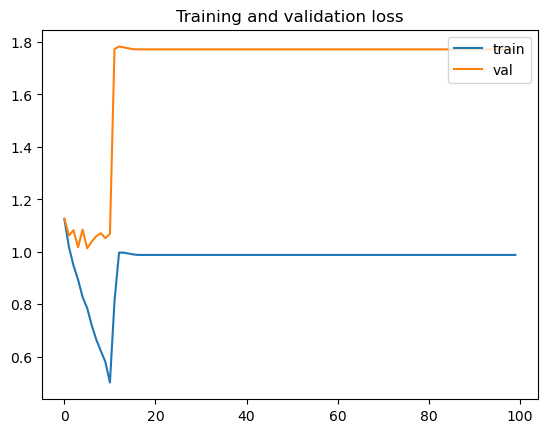

In [ ]:
epochs = range(len(training_history.history['loss'])) # Get number of epochs

# plot loss learning curves
plt.plot  (epochs, training_history.history['loss'], label = 'train')
plt.plot  (epochs, training_history.history['val_loss'], label = 'val')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

Above one is underfit model, it can be identified from the learning curve of the training loss only. It is showing noisy values of relatively high loss, indicating that the model was unable to learn the training dataset at all and model does not have a suitable capacity for the complexity of the dataset.

#### Multiclass classification - Target variable - One hot encoded¶
- In this section, we will create a classification model that uses categorical columns and tf-idf features from accident description and one-hot encoded target variable. We can use simple densely connected neural networks to make predictions.

In [ ]:
# fix random seed for reproducibility
#reset_random_seeds()
#param = 1e-9
param = 1e-4

# define the model
model = Sequential()

model.add(Dense(10, input_dim=X_train.shape[1], activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(param),
                kernel_constraint=unit_norm()))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(10, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(param), 
                kernel_constraint=unit_norm()))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(5, activation='softmax', kernel_regularizer=l2(param), 
                kernel_constraint=unit_norm())) # Multilabel

# compile the keras model
#opt = optimizers.Adamax(lr=0.01)
opt = SGD(lr=0.001, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['categorical_accuracy'])

# Use earlystopping
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=7, min_delta=1E-3)
rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.0001, patience=5, min_delta=1E-4)

target_type = 'multi_label'
metrics = Metrics(validation_data=(X_train, y_train_dummy, target_type))

# fit the keras model on the dataset
training_history = model.fit(X_train, y_train_dummy, epochs=100, batch_size=8, verbose=1, validation_data=(X_test, y_test_dummy), callbacks=[rlrp, metrics])

Epoch 1/100
42/42 [==============================] - 2s 15ms/step - loss: 1.8129 - categorical_accuracy: 0.3084 - val_loss: 1.3790 - val_categorical_accuracy: 0.7024 - lr: 0.0010
Epoch 2/100
42/42 [==============================] - 0s 4ms/step - loss: 1.4578 - categorical_accuracy: 0.4581 - val_loss: 1.1839 - val_categorical_accuracy: 0.7381 - lr: 0.0010
Epoch 3/100
42/42 [==============================] - 0s 4ms/step - loss: 1.2608 - categorical_accuracy: 0.5689 - val_loss: 1.0719 - val_categorical_accuracy: 0.7381 - lr: 0.0010
Epoch 4/100
42/42 [==============================] - 0s 4ms/step - loss: 1.2421 - categorical_accuracy: 0.5868 - val_loss: 0.9970 - val_categorical_accuracy: 0.7381 - lr: 0.0010
Epoch 5/100
42/42 [==============================] - 0s 4ms/step - loss: 1.1722 - categorical_accuracy: 0.6287 - val_loss: 0.9756 - val_categorical_accuracy: 0.7381 - lr: 0.0010
Epoch 6/100
42/42 [==============================] - 0s 4ms/step - loss: 1.0943 - categorical_accuracy: 0.673

42/42 [==============================] - 0s 4ms/step - loss: 0.9431 - categorical_accuracy: 0.7395 - val_loss: 0.8940 - val_categorical_accuracy: 0.7381 - lr: 0.0010
Epoch 32/100
42/42 [==============================] - 0s 4ms/step - loss: 0.9414 - categorical_accuracy: 0.7395 - val_loss: 0.8966 - val_categorical_accuracy: 0.7381 - lr: 0.0010
Epoch 33/100
42/42 [==============================] - 0s 4ms/step - loss: 0.8968 - categorical_accuracy: 0.7395 - val_loss: 0.8966 - val_categorical_accuracy: 0.7381 - lr: 1.0000e-07
Epoch 34/100
42/42 [==============================] - 0s 4ms/step - loss: 0.9063 - categorical_accuracy: 0.7365 - val_loss: 0.8957 - val_categorical_accuracy: 0.7381 - lr: 1.0000e-07
Epoch 35/100
42/42 [==============================] - 0s 4ms/step - loss: 0.9033 - categorical_accuracy: 0.7395 - val_loss: 0.8956 - val_categorical_accuracy: 0.7381 - lr: 1.0000e-07
Epoch 36/100
42/42 [==============================] - 0s 4ms/step - loss: 0.9046 - categorical_accuracy: 0

Epoch 61/100
42/42 [==============================] - 0s 4ms/step - loss: 0.9011 - categorical_accuracy: 0.7395 - val_loss: 0.8955 - val_categorical_accuracy: 0.7381 - lr: 1.0000e-27
Epoch 62/100
42/42 [==============================] - 0s 4ms/step - loss: 0.9149 - categorical_accuracy: 0.7395 - val_loss: 0.8947 - val_categorical_accuracy: 0.7381 - lr: 1.0000e-27
Epoch 63/100
42/42 [==============================] - 0s 4ms/step - loss: 0.9100 - categorical_accuracy: 0.7395 - val_loss: 0.8962 - val_categorical_accuracy: 0.7381 - lr: 1.0000e-31
Epoch 64/100
42/42 [==============================] - 0s 4ms/step - loss: 0.9376 - categorical_accuracy: 0.7395 - val_loss: 0.8960 - val_categorical_accuracy: 0.7381 - lr: 1.0000e-31
Epoch 65/100
42/42 [==============================] - 0s 4ms/step - loss: 0.9199 - categorical_accuracy: 0.7365 - val_loss: 0.8964 - val_categorical_accuracy: 0.7381 - lr: 1.0000e-31
Epoch 66/100
42/42 [==============================] - 0s 4ms/step - loss: 0.8952 - ca

Epoch 91/100
42/42 [==============================] - 0s 4ms/step - loss: 0.9312 - categorical_accuracy: 0.7395 - val_loss: 0.8973 - val_categorical_accuracy: 0.7381 - lr: 0.0000e+00
Epoch 92/100
42/42 [==============================] - 0s 4ms/step - loss: 0.9275 - categorical_accuracy: 0.7395 - val_loss: 0.8968 - val_categorical_accuracy: 0.7381 - lr: 0.0000e+00
Epoch 93/100
42/42 [==============================] - 0s 5ms/step - loss: 0.9403 - categorical_accuracy: 0.7395 - val_loss: 0.8970 - val_categorical_accuracy: 0.7381 - lr: 0.0000e+00
Epoch 94/100
42/42 [==============================] - 0s 4ms/step - loss: 0.8895 - categorical_accuracy: 0.7395 - val_loss: 0.8971 - val_categorical_accuracy: 0.7381 - lr: 0.0000e+00
Epoch 95/100
42/42 [==============================] - 0s 4ms/step - loss: 0.8849 - categorical_accuracy: 0.7395 - val_loss: 0.8967 - val_categorical_accuracy: 0.7381 - lr: 0.0000e+00
Epoch 96/100
42/42 [==============================] - 0s 4ms/step - loss: 0.9093 - ca

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                870       
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 batch_normalization (BatchN  (None, 10)               40        
 ormalization)                                                   
                                                                 
 dense_6 (Dense)             (None, 10)                110       
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 batch_normalization_1 (Batc  (None, 10)               40        
 hNormalization)                                      

In [ ]:
# evaluate the keras model
_, train_accuracy = model.evaluate(X_train, y_train_dummy, batch_size=8, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test, y_test_dummy, batch_size=8, verbose=0)
train_accuracy = train_accuracy*100
test_accuracy = test_accuracy*100
# print('Train accuracy: %.2f' % (train_accuracy*100))
# print('Test accuracy: %.2f' % (test_accuracy*100))

In [ ]:
accuracy, precision, recall, f1 = get_classification_metrics(model,X_test, y_test_dummy, target_type)
print('Accuracy: %f' % accuracy)
print('Precision: %f' % precision)
print('Recall: %f' % recall)
print('F1 score: %f' % f1)


3/3 [==============================] - 0s 2ms/step
Accuracy: 0.738095
Precision: 0.738095
Recall: 0.738095
F1 score: 0.738095


In [ ]:
resultsDf_final.loc[len(resultsDf_final.index)] = ['ANN_one_hot_encoded',train_accuracy,test_accuracy,precision,recall,f1,test_loss]

Text(0.5, 1.0, 'Training and validation loss')

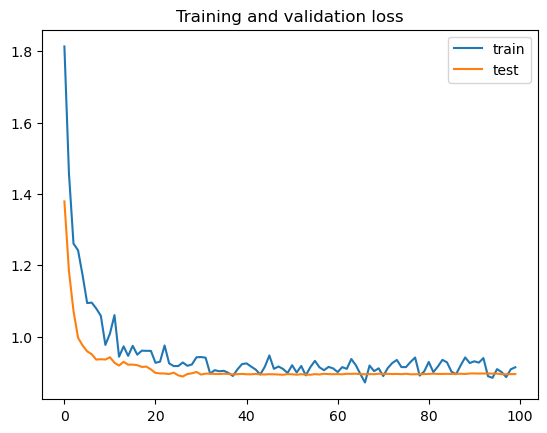

In [ ]:
epochs = range(len(training_history.history['loss'])) # Get number of epochs

# plot loss learning curves
plt.plot(epochs, training_history.history['loss'], label = 'train')
plt.plot(epochs, training_history.history['val_loss'], label = 'test')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

Above one is good fit, it is identified by a training and validation loss that decreases to a point of stability with a minimal gap between the two final loss values. The loss of the model will almost always be lower on the training dataset than the validation dataset.

Text(0.5, 1.0, 'Training and validation accuracy')

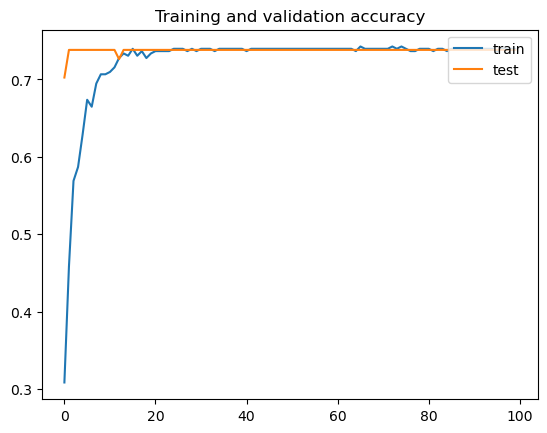

In [ ]:
# plot accuracy learning curves
plt.plot(epochs, training_history.history['categorical_accuracy'], label = 'train')
plt.plot(epochs, training_history.history['val_categorical_accuracy'], label = 'test')
plt.legend(loc = 'upper right')
plt.title ('Training and validation accuracy')

We could see it accuracy continually rise during training. As expected, we see the learning curves for accuracy on the test dataset plateau, indicating that the model has no longer overfit the training dataset and it is generalized model.

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model weights to disk")

# Save the model in h5 format 
model.save("finalized_keras_model.h5")
print("Saved model to disk")

Saved model weights to disk
Saved model to disk


#### Multiclass classification - Target variable - One hot encoded with SMOTE data
- In this section, we will create a classification model that uses categorical columns and tf-idf features from accident description and one-hot encoded target variable. We can use simple densely connected neural networks to make predictions.

In [ ]:
# fix random seed for reproducibility
reset_random_seeds =7
#param = 1e-9
param = 1e-4

# define the model
model = Sequential()

model.add(Dense(10, input_dim=X_train_smote.shape[1], activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(param),
                kernel_constraint=unit_norm()))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(10, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(param), 
                kernel_constraint=unit_norm()))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(5, activation='softmax', kernel_regularizer=l2(param), 
                kernel_constraint=unit_norm())) # Multilabel

# compile the keras model
#opt = optimizers.Adamax(lr=0.01)
opt = SGD(lr=0.001, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['categorical_accuracy'])

# Use earlystopping
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=7, min_delta=1E-3)
rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.0001, patience=5, min_delta=1E-4)

target_type = 'multi_label'
metrics = Metrics(validation_data=(X_train_smote, y_train_smote_dummy, target_type))

# fit the keras model on the dataset
training_history = model.fit(X_train_smote, y_train_smote_dummy, epochs=100, batch_size=8, verbose=1, validation_data=(X_test, y_test_dummy), callbacks=[rlrp, metrics])

Epoch 1/100
155/155 [==============================] - 2s 5ms/step - loss: 1.8393 - categorical_accuracy: 0.1935 - val_loss: 1.9119 - val_categorical_accuracy: 0.0833 - lr: 0.0010
Epoch 2/100
155/155 [==============================] - 0s 2ms/step - loss: 1.7589 - categorical_accuracy: 0.2032 - val_loss: 2.7410 - val_categorical_accuracy: 0.0714 - lr: 0.0010
Epoch 3/100
155/155 [==============================] - 0s 2ms/step - loss: 1.7073 - categorical_accuracy: 0.2121 - val_loss: 4.8661 - val_categorical_accuracy: 0.1071 - lr: 0.0010
Epoch 4/100
155/155 [==============================] - 0s 2ms/step - loss: 1.7284 - categorical_accuracy: 0.1846 - val_loss: 8.9441 - val_categorical_accuracy: 0.1310 - lr: 0.0010
Epoch 5/100
155/155 [==============================] - 0s 2ms/step - loss: 1.6785 - categorical_accuracy: 0.2211 - val_loss: 12.4614 - val_categorical_accuracy: 0.1071 - lr: 0.0010
Epoch 6/100
155/155 [==============================] - 0s 2ms/step - loss: 1.6707 - categorical_acc

155/155 [==============================] - 0s 2ms/step - loss: 1.6720 - categorical_accuracy: 0.2146 - val_loss: 30.9132 - val_categorical_accuracy: 0.0952 - lr: 1.0000e-23
Epoch 31/100
155/155 [==============================] - 0s 2ms/step - loss: 1.6709 - categorical_accuracy: 0.1919 - val_loss: 26.3107 - val_categorical_accuracy: 0.0952 - lr: 1.0000e-23
Epoch 32/100
155/155 [==============================] - 0s 2ms/step - loss: 1.6585 - categorical_accuracy: 0.2024 - val_loss: 30.2404 - val_categorical_accuracy: 0.0952 - lr: 1.0000e-27
Epoch 33/100
155/155 [==============================] - 0s 2ms/step - loss: 1.6656 - categorical_accuracy: 0.2000 - val_loss: 30.2771 - val_categorical_accuracy: 0.0952 - lr: 1.0000e-27
Epoch 34/100
155/155 [==============================] - 0s 2ms/step - loss: 1.6603 - categorical_accuracy: 0.2251 - val_loss: 31.0180 - val_categorical_accuracy: 0.0952 - lr: 1.0000e-27
Epoch 35/100
155/155 [==============================] - 0s 2ms/step - loss: 1.6827 

155/155 [==============================] - 0s 2ms/step - loss: 1.6480 - categorical_accuracy: 0.2154 - val_loss: 25.2193 - val_categorical_accuracy: 0.0952 - lr: 0.0000e+00
Epoch 60/100
155/155 [==============================] - 0s 2ms/step - loss: 1.6715 - categorical_accuracy: 0.2097 - val_loss: 29.7997 - val_categorical_accuracy: 0.0952 - lr: 0.0000e+00
Epoch 61/100
155/155 [==============================] - 0s 2ms/step - loss: 1.6566 - categorical_accuracy: 0.1984 - val_loss: 28.7131 - val_categorical_accuracy: 0.0952 - lr: 0.0000e+00
Epoch 62/100
155/155 [==============================] - 0s 2ms/step - loss: 1.6600 - categorical_accuracy: 0.2065 - val_loss: 28.0388 - val_categorical_accuracy: 0.0952 - lr: 0.0000e+00
Epoch 63/100
155/155 [==============================] - 0s 2ms/step - loss: 1.6501 - categorical_accuracy: 0.2113 - val_loss: 29.8396 - val_categorical_accuracy: 0.0952 - lr: 0.0000e+00
Epoch 64/100
155/155 [==============================] - 0s 2ms/step - loss: 1.6713 

155/155 [==============================] - 0s 2ms/step - loss: 1.6530 - categorical_accuracy: 0.2170 - val_loss: 30.6814 - val_categorical_accuracy: 0.0952 - lr: 0.0000e+00
Epoch 89/100
155/155 [==============================] - 0s 2ms/step - loss: 1.6614 - categorical_accuracy: 0.2138 - val_loss: 29.6697 - val_categorical_accuracy: 0.0952 - lr: 0.0000e+00
Epoch 90/100
155/155 [==============================] - 0s 2ms/step - loss: 1.6541 - categorical_accuracy: 0.2121 - val_loss: 26.2073 - val_categorical_accuracy: 0.0952 - lr: 0.0000e+00
Epoch 91/100
155/155 [==============================] - 0s 2ms/step - loss: 1.6560 - categorical_accuracy: 0.2219 - val_loss: 28.7504 - val_categorical_accuracy: 0.0952 - lr: 0.0000e+00
Epoch 92/100
155/155 [==============================] - 0s 2ms/step - loss: 1.6625 - categorical_accuracy: 0.2121 - val_loss: 29.4783 - val_categorical_accuracy: 0.0952 - lr: 0.0000e+00
Epoch 93/100
155/155 [==============================] - 0s 2ms/step - loss: 1.6755 

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                870       
                                                                 
 dropout_2 (Dropout)         (None, 10)                0         
                                                                 
 batch_normalization_2 (Batc  (None, 10)               40        
 hNormalization)                                                 
                                                                 
 dense_9 (Dense)             (None, 10)                110       
                                                                 
 dropout_3 (Dropout)         (None, 10)                0         
                                                                 
 batch_normalization_3 (Batc  (None, 10)               40        
 hNormalization)                                      

In [ ]:
# evaluate the keras model
_, train_accuracy = model.evaluate(X_train_smote, y_train_smote_dummy, batch_size=8, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test, y_test_dummy, batch_size=8, verbose=0)

print('Train accuracy: %.2f' % (train_accuracy*100))
print('Test accuracy: %.2f' % (test_accuracy*100))

Train accuracy: 20.00
Test accuracy: 9.52


In [ ]:
accuracy, precision, recall, f1 = get_classification_metrics(model, X_test, y_test_dummy, target_type)
print('Accuracy: %f' % accuracy)
print('Precision: %f' % precision)
print('Recall: %f' % recall)
print('F1 score: %f' % f1)

3/3 [==============================] - 0s 4ms/step
Accuracy: 0.083333
Precision: 0.093333
Recall: 0.083333
F1 score: 0.088050


In [ ]:
resultsDf_final.loc[len(resultsDf_final.index)] = ['ANN_one_hot_SMOTE',train_accuracy*100,test_accuracy*100,precision,recall,f1,test_loss]

Text(0.5, 1.0, 'Training and validation loss')

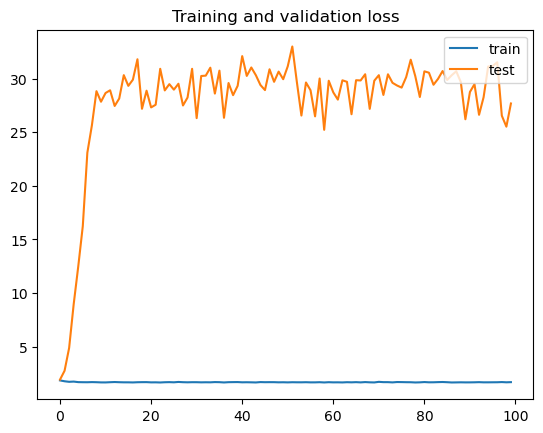

In [ ]:
epochs = range(len(training_history.history['loss'])) # Get number of epochs

# plot loss learning curves
plt.plot(epochs, training_history.history['loss'], label = 'train')
plt.plot(epochs, training_history.history['val_loss'], label = 'test')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

- Above one is overfit model, it can be identified from the learning curve of the training and validation loss only.

Text(0.5, 1.0, 'Training and validation accuracy')

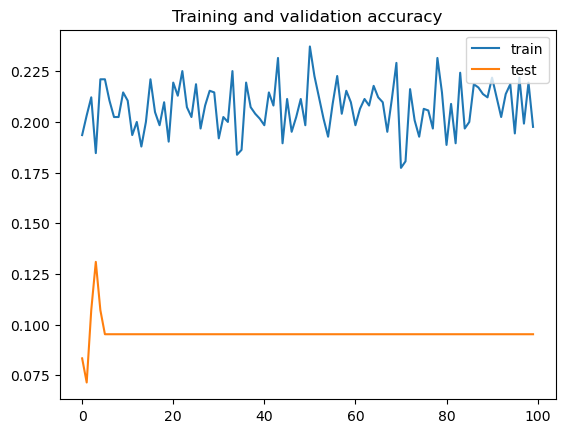

In [ ]:
# plot accuracy learning curves
plt.plot(epochs, training_history.history['categorical_accuracy'], label = 'train')
plt.plot(epochs, training_history.history['val_categorical_accuracy'], label = 'test')
plt.legend(loc = 'upper right')
plt.title ('Training and validation accuracy')

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model weights to disk")

# Save the model in h5 format 
model.save("finalized_keras_model.h5")
print("Saved model to disk")

Saved model weights to disk
Saved model to disk


 ### Design, train and test RNN or LSTM classifiers

#### Architecture
- Create a model with Text inputs only.
- Create a model with Categorical inputs only.
- Create a model with Multiple inputs.

1. Creating a Model with Text Inputs Only

In this section, we will create a classification model that uses accident description column alone.

In [ ]:
accident_df.head()

Date     Country     Local Industry Sector Accident Level  \
0 2016-01-01  Country_01  Local_01          Mining              I   
1 2016-01-02  Country_02  Local_02          Mining              I   
2 2016-01-06  Country_01  Local_03          Mining              I   
3 2016-01-08  Country_01  Local_04          Mining              I   
4 2016-01-10  Country_01  Local_04          Mining             IV   

  Potential Accident Level Gender         Employee type        Critical Risk  \
0                       IV   Male           Third_Party              Pressed   
1                       IV   Male              Employee  Pressurized Systems   
2                      III   Male  Third_Party_(Remote)         Manual Tools   
3                        I   Male           Third_Party               Others   
4                       IV   Male           Third_Party               Others   

                                         Description  Year  Month  Day  \
0  While removing the drill rod of the Jumbo 08 f...  2016      1    1   
1  During the activation of a sodium sulphide pum...  2016      1    2   
2  In the sub-station MILPO located at level +170...  2016      1    6   
3  Being 9:45 am. approximately in the Nv. 1880 C...  2016      1    8   
4  Approximately at 11:45 a.m. in circumstances t...  2016      1   10   

      Weekday  WeekofYear   Season  Is_Holiday  \
0     eFriday          53  aSummer           1   
1   fSaturday          53  aSummer           0   
2  cWednesday           1  aSummer           0   
3     eFriday           1  aSummer           0   
4     gSunday           1  aSummer           0   

                                      processed_text  \
0  [while, removing, drill, rod, jumbo, maintenan...   
1  [during, activation, sodium, sulphide, pump, p...   
2  [substation, milpo, located, level, collaborat...   
3  [being, approximately, personnel, begin, task,...   
4  [approximately, am, circumstance, mechanic, an...   

                               Description_processed  
0  removing drill rod jumbo maintenance superviso...  
1  activation sodium sulphide pump piping uncoupl...  
2  milpo located level collaborator excavation wo...  
3  approximately nv personnel begin task unlockin...  
4  approximately circumstance mechanic anthony gr...

In [ ]:
# Select input and output features
X_text = accident_df['Description_processed']
y_text = accident_df['Accident Level']

In [ ]:
# Encode labels in column 'Accident Level'.
y_text = LabelEncoder().fit_transform(y_text)

In [ ]:
# Divide our data into testing and training sets:
X_text_train, X_text_test, y_text_train, y_text_test = train_test_split(X_text, y_text, test_size = 0.20, random_state = 1, stratify = y_text)

print('X_text_train shape : ({0})'.format(X_text_train.shape[0]))
print('y_text_train shape : ({0},)'.format(y_text_train.shape[0]))
print('X_text_test shape : ({0})'.format(X_text_test.shape[0]))
print('y_text_test shape : ({0},)'.format(y_text_test.shape[0]))

X_text_train shape : (334)
y_text_train shape : (334,)
X_text_test shape : (84)
y_text_test shape : (84,)


In [ ]:
# Convert both the training and test labels into one-hot encoded vectors:
y_text_train = np_utils.to_categorical(y_text_train)
y_text_test = np_utils.to_categorical(y_text_test)

In [ ]:
# The first step in word embeddings is to convert the words into thier corresponding numeric indexes.
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_text_train)

X_text_train = tokenizer.texts_to_sequences(X_text_train)
X_text_test = tokenizer.texts_to_sequences(X_text_test)

In [ ]:
# Sentences can have different lengths, and therefore the sequences returned by the Tokenizer class also consist of variable lengths.
# We need to pad the our sequences using the max length.
vocab_size = len(tokenizer.word_index) + 1
print("vocab_size:", vocab_size)

maxlen = 100

X_text_train = pad_sequences(X_text_train, padding='post', maxlen=maxlen)
X_text_test = pad_sequences(X_text_test, padding='post', maxlen=maxlen)

vocab_size: 2457


In [ ]:
# We need to load the built-in GloVe word embeddings
embedding_size = 200
embeddings_dictionary = dict()

# glove_file = open('glove.6B.200d.txt/glove.6B.200d.txt', encoding="utf8")
glove_file = open('glove.6B.200d.txt', encoding="utf8")


for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = np.asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions

glove_file.close()

embedding_matrix = np.zeros((vocab_size, embedding_size))

for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

len(embeddings_dictionary.values())

400000

In [ ]:
from keras.layers import Input
from keras.models import Model

In [ ]:
reset_random_seeds=7

# Build a LSTM Neural Network
deep_inputs = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, embedding_size, weights=[embedding_matrix], trainable=False)(deep_inputs)

LSTM_Layer_1 = Bidirectional(LSTM(128, return_sequences = True))(embedding_layer)
max_pool_layer_1 = GlobalMaxPool1D()(LSTM_Layer_1)
drop_out_layer_1 = Dropout(0.5, input_shape = (256,))(max_pool_layer_1)
dense_layer_1 = Dense(128, activation = 'relu')(drop_out_layer_1)
drop_out_layer_2 = Dropout(0.5, input_shape = (128,))(dense_layer_1)
dense_layer_2 = Dense(64, activation = 'relu')(drop_out_layer_2)
drop_out_layer_3 = Dropout(0.5, input_shape = (64,))(dense_layer_2)

dense_layer_3 = Dense(32, activation = 'relu')(drop_out_layer_3)
drop_out_layer_4 = Dropout(0.5, input_shape = (32,))(dense_layer_3)

dense_layer_4 = Dense(10, activation = 'relu')(drop_out_layer_4)
drop_out_layer_5 = Dropout(0.5, input_shape = (10,))(dense_layer_4)

dense_layer_5 = Dense(5, activation='softmax')(drop_out_layer_5)
#dense_layer_3 = Dense(5, activation='softmax')(drop_out_layer_3)

# LSTM_Layer_1 = LSTM(128)(embedding_layer)
# dense_layer_1 = Dense(5, activation='softmax')(LSTM_Layer_1)
# model = Model(inputs=deep_inputs, outputs=dense_layer_1)

model = Model(inputs=deep_inputs, outputs=dense_layer_5)
#model = Model(inputs=deep_inputs, outputs=dense_layer_3)

opt = SGD(lr=0.001, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['acc'])

In [ ]:
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding (Embedding)       (None, 100, 200)          491400    
                                                                 
 bidirectional (Bidirectiona  (None, 100, 256)         336896    
 l)                                                              
                                                                 
 global_max_pooling1d (Globa  (None, 256)              0         
 lMaxPooling1D)                                                  
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 128)               32896 

In [ ]:
# Use earlystopping
# callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, min_delta=0.001)
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=7, min_delta=1E-3)
rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.0001, patience=5, min_delta=1E-4)

target_type = 'multi_label'
metrics = Metrics(validation_data=(X_text_train, y_text_train, target_type))

# fit the keras model on the dataset
training_history = model.fit(X_text_train, y_text_train, epochs=100, batch_size=8, verbose=1, validation_data=(X_text_test, y_text_test), callbacks=[rlrp, metrics])

Epoch 1/100
42/42 [==============================] - 9s 130ms/step - loss: 1.5474 - acc: 0.4012 - val_loss: 1.3653 - val_acc: 0.7381 - lr: 0.0010
Epoch 2/100
42/42 [==============================] - 3s 80ms/step - loss: 1.2920 - acc: 0.6796 - val_loss: 1.1712 - val_acc: 0.7381 - lr: 0.0010
Epoch 3/100
42/42 [==============================] - 4s 85ms/step - loss: 1.1738 - acc: 0.7246 - val_loss: 1.0559 - val_acc: 0.7381 - lr: 0.0010
Epoch 4/100
42/42 [==============================] - 3s 83ms/step - loss: 1.2076 - acc: 0.7305 - val_loss: 1.0763 - val_acc: 0.7381 - lr: 0.0010
Epoch 5/100
42/42 [==============================] - 3s 83ms/step - loss: 1.0822 - acc: 0.7305 - val_loss: 1.0140 - val_acc: 0.7381 - lr: 0.0010
Epoch 6/100
42/42 [==============================] - 3s 83ms/step - loss: 1.0897 - acc: 0.7305 - val_loss: 1.0069 - val_acc: 0.7381 - lr: 0.0010
Epoch 7/100
42/42 [==============================] - 4s 85ms/step - loss: 1.0595 - acc: 0.7365 - val_loss: 0.9842 - val_acc: 0.73

42/42 [==============================] - 4s 86ms/step - loss: 0.9076 - acc: 0.7395 - val_loss: 0.9192 - val_acc: 0.7381 - lr: 1.0000e-07
Epoch 40/100
42/42 [==============================] - 4s 85ms/step - loss: 0.9139 - acc: 0.7395 - val_loss: 0.9192 - val_acc: 0.7381 - lr: 1.0000e-07
Epoch 41/100
42/42 [==============================] - 4s 84ms/step - loss: 0.9203 - acc: 0.7395 - val_loss: 0.9192 - val_acc: 0.7381 - lr: 1.0000e-07
Epoch 42/100
42/42 [==============================] - 4s 86ms/step - loss: 0.9235 - acc: 0.7395 - val_loss: 0.9192 - val_acc: 0.7381 - lr: 1.0000e-07
Epoch 43/100
42/42 [==============================] - 4s 84ms/step - loss: 0.9225 - acc: 0.7395 - val_loss: 0.9192 - val_acc: 0.7381 - lr: 1.0000e-11
Epoch 44/100
42/42 [==============================] - 4s 85ms/step - loss: 0.9118 - acc: 0.7395 - val_loss: 0.9192 - val_acc: 0.7381 - lr: 1.0000e-11
Epoch 45/100
42/42 [==============================] - 3s 83ms/step - loss: 0.9281 - acc: 0.7395 - val_loss: 0.919

Epoch 77/100
42/42 [==============================] - 4s 86ms/step - loss: 0.9146 - acc: 0.7395 - val_loss: 0.9192 - val_acc: 0.7381 - lr: 1.0000e-35
Epoch 78/100
42/42 [==============================] - 4s 85ms/step - loss: 0.9265 - acc: 0.7395 - val_loss: 0.9192 - val_acc: 0.7381 - lr: 1.0000e-39
Epoch 79/100
42/42 [==============================] - 4s 85ms/step - loss: 0.9289 - acc: 0.7395 - val_loss: 0.9192 - val_acc: 0.7381 - lr: 1.0000e-39
Epoch 80/100
42/42 [==============================] - 4s 87ms/step - loss: 0.9138 - acc: 0.7395 - val_loss: 0.9192 - val_acc: 0.7381 - lr: 1.0000e-39
Epoch 81/100
42/42 [==============================] - 4s 85ms/step - loss: 0.9104 - acc: 0.7395 - val_loss: 0.9192 - val_acc: 0.7381 - lr: 1.0000e-39
Epoch 82/100
42/42 [==============================] - 4s 87ms/step - loss: 0.9200 - acc: 0.7395 - val_loss: 0.9192 - val_acc: 0.7381 - lr: 1.0000e-39
Epoch 83/100
42/42 [==============================] - 4s 87ms/step - loss: 0.8938 - acc: 0.7395 - va

In [ ]:
# evaluate the keras model
_, train_accuracy = model.evaluate(X_text_train, y_text_train, batch_size=8, verbose=0)
test_loss, test_accuracy = model.evaluate(X_text_test, y_text_test, batch_size=8, verbose=0)

print('Train accuracy: %.2f' % (train_accuracy*100))
print('Test accuracy: %.2f' % (test_accuracy*100))

Train accuracy: 73.95
Test accuracy: 73.81


In [ ]:
accuracy, precision, recall, f1 = get_classification_metrics(model, X_text_test, y_text_test, target_type)
print('Accuracy: %f' % accuracy)
print('Precision: %f' % precision)
print('Recall: %f' % recall)
print('F1 score: %f' % f1)

3/3 [==============================] - 0s 24ms/step
Accuracy: 0.738095
Precision: 0.738095
Recall: 0.738095
F1 score: 0.738095


In [ ]:
resultsDf_final.loc[len(resultsDf_final.index)] = ['LSTM',train_accuracy*100,test_accuracy*100,precision,recall,f1,test_loss]

Text(0.5, 1.0, 'Training and validation loss')

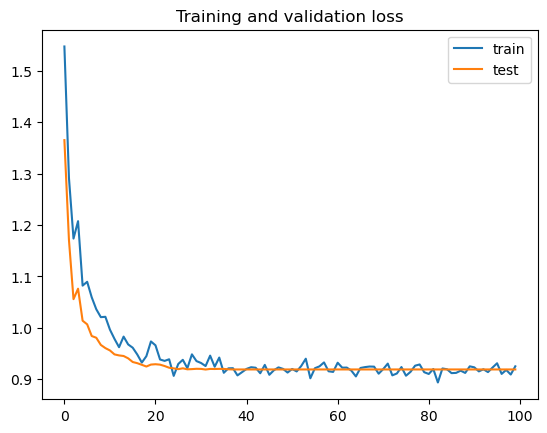

In [ ]:
epochs = range(len(training_history.history['loss'])) # Get number of epochs

# plot loss learning curves
plt.plot(epochs, training_history.history['loss'], label = 'train')
plt.plot(epochs, training_history.history['val_loss'], label = 'test')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

Above one is good fit, it is identified by a training and validation loss that decreases to a point of stability with a minimal gap between the two final loss values. The loss of the model will almost always be lower on the training dataset than the validation dataset.

Text(0.5, 1.0, 'Training and validation accuracy')

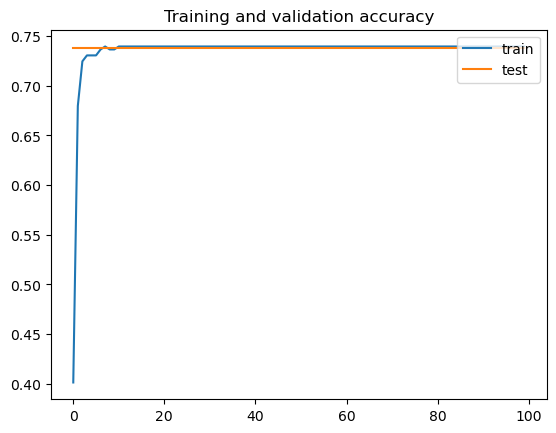

In [ ]:
# plot accuracy learning curves
plt.plot(epochs, training_history.history['acc'], label = 'train')
plt.plot(epochs, training_history.history['val_acc'], label = 'test')
plt.legend(loc = 'upper right')
plt.title ('Training and validation accuracy')

We could see it accuracy continually rise during training. As expected, we see the learning curves for accuracy on the test dataset plateau, indicating that the model has no longer overfit the training dataset and it is generalized model.
Note: Surprisingly we observe that same f1-score = 73.81 % with accident description alone.¶

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model weights to disk")

# Save the model in h5 format 
model.save("finalized_keras_model.h5")
print("Saved model to disk")

Saved model weights to disk
Saved model to disk


2. Creating a Model with Categorical features Only

- In this section, we will create a classification model that uses categorical columns alone. Since the data for these columns is well structured and doesn't contain any sequential or spatial pattern, we can use simple densely connected neural networks to make predictions.

In [ ]:
# Select input and output features
X_cat = ind_featenc_df.drop(['Accident Level','Potential Accident Level'], axis = 1)
y_cat = accident_df['Accident Level']

In [ ]:
# Encode labels in column 'Accident Level'.
y_cat = LabelEncoder().fit_transform(y_cat)

In [ ]:
# Divide our data into testing and training sets:
X_cat_train, X_cat_test, y_cat_train, y_cat_test = train_test_split(X_cat, y_cat, test_size = 0.20, random_state = 1, stratify = y_cat)

print('X_cat_train shape : ({0})'.format(X_cat_train.shape[0]))
print('y_cat_train shape : ({0},)'.format(y_cat_train.shape[0]))
print('X_cat_test shape : ({0})'.format(X_cat_test.shape[0]))
print('y_cat_test shape : ({0},)'.format(y_cat_test.shape[0]))

X_cat_train shape : (334)
y_cat_train shape : (334,)
X_cat_test shape : (84)
y_cat_test shape : (84,)


In [ ]:
# Convert both the training and test labels into one-hot encoded vectors:
y_cat_train = np_utils.to_categorical(y_cat_train)
y_cat_test = np_utils.to_categorical(y_cat_test)

In [ ]:
# Variable transformation using StandardScaler
scaler_X = StandardScaler()#StandardScaler()
X_cat_train.iloc[:,:6] = scaler_X.fit_transform(X_cat_train.iloc[:,:6]) # Scaling only first 6 feautres

X_cat_test.iloc[:,:6] = scaler_X.fit_transform(X_cat_test.iloc[:,:6]) # Scaling only first 6 feautres

In [ ]:
# fix random seed for reproducibility
reset_random_seeds=7

#param = 1e-9
param = 1e-4

input2 = Input(shape=(X_cat_train.shape[1],))
dense_layer_1 = Dense(10, input_dim=X_cat_train.shape[1], activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(param),
                kernel_constraint=unit_norm())(input2)
drop_out_layer_1 = Dropout(0.2)(dense_layer_1)
batch_norm_layer_1 = BatchNormalization()(drop_out_layer_1)
dense_layer_2 = Dense(10, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(param), 
                kernel_constraint=unit_norm())(batch_norm_layer_1)
drop_out_layer_2 = Dropout(0.5)(dense_layer_2)
batch_norm_layer_2 = BatchNormalization()(drop_out_layer_2)
dense_layer_3 = Dense(5, activation='softmax', kernel_regularizer=l2(param), kernel_constraint=unit_norm())(batch_norm_layer_2)

model = Model(inputs=input2, outputs=dense_layer_3)

# compile the keras model
#opt = optimizers.Adamax(lr=0.01)
opt = SGD(lr=0.001, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['acc'])

In [ ]:
print(model.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 56)]              0         
                                                                 
 dense_16 (Dense)            (None, 10)                570       
                                                                 
 dropout_9 (Dropout)         (None, 10)                0         
                                                                 
 batch_normalization_4 (Batc  (None, 10)               40        
 hNormalization)                                                 
                                                                 
 dense_17 (Dense)            (None, 10)                110       
                                                                 
 dropout_10 (Dropout)        (None, 10)                0         
                                                           

In [ ]:
# Use earlystopping
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=7, min_delta=1E-3)
rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.0001, patience=5, min_delta=1E-4)

target_type = 'multi_label'
metrics = Metrics(validation_data=(X_cat_train, y_cat_train, target_type))

# fit the keras model on the dataset
training_history = model.fit(X_cat_train, y_cat_train, epochs=100, batch_size=8, verbose=1, validation_data=(X_cat_test, y_cat_test), callbacks=[rlrp, metrics])

Epoch 1/100
42/42 [==============================] - 1s 12ms/step - loss: 1.9425 - acc: 0.2275 - val_loss: 1.2768 - val_acc: 0.7381 - lr: 0.0010
Epoch 2/100
42/42 [==============================] - 0s 5ms/step - loss: 1.5261 - acc: 0.4222 - val_loss: 1.1494 - val_acc: 0.7381 - lr: 0.0010
Epoch 3/100
42/42 [==============================] - 0s 8ms/step - loss: 1.3957 - acc: 0.4940 - val_loss: 1.0887 - val_acc: 0.7381 - lr: 0.0010
Epoch 4/100
42/42 [==============================] - 0s 7ms/step - loss: 1.2391 - acc: 0.5778 - val_loss: 1.0385 - val_acc: 0.7381 - lr: 0.0010
Epoch 5/100
42/42 [==============================] - 0s 8ms/step - loss: 1.1915 - acc: 0.6587 - val_loss: 1.0149 - val_acc: 0.7381 - lr: 0.0010
Epoch 6/100
42/42 [==============================] - 0s 7ms/step - loss: 1.0522 - acc: 0.7006 - val_loss: 1.0017 - val_acc: 0.7381 - lr: 0.0010
Epoch 7/100
42/42 [==============================] - 0s 6ms/step - loss: 1.0695 - acc: 0.6856 - val_loss: 0.9938 - val_acc: 0.7381 - lr

Epoch 38/100
42/42 [==============================] - 0s 7ms/step - loss: 0.9502 - acc: 0.7335 - val_loss: 0.9458 - val_acc: 0.7381 - lr: 1.0000e-15
Epoch 39/100
42/42 [==============================] - 0s 7ms/step - loss: 0.9578 - acc: 0.7365 - val_loss: 0.9440 - val_acc: 0.7381 - lr: 1.0000e-15
Epoch 40/100
42/42 [==============================] - 0s 6ms/step - loss: 0.9542 - acc: 0.7365 - val_loss: 0.9448 - val_acc: 0.7381 - lr: 1.0000e-19
Epoch 41/100
42/42 [==============================] - 0s 6ms/step - loss: 0.9413 - acc: 0.7365 - val_loss: 0.9442 - val_acc: 0.7381 - lr: 1.0000e-19
Epoch 42/100
42/42 [==============================] - 0s 6ms/step - loss: 0.9354 - acc: 0.7335 - val_loss: 0.9432 - val_acc: 0.7381 - lr: 1.0000e-19
Epoch 43/100
42/42 [==============================] - 0s 6ms/step - loss: 0.9192 - acc: 0.7365 - val_loss: 0.9438 - val_acc: 0.7381 - lr: 1.0000e-19
Epoch 44/100
42/42 [==============================] - 0s 6ms/step - loss: 0.9309 - acc: 0.7365 - val_loss:

Epoch 75/100
42/42 [==============================] - 0s 7ms/step - loss: 0.9661 - acc: 0.7335 - val_loss: 0.9492 - val_acc: 0.7381 - lr: 0.0000e+00
Epoch 76/100
42/42 [==============================] - 0s 6ms/step - loss: 0.9171 - acc: 0.7365 - val_loss: 0.9506 - val_acc: 0.7381 - lr: 0.0000e+00
Epoch 77/100
42/42 [==============================] - 0s 7ms/step - loss: 0.9178 - acc: 0.7395 - val_loss: 0.9498 - val_acc: 0.7381 - lr: 0.0000e+00
Epoch 78/100
42/42 [==============================] - 0s 6ms/step - loss: 0.9385 - acc: 0.7365 - val_loss: 0.9478 - val_acc: 0.7381 - lr: 0.0000e+00
Epoch 79/100
42/42 [==============================] - 0s 7ms/step - loss: 0.9323 - acc: 0.7395 - val_loss: 0.9516 - val_acc: 0.7381 - lr: 0.0000e+00
Epoch 80/100
42/42 [==============================] - 0s 6ms/step - loss: 0.9192 - acc: 0.7365 - val_loss: 0.9494 - val_acc: 0.7381 - lr: 0.0000e+00
Epoch 81/100
42/42 [==============================] - 0s 6ms/step - loss: 0.9471 - acc: 0.7425 - val_loss:

In [ ]:
# evaluate the keras model
_, train_accuracy = model.evaluate(X_cat_train, y_cat_train, batch_size=8, verbose=0)
test_loss, test_accuracy = model.evaluate(X_cat_test, y_cat_test, batch_size=8, verbose=0)

print('Train accuracy: %.2f' % (train_accuracy*100))
print('Test accuracy: %.2f' % (test_accuracy*100))

Train accuracy: 73.95
Test accuracy: 73.81


In [ ]:
accuracy, precision, recall, f1 = get_classification_metrics(model, X_cat_test, y_cat_test, target_type)
print('Accuracy: %f' % accuracy)
print('Precision: %f' % precision)
print('Recall: %f' % recall)
print('F1 score: %f' % f1)

3/3 [==============================] - 0s 1ms/step
Accuracy: 0.738095
Precision: 0.738095
Recall: 0.738095
F1 score: 0.738095


In [ ]:
resultsDf_final.loc[len(resultsDf_final.index)] = ['ANN_CAT_ONLY',train_accuracy*100,test_accuracy*100,precision,recall,f1,test_loss]

Text(0.5, 1.0, 'Training and validation loss')

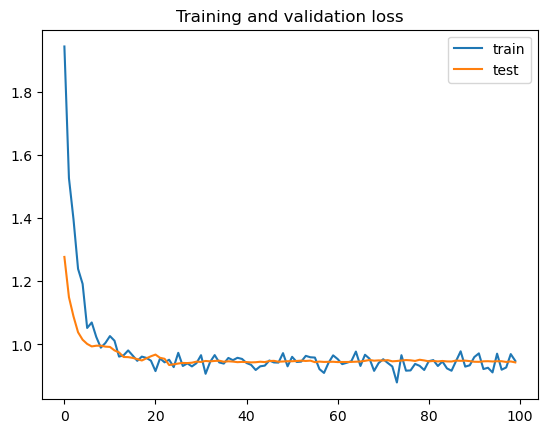

In [ ]:
epochs = range(len(training_history.history['loss'])) # Get number of epochs

# plot loss learning curves
plt.plot(epochs, training_history.history['loss'], label = 'train')
plt.plot(epochs, training_history.history['val_loss'], label = 'test')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

Above one is good fit, it is identified by a training and validation loss that decreases to a point of stability with a minimal gap between the two final loss values. The loss of the model will almost always be lower on the training dataset than the validation dataset.

Text(0.5, 1.0, 'Training and validation accuracy')

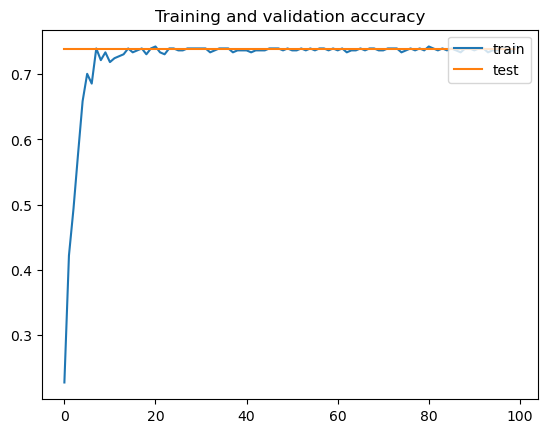

In [ ]:
# plot accuracy learning curves
plt.plot(epochs, training_history.history['acc'], label = 'train')
plt.plot(epochs, training_history.history['val_acc'], label = 'test')
plt.legend(loc = 'upper right')
plt.title ('Training and validation accuracy')

We could see it accuracy continually rise during training. As expected, we see the learning curves for accuracy on the test dataset plateau, indicating that the model has no longer overfit the training dataset and it is generalized model.

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model weights to disk")

# Save the model in h5 format 
model.save("finalized_keras_model.h5")
print("Saved model to disk")

Saved model weights to disk
Saved model to disk


3. Creating a Model with Multiple Inputs

- The first submodel will accept textual input in the form of accident description. This submodel will consist of an input shape layer, an embedding layer, and bidirectional LSTM layer of 128 neurons followed by max pool layer, drop out and dense layers. The second submodel will accept input in the form of meta information which consists of dense, batch norm and drop out layers.

- The output from the dropout layer of the first submodel and the output from the batch norm layer of the second submodel will be concatenated together and will be used as concatenated input to another dense layer with 10 neurons. Finally, the output dense layer will have five neuorns corresponding to each accident level.

In [ ]:
# fix random seed for reproducibility
reset_random_seeds=7

input_1 = Input(shape=(maxlen,))
embedding_layer   = Embedding(vocab_size, embedding_size, weights=[embedding_matrix], trainable=False)(input_1)
LSTM_Layer_1      = Bidirectional(LSTM(128, return_sequences = True))(embedding_layer)
max_pool_layer_1  = GlobalMaxPool1D()(LSTM_Layer_1)
drop_out_layer_1  = Dropout(0.5, input_shape = (256,))(max_pool_layer_1)
dense_layer_1     = Dense(128, activation = 'relu')(drop_out_layer_1)
drop_out_layer_2  = Dropout(0.5, input_shape = (128,))(dense_layer_1)
dense_layer_2     = Dense(64, activation = 'relu')(drop_out_layer_2)
drop_out_layer_3  = Dropout(0.5, input_shape = (64,))(dense_layer_2)

dense_layer_3     = Dense(32, activation = 'relu')(drop_out_layer_3)
drop_out_layer_4  = Dropout(0.5, input_shape = (32,))(dense_layer_3)

dense_layer_4     = Dense(10, activation = 'relu')(drop_out_layer_4)
drop_out_layer_5 = Dropout(0.5, input_shape = (10,))(dense_layer_4)

#-------------------------------------------------------------------------------
param = 1e-4

input_2 = Input(shape=(X_cat_train.shape[1],))
dense_layer_5       = Dense(10, input_dim=X_cat_train.shape[1], activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(param),
                      kernel_constraint=unit_norm())(input_2)
drop_out_layer_6    = Dropout(0.2)(dense_layer_5)
batch_norm_layer_1  = BatchNormalization()(drop_out_layer_6)
dense_layer_6       = Dense(10, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(param), 
                            kernel_constraint=unit_norm())(batch_norm_layer_1)
drop_out_layer_7   = Dropout(0.5)(dense_layer_6)
batch_norm_layer_2 = BatchNormalization()(drop_out_layer_7)

concat_layer        = tf.keras.layers.Concatenate()([drop_out_layer_5, batch_norm_layer_2])
dense_layer_7       = Dense(10, activation='relu')(concat_layer)
output  = Dense(5, activation='softmax')(dense_layer_7)
model   = Model(inputs=[input_1, input_2], outputs=output)

# compile the keras model
#opt = optimizers.Adamax(lr=0.01)
opt = SGD(lr=0.001, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['acc'])

In [ ]:
# Use earlystopping
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=7, min_delta=1E-3)
rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.0001, patience=5, min_delta=1E-4)

target_type = 'multi_label'
metrics = Metrics(validation_data=([X_text_train, X_cat_train], y_cat_train, target_type))

# fit the keras model on the dataset
training_history = model.fit([X_text_train, X_cat_train], y_cat_train, epochs=100, batch_size=8, verbose=1, validation_data=([X_text_test, X_cat_test], y_cat_test), callbacks=[rlrp, metrics])

Epoch 1/100
42/42 [==============================] - 13s 200ms/step - loss: 1.2920 - acc: 0.5928 - val_loss: 1.3752 - val_acc: 0.7381 - lr: 0.0010
Epoch 2/100
42/42 [==============================] - 6s 144ms/step - loss: 1.1258 - acc: 0.7036 - val_loss: 1.2436 - val_acc: 0.7381 - lr: 0.0010
Epoch 3/100
42/42 [==============================] - 6s 148ms/step - loss: 1.0688 - acc: 0.7275 - val_loss: 1.1524 - val_acc: 0.7381 - lr: 0.0010
Epoch 4/100
42/42 [==============================] - 6s 147ms/step - loss: 1.0385 - acc: 0.7365 - val_loss: 1.1204 - val_acc: 0.7381 - lr: 0.0010
Epoch 5/100
42/42 [==============================] - 6s 146ms/step - loss: 1.0450 - acc: 0.7395 - val_loss: 1.0903 - val_acc: 0.7381 - lr: 0.0010
Epoch 6/100
42/42 [==============================] - 6s 144ms/step - loss: 1.0036 - acc: 0.7365 - val_loss: 1.0575 - val_acc: 0.7381 - lr: 0.0010
Epoch 7/100
42/42 [==============================] - 6s 144ms/step - loss: 0.9904 - acc: 0.7395 - val_loss: 1.0558 - val_ac

Epoch 40/100
42/42 [==============================] - 6s 147ms/step - loss: 0.9299 - acc: 0.7395 - val_loss: 0.9410 - val_acc: 0.7381 - lr: 1.0000e-07
Epoch 41/100
42/42 [==============================] - 6s 147ms/step - loss: 0.9151 - acc: 0.7395 - val_loss: 0.9408 - val_acc: 0.7381 - lr: 1.0000e-07
Epoch 42/100
42/42 [==============================] - 6s 148ms/step - loss: 0.9034 - acc: 0.7395 - val_loss: 0.9401 - val_acc: 0.7381 - lr: 1.0000e-07
Epoch 43/100
42/42 [==============================] - 6s 147ms/step - loss: 0.8975 - acc: 0.7395 - val_loss: 0.9412 - val_acc: 0.7381 - lr: 1.0000e-07
Epoch 44/100
42/42 [==============================] - 6s 146ms/step - loss: 0.9098 - acc: 0.7395 - val_loss: 0.9409 - val_acc: 0.7381 - lr: 1.0000e-11
Epoch 45/100
42/42 [==============================] - 6s 146ms/step - loss: 0.9128 - acc: 0.7395 - val_loss: 0.9407 - val_acc: 0.7381 - lr: 1.0000e-11
Epoch 46/100
42/42 [==============================] - 6s 146ms/step - loss: 0.9008 - acc: 0.73

Epoch 78/100
42/42 [==============================] - 3s 83ms/step - loss: 0.9307 - acc: 0.7395 - val_loss: 0.9414 - val_acc: 0.7381 - lr: 1.0000e-35
Epoch 79/100
42/42 [==============================] - 3s 81ms/step - loss: 0.9256 - acc: 0.7395 - val_loss: 0.9420 - val_acc: 0.7381 - lr: 1.0000e-39
Epoch 80/100
42/42 [==============================] - 3s 81ms/step - loss: 0.9211 - acc: 0.7395 - val_loss: 0.9409 - val_acc: 0.7381 - lr: 1.0000e-39
Epoch 81/100
42/42 [==============================] - 3s 81ms/step - loss: 0.9295 - acc: 0.7395 - val_loss: 0.9406 - val_acc: 0.7381 - lr: 1.0000e-39
Epoch 82/100
42/42 [==============================] - 3s 82ms/step - loss: 0.9241 - acc: 0.7395 - val_loss: 0.9404 - val_acc: 0.7381 - lr: 1.0000e-39
Epoch 83/100
42/42 [==============================] - 3s 82ms/step - loss: 0.9017 - acc: 0.7395 - val_loss: 0.9408 - val_acc: 0.7381 - lr: 1.0000e-39
Epoch 84/100
42/42 [==============================] - 3s 82ms/step - loss: 0.9202 - acc: 0.7395 - va

In [ ]:
# evaluate the keras model
_, train_accuracy = model.evaluate([X_text_train, X_cat_train], y_cat_train, batch_size=8, verbose=0)
test_loss, test_accuracy = model.evaluate([X_text_test, X_cat_test], y_cat_test, batch_size=8, verbose=0)

print('Train accuracy: %.2f' % (train_accuracy*100))
print('Test accuracy: %.2f' % (test_accuracy*100))

Train accuracy: 73.95
Test accuracy: 73.81


In [ ]:
accuracy, precision, recall, f1 = get_classification_metrics(model, [X_text_test, X_cat_test], y_cat_test, target_type)
print('Accuracy: %f' % accuracy)
print('Precision: %f' % precision)
print('Recall: %f' % recall)
print('F1 score: %f' % f1)

3/3 [==============================] - 0s 20ms/step
Accuracy: 0.738095
Precision: 0.738095
Recall: 0.738095
F1 score: 0.738095


In [ ]:
resultsDf_final.loc[len(resultsDf_final.index)] = ['Bidirectional_LSTM',train_accuracy*100,test_accuracy*100,precision,recall,f1,test_loss]

Text(0.5, 1.0, 'Training and validation loss')

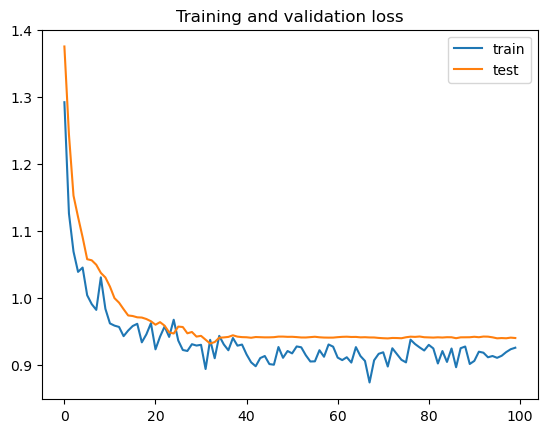

In [ ]:
epochs = range(len(training_history.history['loss'])) # Get number of epochs

# plot loss learning curves
plt.plot(epochs, training_history.history['loss'], label = 'train')
plt.plot(epochs, training_history.history['val_loss'], label = 'test')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

Above one is good fit, it is identified by a training and validation loss that decreases to a point of stability with a minimal gap between the two final loss values. The loss of the model will almost always be lower on the training dataset than the validation dataset.

Text(0.5, 1.0, 'Training and validation accuracy')

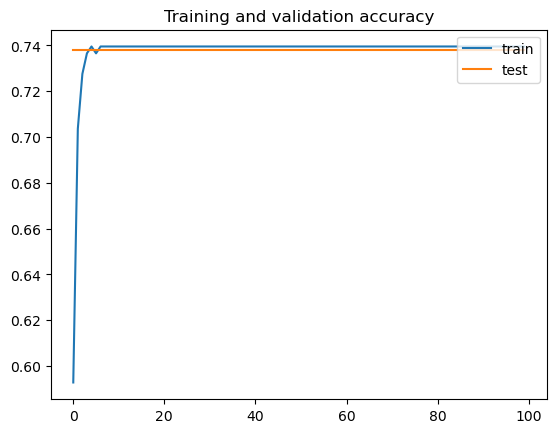

In [ ]:
# plot accuracy learning curves
plt.plot(epochs, training_history.history['acc'], label = 'train')
plt.plot(epochs, training_history.history['val_acc'], label = 'test')
plt.legend(loc = 'upper right')
plt.title ('Training and validation accuracy')

We could see it accuracy continually rise during training. As expected, we see the learning curves for accuracy on the test dataset plateau, indicating that the model has no longer overfit the training dataset and it is generalized model.

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model weights to disk")

# Save the model in h5 format 
model.save("finalized_keras_model.h5")
print("Saved model to disk")

Saved model weights to disk
Saved model to disk


In [ ]:
resultsDf_final.sort_values(['Test Accuracy'],ascending=False)

Method  Train Accuracy  Test Accuracy  \
28                     Bidirectional_LSTM       73.952097      73.809522   
24                    ANN_one_hot_encoded       73.952097      73.809522   
27                           ANN_CAT_ONLY       73.952097      73.809522   
26                                   LSTM       73.952097      73.809522   
25                      ANN_one_hot_SMOTE       20.000000       9.523810   
8                     AdaBoostClassifier         0.715569       0.738095   
17      RandomForestClassifier_OverSample        0.998381       0.738095   
20          AdaBoostClassifier_OverSample        0.373279       0.738095   
6                      BaggingClassifier         0.964072       0.738095   
3                                    SVC         0.739521       0.738095   
7                   ExtraTreesClassifier         0.994012       0.726190   
11                         XGBClassifier         0.841317       0.726190   
5                 RandomForestClassifier         0.952096       0.726190   
1                        RidgeClassifier         0.757485       0.726190   
22              LGBMClassifier_OverSample        0.998381       0.726190   
10                        LGBMClassifier         0.991018       0.714286   
2                   KNeighborsClassifier         0.745509       0.714286   
9             GradientBoostingClassifier         0.943114       0.714286   
19        ExtraTreesClassifier_OverSample        0.998381       0.702381   
0                     LogisticRegression         0.754491       0.690476   
23               XGBClassifier_OverSample        0.996761       0.666667   
18           BaggingClassifier_OverSample        0.997571       0.607143   
4                 DecisionTreeClassifier         0.994012       0.571429   
21  GradientBoostingClassifier_OverSample        0.967611       0.511905   
16      DecisionTreeClassifier_OverSample        0.998381       0.392857   
14        KNeighborsClassifier_OverSample        0.950607       0.261905   
15                         SVC_OverSample        0.289069       0.071429   
13             RidgeClassifier_OverSample        0.788664       0.071429   
12          LogisticRegression_OverSample        0.361134       0.059524   

    Precision    Recall  F1-Score  Multi-Class Logloss  
28   0.738095  0.738095  0.738095             0.939700  
24   0.738095  0.738095  0.738095             0.895338  
27   0.738095  0.738095  0.738095             0.943193  
26   0.738095  0.738095  0.738095             0.919177  
25   0.093333  0.083333  0.088050            27.677801  
8    0.563786  0.738095  0.639227             1.393020  
17   0.587596  0.738095  0.647020             3.842468  
20   0.551348  0.738095  0.631199             1.220405  
6    0.586607  0.738095  0.650011             2.361056  
3    0.544785  0.738095  0.626875             0.903826  
7    0.549071  0.726190  0.625331             2.038617  
11   0.608198  0.726190  0.647214             0.912673  
5    0.542456  0.726190  0.621018             3.445314  
1    0.549071  0.726190  0.625331             1.000000  
22   0.542456  0.726190  0.621018             1.695345  
10   0.621364  0.714286  0.660077             1.410340  
2    0.598855  0.714286  0.636744             6.472817  
9    0.628098  0.714286  0.660009             0.867077  
19   0.571841  0.702381  0.629570             1.669947  
0    0.548840  0.690476  0.611565             0.910722  
23   0.597082  0.666667  0.627927             1.018194  
18   0.589646  0.607143  0.590898             2.171834  
4    0.601980  0.571429  0.585422            14.802333  
21   0.621873  0.511905  0.552946             1.230184  
16   0.530726  0.392857  0.446478            20.969971  
14   0.576107  0.261905  0.309257             8.874191  
15   0.005102  0.071429  0.009524             1.609438  
13   0.005102  0.071429  0.009524             1.000000  
12   0.751119  0.059524  0.042913             1.733659

## Conclusion

<font color=green>
    
1. Able to predict the accident level with a test accuracy of 73.81% and f1-score of 73.81%
    
2. We have seven duplicate values in this dataset and dropped those duplicate values.
    
3. We have no outliers in this dataset.
    
4. We have no missing values in this dataset.
    
5. Extracted the day, month and year from Date column and created new features such as weekday, weekofyear and seasons.
    
6. Target variable – ‘Accident Level’ distribution is not equal (I: 309, II: 40, III: 31, IV: 30, V: 8).

7. Class imbalance issue is handled using below methods and found out that, for this particular dataset, with original data we have achieved the better results.
    
      a. Resampling techniques: Oversampling minority class
    
      b. SMOTE: Generate synthetic samples</font>

<font color=green>
    
8. By comparing the results from all ML methods with original data, we can select the best method as AdaBoost classifier with f1-score 65.38% with original data.
    
9. Bootstrap sampling with RandomForestClassifier model with an accuracy of 66.7% - 77.6% is our best model.
    
10. Bootstrap sampling with AdaBoostClassifier model with an accuracy of 51.7% - 76.8% is our best model.
    
11. Bootstrap sampling with XGBClassifier model with an accuracy of 63.5% - 74.8% is our best model.
  
12. Explored below options in Neural Networks.
    
    a. Convert Classification to Numerical problem: achieved a test accuracy of 53.57% which is a bad result.
    
    b. Multiclass classification - Target variable - One hot encoded: achieved a test accuracy of 73.81% and f1-score of 73.81% with original data + TF-IDF features from accident description column.
    
    c. Create a model with Text inputs (accident description alone) only: surprisingly achieved a test accuracy of 73.81% and f1-score of 73.81% with original data.
    
    d. Create a model with Categorical features only: achieved a test accuracy of 73.81% and f1-score of 72.28% with original data.
    
    e. Create a model with Multiple Inputs (concatenated the layers from text input model and categorical features input model): surprisingly achieved a test accuracy of 73.81% and f1-score of 73.81% with original data.</font>

<font color=green>**13. Finally bidirectional LSTM model can be considered to productionalized the model and predict the accident level.**</font>

## Recommendations

<font color=Blue>

- In this project, we discovered that the main causes of accidents are mistakes in hand-operation and time-related factor.

- To reduce the occurrences of accidents, more stringent safety standards in hand-operation will be needed in period when many accidents occur.

- I realized that the detail information of accidents like 'Description' is so useful to analyze the cause.

- With more detailed information such as machining data (ex. CNC, Current, Voltage) in plants, weather information, employee's personal data (ex. age, experience in the industry sector, work performance ), we can clarify the cause of accidents more correctly.

- With more number of observations than current number of records = 425 so that we can feed more data into ML/ANN/NLP models to train, evaluate the performance of those models and get the better results.

- There are quite a lot of Critical risk descriptions, but with the help of SME we can decide whether this column has outliers or not and also SME can help us in understanding the data better. </font>

## Limitations
<font color=red>
    
- We have less number of observations to analyse the cause of accidents correctly and rather we should collect more number of observations to get better results.
- Less number of features available in dataset.
- Lack of access to quality data.</font>
    